<p style="
    font-family: 'Arial'; 
    font-size: 25px; 
    color: white; 
    background-color: darkmagenta; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    Projet anadon 
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 25px; 
    color: white; 
    background-color: darkcyan; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    Groupe 2C: EL MALOUANI Ayoub, LANGLOIS Dylan, KHAMASSI Sabrine, JRAD Mariem
</p>

In [1]:
# les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import shap
import re

# données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# algorithmes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
# metriques
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve

# Tests statistiques
from scipy.stats import mannwhitneyu

sns.set(style="whitegrid", palette="muted")

<p style="
    font-family: 'Arial'; 
    font-size: 25px; 
    color: white; 
    background-color: darkblue; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    1er question: Existe-t-il une formule magique du hit ? Peut-on prédire le succès d'une chanson avant sa diffusion?
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkorange; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    Etape: Comprehension donnees
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Debut comprehension wasabi_artists
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: centerleft;
">
     1) Chargement du dataset
</p>

In [2]:
df_artists=pd.read_csv("wasabi_artists.csv",delimiter=",", low_memory=False)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     2) Inventaire
</p>

In [3]:

df_artists.head(5)


_id disambiguation  \
0  ObjectId(56d7e91b6b60c09814f93e4a)   British band   
1  ObjectId(56d7e91c6b60c09814f93e4c)  Japanese Band   
2  ObjectId(56d7e91d6b60c09814f93e4e)            NaN   
3  ObjectId(56d7e91e6b60c09814f93e50)            NaN   
4  ObjectId(56d7e91e6b60c09814f93e52)            NaN   

                                   endArea endArea.disambiguation endArea.id  \
0  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
1  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
2  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
3  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
4  {"id":"","name":"","disambiguation":""}                    NaN        NaN   

  endArea.name gender                   genres  \
0          NaN    NaN                       []   
1          NaN    NaN  ["J-Rock","Visual Kei"]   
2          NaN    NaN                       []   
3          NaN    NaN                       []   
4          NaN    NaN                       []   

                  id_artist_musicbrainz labels  ... members.XX.urlYouTube  \
0  55c6eb6e-8388-497c-acaf-dbff584d0c3a     []  ...                   NaN   
1  51257cf7-1672-4580-ae5c-93eefe3684fb     []  ...                   NaN   
2  8cb0ebc9-db95-4748-81df-8e1e24e70541     []  ...                   NaN   
3  4616c4f1-fe79-40f0-ac8d-2b319528b683     []  ...                   NaN   
4  e5fd8fd1-9073-4586-a741-e44164e543db     []  ...                   NaN   

  members.XX.urlBBC members.XX.urlSecondHandSongs  urlInstagram  \
0               NaN                           NaN           NaN   
1               NaN                           NaN           NaN   
2               NaN                           NaN           NaN   
3               NaN                           NaN           NaN   
4               NaN                           NaN           NaN   

  members.XX.urlSoundCloud members.XX.urlInstagram urlGooglePlus  \
0                      NaN                     NaN           NaN   
1                      NaN                     NaN           NaN   
2                      NaN                     NaN           NaN   
3                      NaN                     NaN           NaN   
4                      NaN                     NaN           NaN   

  members.XX.urlPureVolume members.XX.urlGooglePlus animux_path_ambiguous  
0                      NaN                      NaN                   NaN  
1                      NaN                      NaN                   NaN  
2                      NaN                      NaN                   NaN  
3                      NaN                      NaN                   NaN  
4                      NaN                      NaN                   NaN  

[5 rows x 109 columns]

In [4]:
df_artists.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77492 entries, 0 to 77491
Data columns (total 109 columns):
 #    Column                                            Dtype  
---   ------                                            -----  
 0    _id                                               object 
 1    disambiguation                                    object 
 2    endArea                                           object 
 3    endArea.disambiguation                            object 
 4    endArea.id                                        object 
 5    endArea.name                                      object 
 6    gender                                            object 
 7    genres                                            object 
 8    id_artist_musicbrainz                             object 
 9    labels                                            object 
 10   lifeSpan                                          object 
 11   lifeSpan.begin                                    ob

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     3) Profiling rapide
</p>

In [5]:
desc_num_artists = df_artists.describe() # deezer fans is interesting
desc_num_artists

deezerFans  id_artist_deezer  members.XX.begin  \
count  5.247200e+04      5.247200e+04               0.0   
mean   4.199788e+04      1.039210e+06               NaN   
std    3.518670e+05      1.875846e+06               NaN   
min    0.000000e+00      1.000000e+00               NaN   
25%    6.300000e+01      6.630475e+04               NaN   
50%    4.820000e+02      2.608475e+05               NaN   
75%    3.588500e+03      1.136910e+06               NaN   
max    1.408643e+07      1.227541e+07               NaN   

       members.XX.disambiguation  members.XX.end  members.XX.ended  \
count                        0.0             0.0               0.0   
mean                         NaN             NaN               NaN   
std                          NaN             NaN               NaN   
min                          NaN             NaN               NaN   
25%                          NaN             NaN               NaN   
50%                          NaN             NaN               NaN   
75%                          NaN             NaN               NaN   
max                          NaN             NaN               NaN   

       members.XX.id_member_musicbrainz  members.XX.instruments  \
count                               0.0                     0.0   
mean                                NaN                     NaN   
std                                 NaN                     NaN   
min                                 NaN                     NaN   
25%                                 NaN                     NaN   
50%                                 NaN                     NaN   
75%                                 NaN                     NaN   
max                                 NaN                     NaN   

       members.XX.name  members.XX.type  ...  \
count              0.0              0.0  ...   
mean               NaN              NaN  ...   
std                NaN              NaN  ...   
min                NaN              NaN  ...   
25%                NaN              NaN  ...   
50%                NaN              NaN  ...   
75%                NaN              NaN  ...   
max                NaN              NaN  ...   

       members.XX.equipments.XX.items.XX.url  \
count                                    0.0   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

       members.XX.equipments.XX.items.XX.urlDescription  \
count                                               0.0   
mean                                                NaN   
std                                                 NaN   
min                                                 NaN   
25%                                                 NaN   
50%                                                 NaN   
75%                                                 NaN   
max                                                 NaN   

       members.XX.equipments.XX.type  members.XX.urlYouTube  \
count                            0.0                    0.0   
mean                             NaN                    NaN   
std                              NaN                    NaN   
min                              NaN                    NaN   
25%                              NaN                    NaN   
50%                              NaN                    NaN   
75%                              NaN                    NaN   
max                              NaN                    NaN   

       members.XX.urlBBC  members.XX.urlSecondHandSongs  \
count                0.0                            0.0   
mean                 NaN                            NaN   
std                  NaN                            NaN   
min                  NaN                

In [6]:
df_artists.shape

(77492, 109)

In [7]:

desc_cat_artists = df_artists.describe(include='object') # beaucoup of irrelevant info: 'genre', 'subject', 'labels', 'lifeSpan's are interesting
desc_cat_artists


_id disambiguation  \
count                                77492          11733   
unique                               77492           9397   
top     ObjectId(56d997b6cc2ddd0c0f6bf2d6)      US rapper   
freq                                     1             89   

                                        endArea endArea.disambiguation  \
count                                     77492                     20   
unique                                      944                      3   
top     {"id":"","name":"","disambiguation":""}                   city   
freq                                      75065                     16   

                                  endArea.id endArea.name gender genres  \
count                                   2427         2427  20198  77492   
unique                                   943          905      3   6295   
top     1f40c6e1-47ba-4e35-996f-fe6ee5840e62  Los Angeles   Male     []   
freq                                     168          168  14309  63844   

                       id_artist_musicbrainz labels  ... dbp_genre  \
count                                  60748  77492  ...     29320   
unique                                 59853   8418  ...     11178   
top     eb51090c-662a-47a1-967c-c63292d9831a     []  ...        []   
freq                                       6  65058  ...      9451   

       recordLabel subject                               urlLastFm  \
count        29320   29320                                    7349   
unique       10998   24333                                    7151   
top             []      []  http://www.last.fm/music/Will%20Oldham   
freq         13285    3639                                       6   

                       animux_path  \
count                         4673   
unique                        4673   
top     ["./mongo/animux/Z/Zazie"]   
freq                             1   

                                                   urlBBC  \
count                                                3968   
unique                                               3810   
top     http://www.bbc.co.uk/music/artists/14a4bc78-1c...   
freq                                                    3   

                                urlSecondHandSongs  \
count                                         3037   
unique                                        2924   
top     http://www.secondhandsongs.com/artist/8899   
freq                                             4   

                                   urlInstagram  \
count                                      2409   
unique                                     2351   
top     https://www.instagram.com/ZuccheroSugar   
freq                                          4   

                                      urlGooglePlus     animux_path_ambiguous  
count                                           648                        94  
unique                                          625                        31  
top     https://plus.google.com/+elvispresley/posts  ["./mongo/animux/D/Don"]  
freq                                              3                        10  

[4 rows x 64 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     4) Détection types suspects
</p>

In [8]:
mixed_like_artists = [c for c in df_artists.columns if df_artists[c].apply(type).nunique() > 1]
mixed_like_artists

['disambiguation',
 'endArea.disambiguation',
 'endArea.id',
 'endArea.name',
 'gender',
 'id_artist_musicbrainz',
 'lifeSpan.begin',
 'lifeSpan.end',
 'location.city',
 'location.country',
 'location.id_city_musicbrainz',
 'rdf',
 'type',
 'urlAllmusic',
 'urlAmazon',
 'urlDiscogs',
 'urlFacebook',
 'urlITunes',
 'urlMusicBrainz',
 'urlMySpace',
 'urlOfficialWebsite',
 'urlPureVolume',
 'urlRateYourMusic',
 'urlSoundCloud',
 'urlSpotify',
 'urlTwitter',
 'urlWikipedia',
 'urlYouTube',
 'id_artist_discogs',
 'abstract',
 'nameVariations',
 'urls',
 'picture',
 'picture.big',
 'picture.medium',
 'picture.small',
 'picture.standard',
 'picture.xl',
 'urlDeezer',
 'urlWikidata',
 'associatedMusicalArtist',
 'dbp_abstract',
 'dbp_genre',
 'recordLabel',
 'subject',
 'urlLastFm',
 'animux_path',
 'urlBBC',
 'urlSecondHandSongs',
 'urlInstagram',
 'urlGooglePlus',
 'animux_path_ambiguous']

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     5) Validité
</p>

In [9]:
invalid_dates_artists = pd.to_datetime(df_artists['lifeSpan.begin'], errors='coerce').isna() # be weary of the dates
df_artists[invalid_dates_artists] # 58167 have correct lifeSpanbegin dates

_id                     disambiguation  \
1      ObjectId(56d7e91c6b60c09814f93e4c)                      Japanese Band   
2      ObjectId(56d7e91d6b60c09814f93e4e)                                NaN   
3      ObjectId(56d7e91e6b60c09814f93e50)                                NaN   
5      ObjectId(56d7e91f6b60c09814f93e53)                                NaN   
6      ObjectId(56d7e9206b60c09814f93e56)                                NaN   
...                                   ...                                ...   
77485  ObjectId(56d997b0cc2ddd0c0f6bf2d0)                                NaN   
77487  ObjectId(56d997b1cc2ddd0c0f6bf2d2)  soulseek electro/breakcore artist   
77489  ObjectId(56d997b3cc2ddd0c0f6bf2d4)                                NaN   
77490  ObjectId(56d997b3cc2ddd0c0f6bf2d5)             Underground, free, Rap   
77491  ObjectId(56d997b6cc2ddd0c0f6bf2d6)                                NaN   

                                       endArea endArea.disambiguation  \
1      {"id":"","name":"","disambiguation":""}                    NaN   
2      {"id":"","name":"","disambiguation":""}                    NaN   
3      {"id":"","name":"","disambiguation":""}                    NaN   
5      {"id":"","name":"","disambiguation":""}                    NaN   
6      {"id":"","name":"","disambiguation":""}                    NaN   
...                                        ...                    ...   
77485  {"id":"","name":"","disambiguation":""}                    NaN   
77487  {"id":"","name":"","disambiguation":""}                    NaN   
77489  {"id":"","name":"","disambiguation":""}                    NaN   
77490  {"id":"","name":"","disambiguation":""}                    NaN   
77491  {"id":"","name":"","disambiguation":""}                    NaN   

      endArea.id endArea.name gender                   genres  \
1            NaN          NaN    NaN  ["J-Rock","Visual Kei"]   
2            NaN          NaN    NaN                       []   
3            NaN          NaN    NaN                       []   
5            NaN          NaN    NaN                       []   
6            NaN          NaN    NaN                       []   
...          ...          ...    ...                      ...   
77485        NaN          NaN    NaN                       []   
77487        NaN          NaN    NaN                 ["Folk"]   
77489        NaN          NaN    NaN                       []   
77490        NaN          NaN    NaN                       []   
77491        NaN          NaN    NaN                       []   

                      id_artist_musicbrainz                       labels  ...  \
1      51257cf7-1672-4580-ae5c-93eefe3684fb                           []  ...   
2      8cb0ebc9-db95-4748-81df-8e1e24e70541                           []  ...   
3      4616c4f1-fe79-40f0-ac8d-2b319528b683                           []  ...   
5      57c249df-b4f8-4d2d-963e-bfc7f24be19a                           []  ...   
6                                       NaN                           []  ...   
...                                     ...                          ...  ...   
77485                                   NaN                           []  ...   
77487  070b1b75-dc19-4c73-9d50-a880a232260f  ["Sony Music","Ulus Müzik"]  ...   
77489  a3da83b4-a07a-4799-8691-37a931bd5566                           []  ...   
77490  671af783-f20a-4c99-94f6-0dd293270c0c                           []  ...   
77491                                   NaN                           []  ...   

      members.XX.urlYouTube members.XX.urlBBC members.XX.urlSecondHandSongs  \
1                       NaN               NaN                           NaN   
2                       NaN               NaN                           NaN   
3                       NaN               NaN                           NaN   
5                       NaN               NaN                           NaN   
6                       NaN               NaN      

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     6) Analyse des relations entres les differentes colonnes
</p>

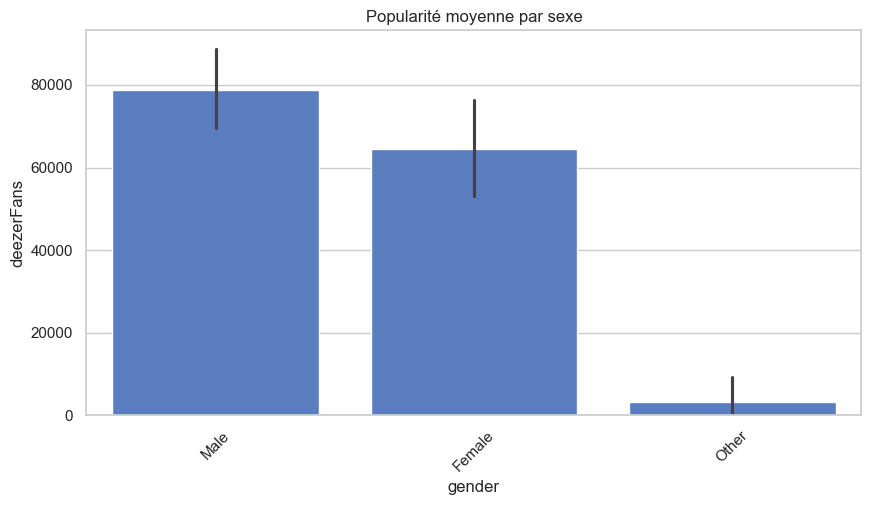

In [10]:
#Popularité moyenne par sexe
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y="deezerFans", data=df_artists, estimator=np.mean)
plt.title("Popularité moyenne par sexe")
plt.xticks(rotation=45)
plt.show()

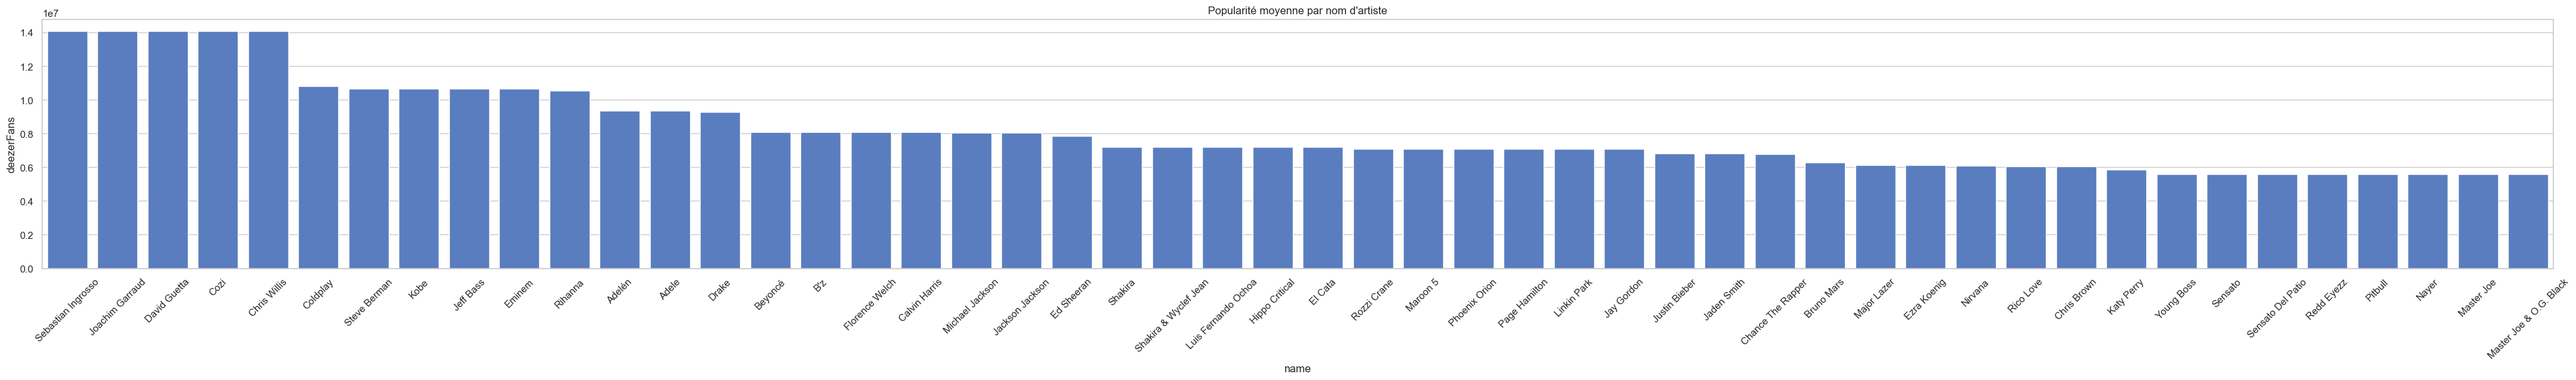

In [11]:
#Popularité moyenne par artiste
artists_sorted_popularity = df_artists.sort_values(by="deezerFans", ascending=False)
plt.figure(figsize=(50,5))
sns.barplot(x="name", y="deezerFans", data=artists_sorted_popularity.head(50), estimator=np.mean)
plt.title("Popularité moyenne par nom d'artiste")
plt.xticks(rotation=45)
plt.show()

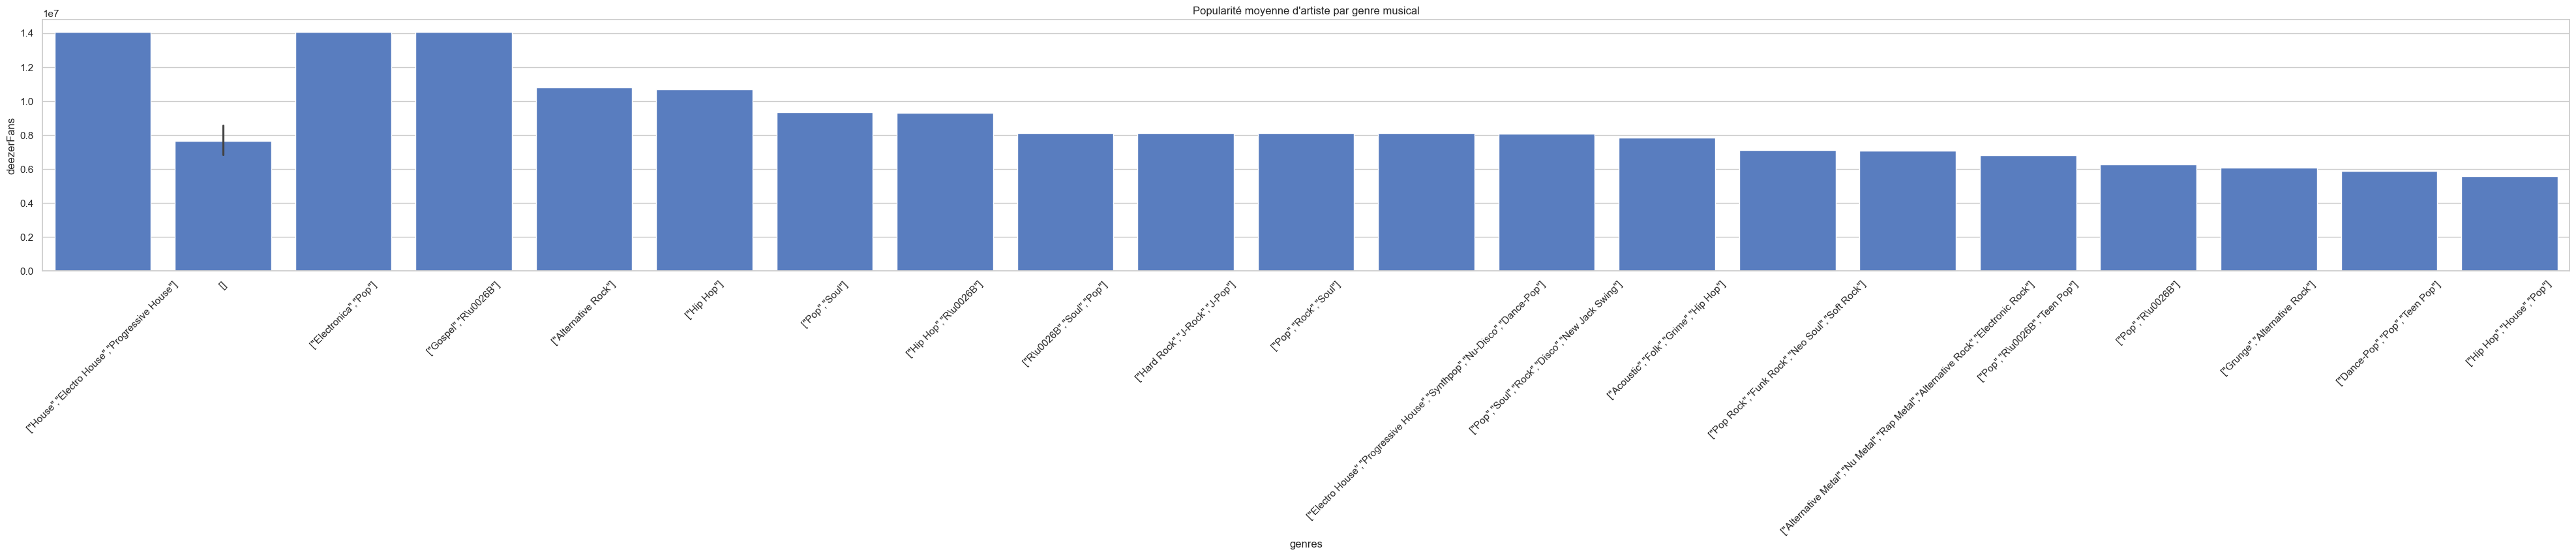

In [12]:
#Popularité moyenne par genre musicale
artists_sorted_popularity = df_artists.sort_values(by="deezerFans", ascending=False)
plt.figure(figsize=(50,5))
sns.barplot(x="genres", y="deezerFans", data=artists_sorted_popularity.head(50), estimator=np.mean)
plt.title("Popularité moyenne d'artiste par genre musical")
plt.xticks(rotation=45)
plt.show()

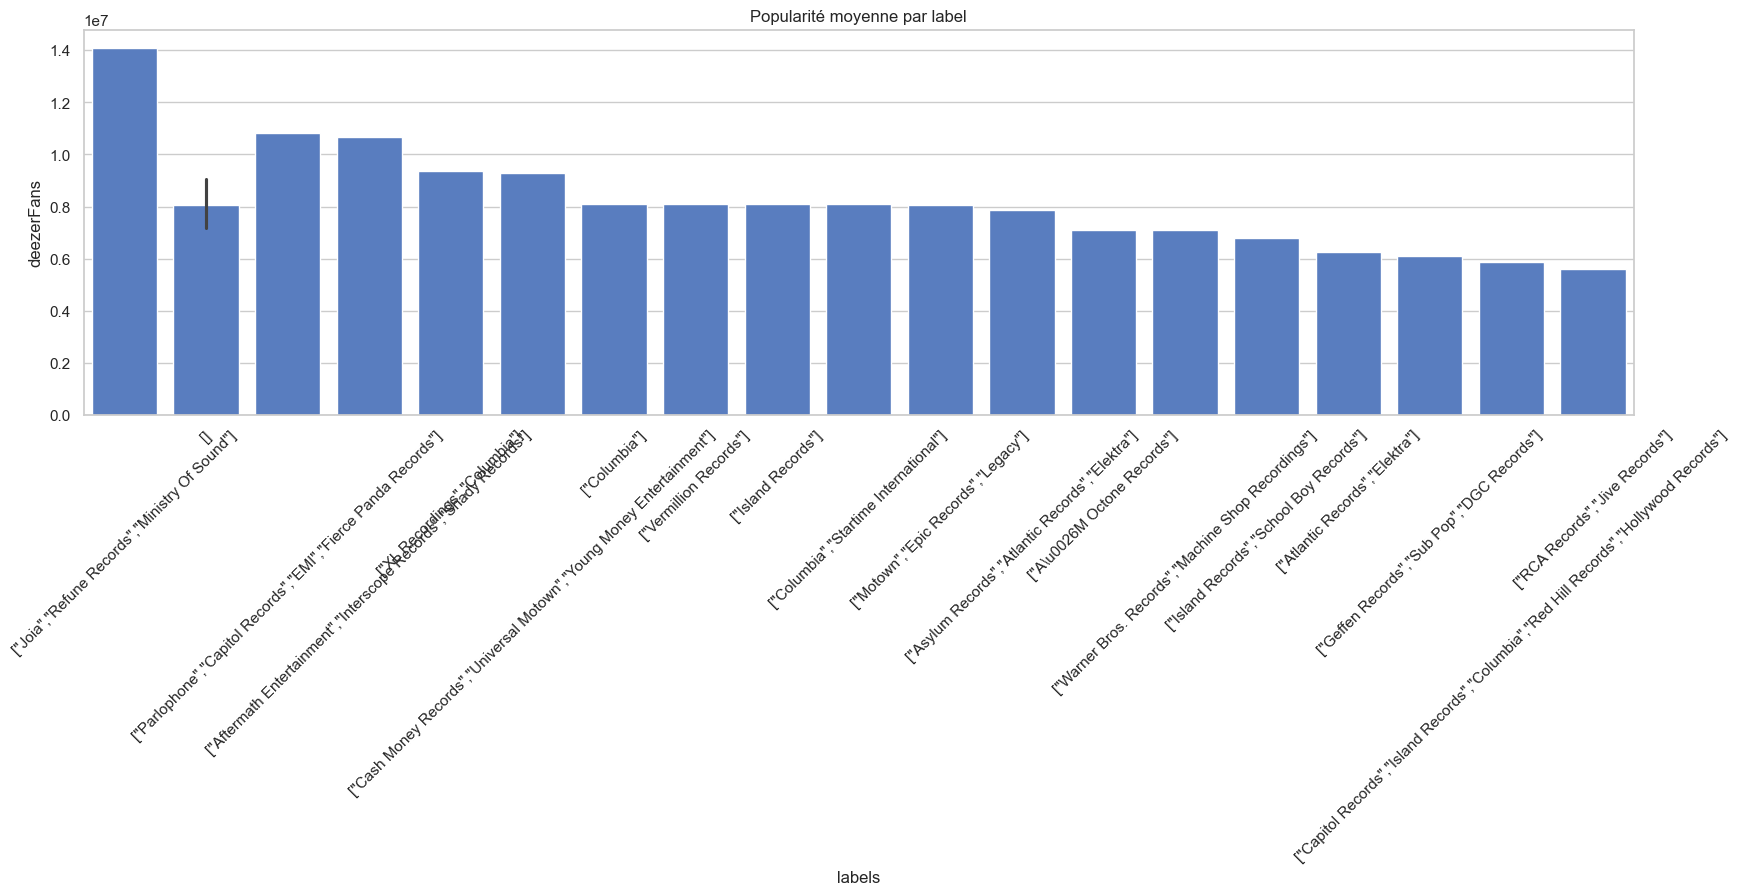

In [13]:
#Popularité moyenne par label
plt.figure(figsize=(20,5))
sns.barplot(x="labels", y="deezerFans", data=artists_sorted_popularity.head(50), estimator=np.mean)
plt.title("Popularité moyenne par label")
plt.xticks(rotation=45)
plt.show()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     7) Cardinalité
</p>

In [14]:
card = df_artists.select_dtypes(include='object').nunique().sort_values(ascending=False)
card

_id                       77492
name                      77492
urlWikia                  77492
name_accent_fold          76405
urlSpotify                60256
                          ...  
urlGooglePlus               625
animux_path_ambiguous        31
type                          6
gender                        3
endArea.disambiguation        3
Length: 64, dtype: int64

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     8) Conclusion: Le dataset des artistes n'avait rien de particulierement utile, autre que le nombre de fan deezer et le life span de l'artiste
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Debut comprehension wasabi_albums
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     1) Chargement
</p>

In [15]:
df2=pd.read_csv( "wasabi_albums.csv", delimiter=",", low_memory=False)
df2.head(5)

_id             genre  \
0  ObjectId(5714debb25ac0d8aee34d59a)  Alternative Rock   
1  ObjectId(5714debb25ac0d8aee34d59b)  Alternative Rock   
2  ObjectId(5714debb25ac0d8aee34d59c)  Alternative Rock   
3  ObjectId(5714debb25ac0d8aee34d59d)  Alternative Rock   
4  ObjectId(5714debb25ac0d8aee34d59e)               NaN   

                            id_artist length name publicationDate  \
0  ObjectId(56d7e91b6b60c09814f93e4a)  57:52    A            1997   
1  ObjectId(56d7e91b6b60c09814f93e4a)  50:29    A            1999   
2  ObjectId(56d7e91b6b60c09814f93e4a)  45:36    A            2002   
3  ObjectId(56d7e91b6b60c09814f93e4a)  47:30    A            2005   
4  ObjectId(56d7e91b6b60c09814f93e4a)    NaN    A             NaN   

                                                 rdf                  title  \
0  <?xml version='1.0' encoding='utf-8' ?> <rdf:R...  How Ace Are Buildings   
1  <?xml version='1.0' encoding='utf-8' ?> <rdf:R...      A Vs. Monkey Kong   
2  <?xml version='1.0' encoding='utf-8' ?> <rdf:R...          Hi-Fi Serious   
3  <?xml version='1.0' encoding='utf-8' ?> <rdf:R...   Teen Dance Ordinance   
4                                                NaN       Non-Album Tracks   

                                            urlAlbum  \
0  http://lyrics.wikia.com/A:How_Ace_Are_Building...   
1  http://lyrics.wikia.com/A:A_Vs._Monkey_Kong_%2...   
2  http://lyrics.wikia.com/A:Hi-Fi_Serious_%28200...   
3  http://lyrics.wikia.com/A:Teen_Dance_Ordinance...   
4         http://lyrics.wikia.com/A:Non-Album_Tracks   

                                  urlAllmusic  ... deezerFans explicitLyrics  \
0  http://www.allmusic.com/album/mw0000499814  ...      140.0           True   
1  http://www.allmusic.com/album/mw0000091644  ...      216.0           True   
2  http://www.allmusic.com/album/mw0000220264  ...      388.0            NaN   
3  http://www.allmusic.com/album/mw0000754181  ...      272.0            NaN   
4                                         NaN  ...       33.0            NaN   

            upc        barcode country dateRelease  disambiguation  \
0  825646440306   042282891624      GB  1998-06-29             NaN   
1  825646440214   639842769525      GB  1999-09-09             NaN   
2  809274477668   809274477620      GB  2002-03-04             NaN   
3  643443518260  5050467858527      GB  2005-07-25             NaN   
4  643443544566            NaN     NaN         NaN             NaN   

                   id_album_musicbrainz language id_album_discogs  
0  2d45750b-adc0-47f3-95a8-c7a1f470e956      eng           298861  
1  e4e07e31-42cb-453b-929f-7c380f770246      eng              NaN  
2  7c5cc754-8ce4-4959-a164-541098b4a476      eng            67911  
3  a3e59623-e82a-4b8f-b5be-2245a696edfb      eng           327215  
4                                   NaN      NaN              NaN  

[5 rows x 34 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     2) Inventaire
</p>

In [16]:
df2.info(1) # Notewrothy columns are: genre, length, name, title, publication date, fans deezer, date release, country , language

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208743 entries, 0 to 208742
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   208743 non-null  object 
 1   genre                 86190 non-null   object 
 2   id_artist             208743 non-null  object 
 3   length                71270 non-null   object 
 4   name                  208743 non-null  object 
 5   publicationDate       141752 non-null  object 
 6   rdf                   49734 non-null   object 
 7   title                 208739 non-null  object 
 8   urlAlbum              208743 non-null  object 
 9   urlAllmusic           79179 non-null   object 
 10  urlAmazon             59912 non-null   object 
 11  urlDiscogs            85911 non-null   object 
 12  urlITunes             78621 non-null   object 
 13  urlMusicBrainz        95985 non-null   object 
 14  urlSpotify            77960 non-null   object 
 15  

In [17]:
df2.shape

(208743, 34)

In [18]:
df2_columns=df2.columns.to_list()
print(df2_columns)

['_id', 'genre', 'id_artist', 'length', 'name', 'publicationDate', 'rdf', 'title', 'urlAlbum', 'urlAllmusic', 'urlAmazon', 'urlDiscogs', 'urlITunes', 'urlMusicBrainz', 'urlSpotify', 'urlWikipedia', 'id_album_deezer', 'urlDeezer', 'cover', 'cover.big', 'cover.medium', 'cover.small', 'cover.standard', 'cover.xl', 'deezerFans', 'explicitLyrics', 'upc', 'barcode', 'country', 'dateRelease', 'disambiguation', 'id_album_musicbrainz', 'language', 'id_album_discogs']


In [19]:
albums=df2.drop(columns=[ 'urlAlbum', 'urlAllmusic', 'urlAmazon',
                          'urlDiscogs', 'urlITunes', 'urlMusicBrainz', 'urlSpotify',
                          'urlWikipedia', 'urlDeezer', 'cover', 'cover.big', 'cover.medium', 'cover.small',
                          'cover.standard', 'cover.xl','disambiguation', 'id_album_musicbrainz', 'id_album_discogs', 'rdf',
                        'barcode'])
# J'ai enleve les colonnes que je trouvais inutiles
albums.head()

_id             genre  \
0  ObjectId(5714debb25ac0d8aee34d59a)  Alternative Rock   
1  ObjectId(5714debb25ac0d8aee34d59b)  Alternative Rock   
2  ObjectId(5714debb25ac0d8aee34d59c)  Alternative Rock   
3  ObjectId(5714debb25ac0d8aee34d59d)  Alternative Rock   
4  ObjectId(5714debb25ac0d8aee34d59e)               NaN   

                            id_artist length name publicationDate  \
0  ObjectId(56d7e91b6b60c09814f93e4a)  57:52    A            1997   
1  ObjectId(56d7e91b6b60c09814f93e4a)  50:29    A            1999   
2  ObjectId(56d7e91b6b60c09814f93e4a)  45:36    A            2002   
3  ObjectId(56d7e91b6b60c09814f93e4a)  47:30    A            2005   
4  ObjectId(56d7e91b6b60c09814f93e4a)    NaN    A             NaN   

                   title  id_album_deezer  deezerFans explicitLyrics  \
0  How Ace Are Buildings        6585846.0       140.0           True   
1      A Vs. Monkey Kong        6585740.0       216.0           True   
2          Hi-Fi Serious         614237.0       388.0            NaN   
3   Teen Dance Ordinance          82862.0       272.0            NaN   
4       Non-Album Tracks          83001.0        33.0            NaN   

            upc country dateRelease language  
0  825646440306      GB  1998-06-29      eng  
1  825646440214      GB  1999-09-09      eng  
2  809274477668      GB  2002-03-04      eng  
3  643443518260      GB  2005-07-25      eng  
4  643443544566     NaN         NaN      NaN

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     3) Profiling rapide
</p>

In [20]:
describe_albums=albums.describe()
describe_albums # I should think about cross-matching deezer fans of songs with artists and genres

id_album_deezer     deezerFans
count     1.604020e+05  155410.000000
mean      3.911190e+06    1770.227675
std       4.447798e+06   11256.321118
min       7.990000e+02       0.000000
25%       3.329220e+05      17.000000
50%       1.233913e+06     100.000000
75%       7.082566e+06     555.000000
max       3.981934e+07  975359.000000

In [21]:
desc_cat_albums= albums.describe(include='object')
desc_cat_albums # Deja j'ai une idee que le rock et Geprge jones sont tres populaire ?

_id  genre  \
count                               208743  86190   
unique                              208743    527   
top     ObjectId(57c92594e5c453a411c7734d)   Rock   
freq                                     1   7955   

                                 id_artist length          name  \
count                               208743  71270        208743   
unique                               77492   9324         77492   
top     ObjectId(56d8355153a7ddfc01f9583f)  39:52  George Jones   
freq                                   134     61           134   

       publicationDate        title explicitLyrics           upc country  \
count           141752       208739          13406        155397   53734   
unique             104       125276              1        127619      85   
top               2007  Other Songs           True  724358271058      US   
freq              6515        57345          13406            21   24958   

       dateRelease language  
count        91146    56616  
unique        9449       75  
top           2001      eng  
freq          1271    45131

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     4) Manquants / doublons
</p>

In [22]:
missing_albums= albums.isna().mean().sort_values(ascending=False)
missing_albums # La moitie des colones "utiles" sont au moins 50% vides

explicitLyrics     0.935777
country            0.742583
language           0.728777
length             0.658575
genre              0.587100
dateRelease        0.563358
publicationDate    0.320926
upc                0.255558
deezerFans         0.255496
id_album_deezer    0.231581
title              0.000019
name               0.000000
_id                0.000000
id_artist          0.000000
dtype: float64

In [23]:
dupes_albums = albums.duplicated().sum()
dupes_albums # pas de doublons

np.int64(0)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     5) Détection types suspects
</p>

In [24]:
mixed_like_albums = [c for c in albums.columns if albums[c].apply(type).nunique() > 2]
mixed_like_albums

[]

In [25]:
albums['genre'].apply(type).drop_duplicates()

0      <class 'str'>
4    <class 'float'>
Name: genre, dtype: object

In [26]:
albums[['publicationDate','dateRelease']]

publicationDate dateRelease
0                 1997  1998-06-29
1                 1999  1999-09-09
2                 2002  2002-03-04
3                 2005  2005-07-25
4                  NaN         NaN
...                ...         ...
208738            2012        2012
208739            2014         NaN
208740            2014         NaN
208741             NaN         NaN
208742             NaN         NaN

[208743 rows x 2 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     6) Cardinalité 
</p>

In [27]:
card_albums = albums.select_dtypes(include='object').nunique().sort_values(ascending=False)
card_albums # cela me donne une idee sur la diversite de mes datas, tres utile pour l'etape de representation graphique

_id                208743
upc                127619
title              125276
id_artist           77492
name                77492
dateRelease          9449
length               9324
genre                 527
publicationDate       104
country                85
language               75
explicitLyrics          1
dtype: int64

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     7) Analyse des relations entres les differentes colonnes 
</p>

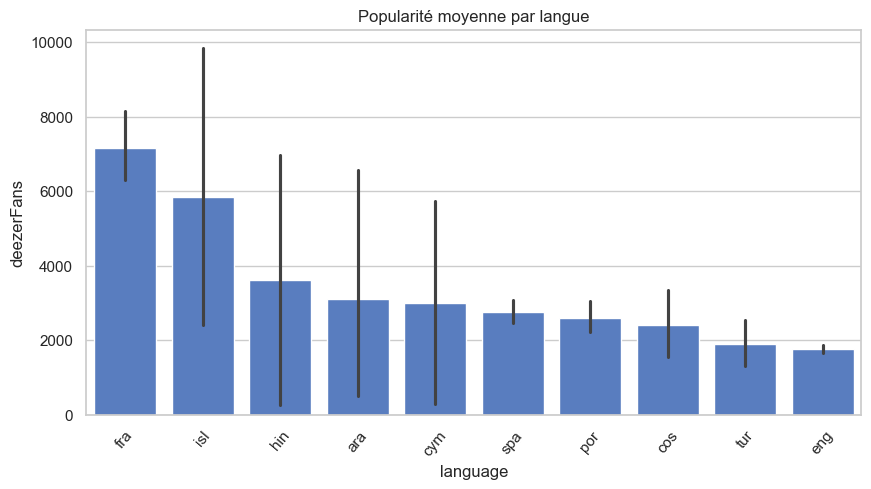

In [28]:
#Popularité moyenne par sexe
plt.figure(figsize=(10,5))
sns.barplot(x="language", y="deezerFans", data=albums, estimator=np.mean,
            order=albums.groupby("language")["deezerFans"].mean().sort_values(ascending=False).head(10).index)
plt.title("Popularité moyenne par langue")
plt.xticks(rotation=50)
plt.show()

In [29]:
albums.groupby("language")["_id"].count().sort_values(ascending=False).head()
# On retrouve qu'en moyenne les albums en francais sont plus populaire, mais en quantite les albums en anglais sont plus populaire
# Il y a plus d'albums en anglais qu'en francais

language
eng    45131
deu     2403
spa     1736
fra     1490
mul      949
Name: _id, dtype: int64

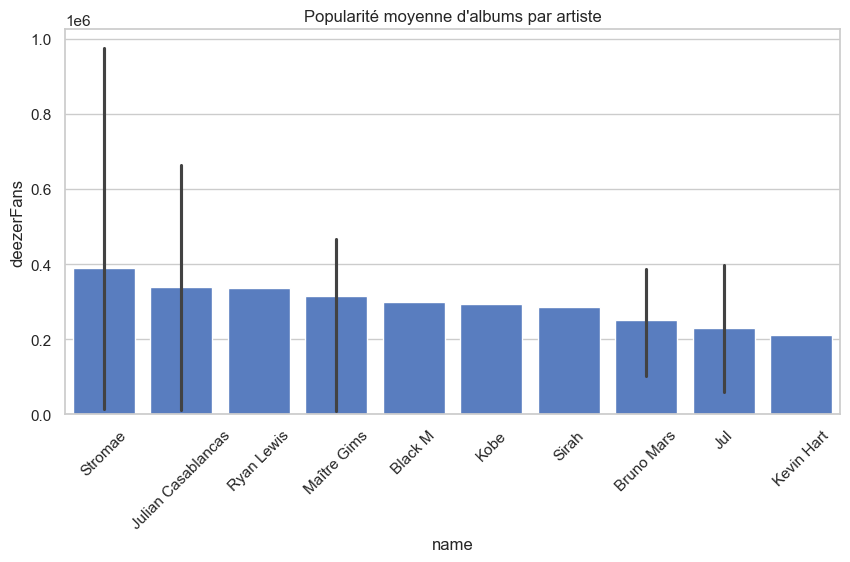

In [30]:
#Popularité moyenne d'albums par artiste
plt.figure(figsize=(10,5))
sns.barplot(x="name", y="deezerFans", data=albums, estimator=np.mean, 
            order=albums.groupby("name")["deezerFans"].mean().sort_values(ascending=False).head(10).index)
plt.title("Popularité moyenne d'albums par artiste")
plt.xticks(rotation=45)
plt.show()

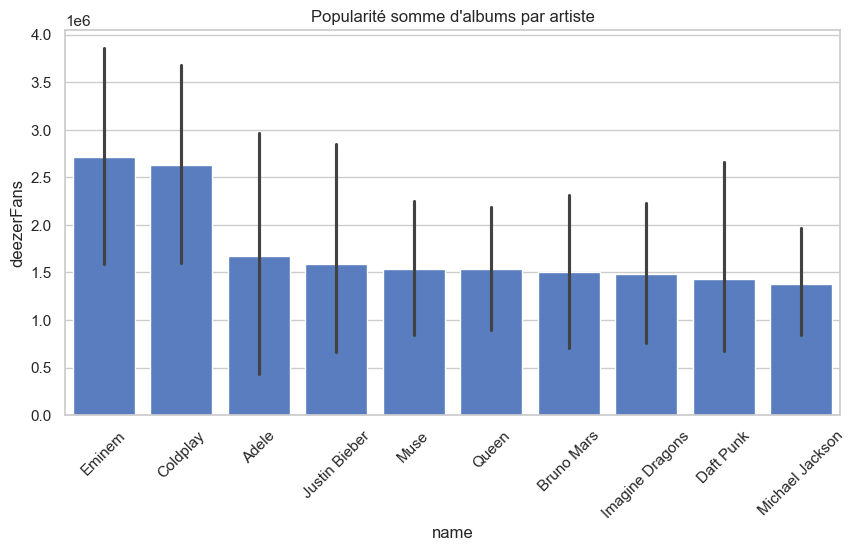

In [31]:
#Popularité totale fans d'albums par artiste
plt.figure(figsize=(10,5))
sns.barplot(x="name", y="deezerFans", data=albums, estimator=np.sum, 
            order=albums.groupby("name")["deezerFans"].sum().sort_values(ascending=False).head(10).index)
plt.title("Popularité somme d'albums par artiste")
plt.xticks(rotation=45)
plt.show()

In [32]:
# Conclusion so far: Un album francais sera plus populaire, se distinguerai mieux dans un marche moins sature que celui des albums anglophones

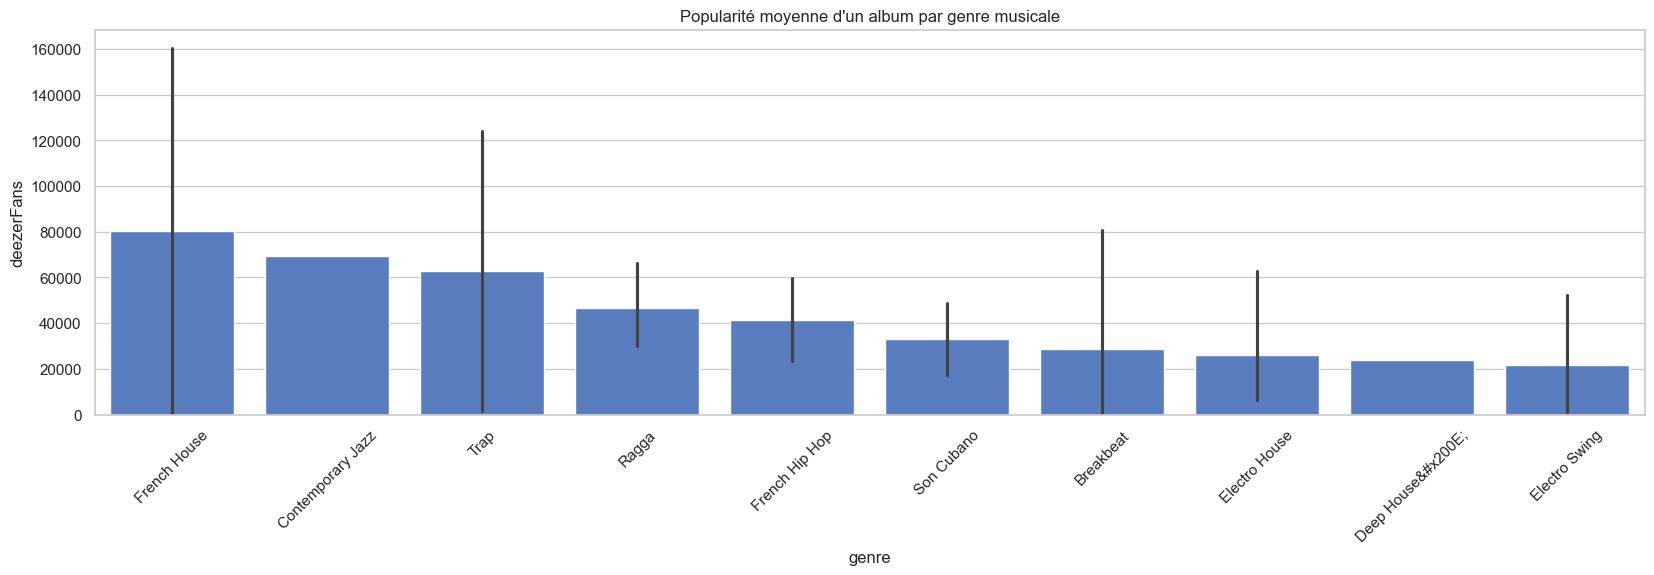

In [33]:
#Popularité moyenne d'un album par genre
plt.figure(figsize=(20,5))
sns.barplot(x="genre", y="deezerFans", data=albums, estimator=np.mean,
           order=albums.groupby("genre")["deezerFans"].mean().sort_values(ascending=False).head(10).index)
plt.title("Popularité moyenne d'un album par genre musicale")
plt.xticks(rotation=45)
plt.show()

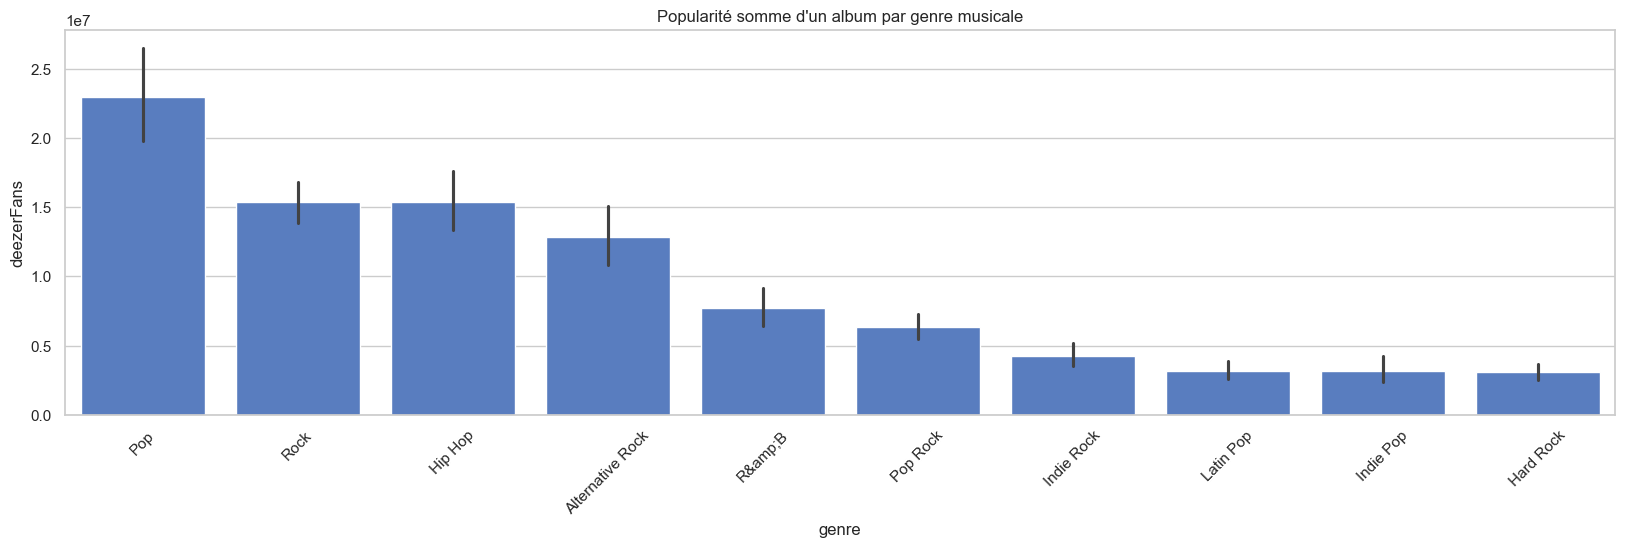

In [34]:
#Popularité somme d'un album par genre
plt.figure(figsize=(20,5))
sns.barplot(x="genre", y="deezerFans", data=albums, estimator=np.sum,
           order=albums.groupby("genre")["deezerFans"].sum().sort_values(ascending=False).head(10).index)
plt.title("Popularité somme d'un album par genre musicale")
plt.xticks(rotation=45)
plt.show()

In [35]:
# French house est premier en mean et median, mais pop est premier en somme de poopularite

In [36]:
albums.groupby("publicationDate")["_id"].count().sort_values(ascending=False).head()

publicationDate
2007    6515
2006    6515
2005    6313
2008    6236
2004    6077
Name: _id, dtype: int64

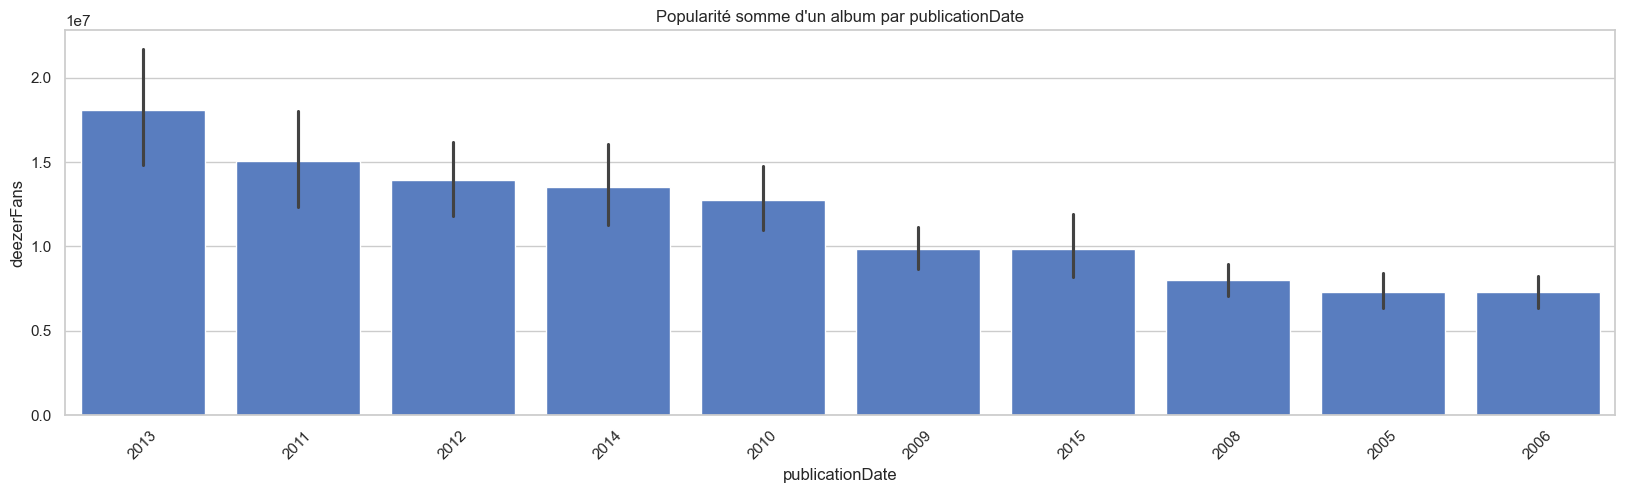

In [37]:
#Popularité somme d'un album par annee de publication
plt.figure(figsize=(20,5))
sns.barplot(x="publicationDate", y="deezerFans", data=albums, estimator=np.sum,
           order=albums.groupby("publicationDate")["deezerFans"].sum().sort_values(ascending=False).head(10).index)
plt.title("Popularité somme d'un album par publicationDate")
plt.xticks(rotation=45)
plt.show()

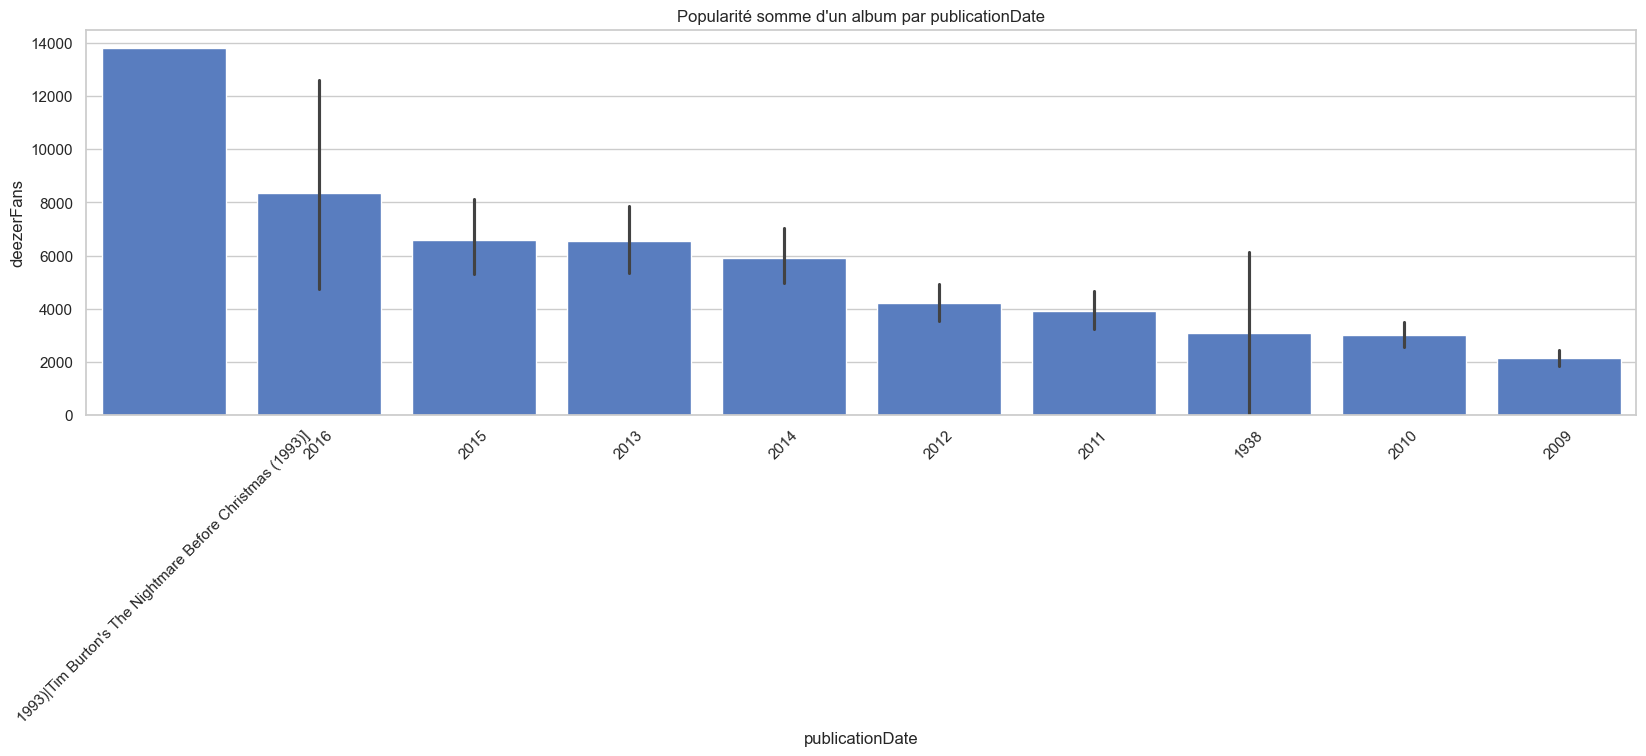

In [38]:
#Popularité moyenne d'un album par annee de publication
plt.figure(figsize=(20,5))
sns.barplot(x="publicationDate", y="deezerFans", data=albums, estimator=np.mean,
           order=albums.groupby("publicationDate")["deezerFans"].mean().sort_values(ascending=False).head(10).index)
plt.title("Popularité somme d'un album par publicationDate")
plt.xticks(rotation=45)
plt.show()

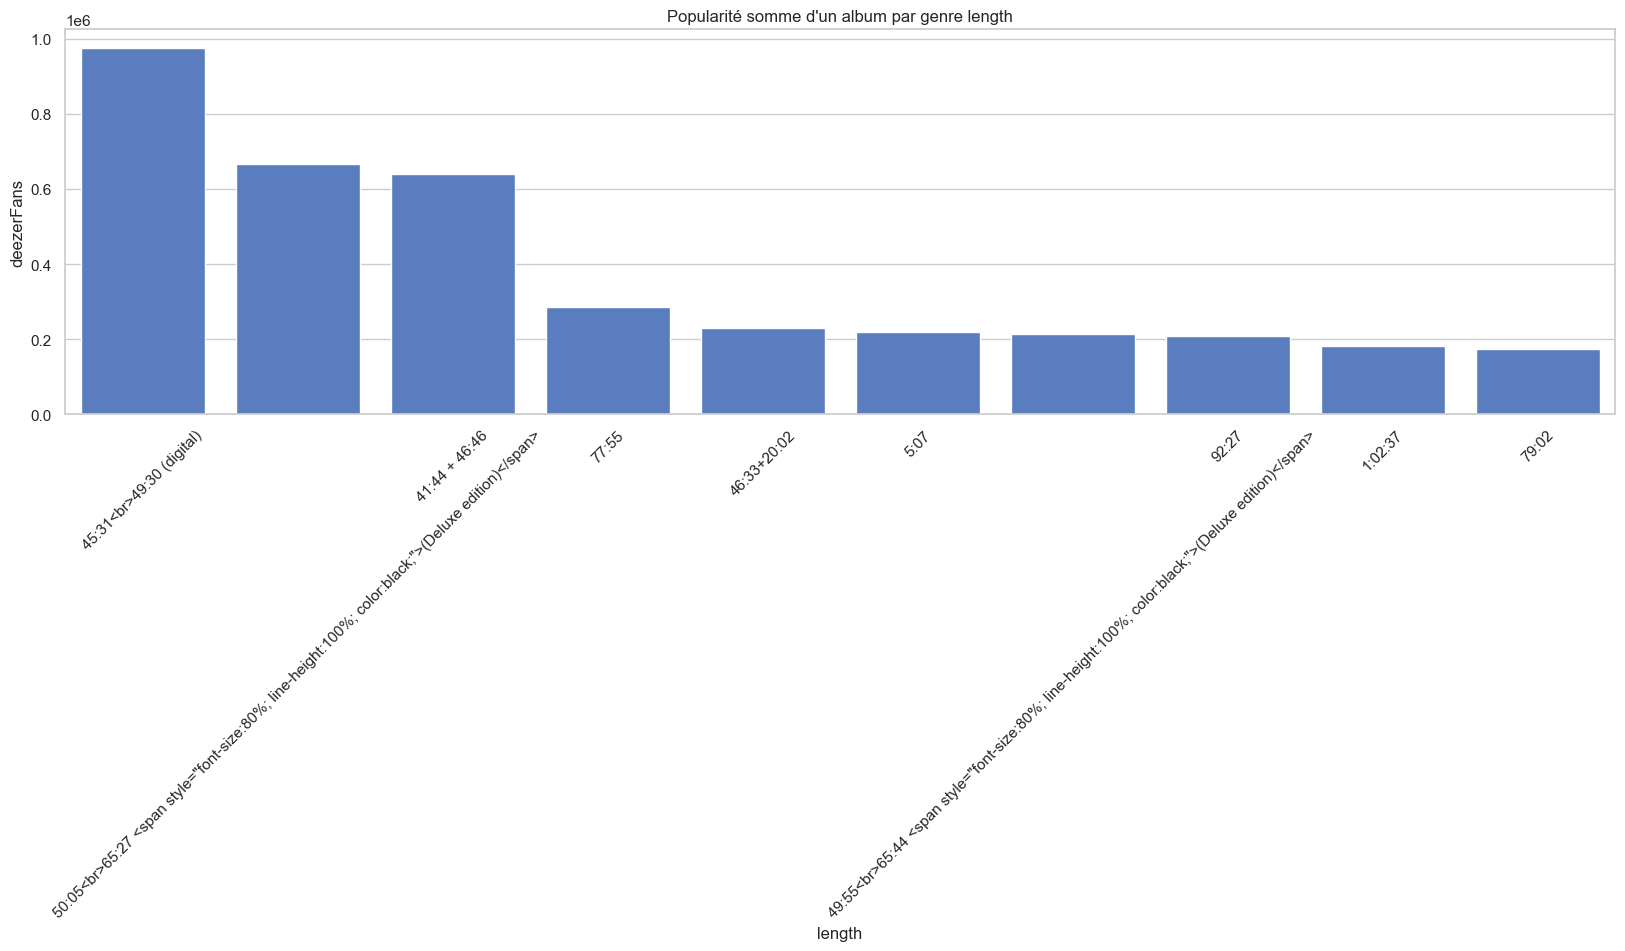

In [39]:
#Popularité median d'un album par longeur
plt.figure(figsize=(20,5))
sns.barplot(x="length", y="deezerFans", data=albums, estimator=np.median,
           order=albums.groupby("length")["deezerFans"].median().sort_values(ascending=False).head(10).index)
plt.title("Popularité somme d'un album par genre length")
plt.xticks(rotation=45)
plt.show()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     8) Conclusion: Les colonnes du genre musicale et label sont interessantes 
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Debut comprehension songs
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     1) Chargement
</p>

In [40]:
col_songs = pd.read_csv("wasabi_songs.csv", nrows=0, delimiter='\t').columns.tolist()
print(col_songs)

['Unnamed: 0', '_id', 'abstract', 'albumTitle', 'album_genre', 'animux_content', 'animux_contents', 'animux_path', 'animux_paths', 'arousal', 'arousal_predicted', 'artist', 'artist_lower', 'availableCountries', 'award', 'begin', 'bpm', 'chords_metadata', 'deezer_mapping', 'disambiguation', 'end', 'explicit_content_lyrics', 'explicit_content_lyrics_predicted', 'format', 'gain', 'genre', 'has_emotion_tags', 'has_social_tags', 'id_album', 'id_album_deezer', 'id_artist_deezer', 'id_song_deezer', 'id_song_musicbrainz', 'isClassic', 'isrc', 'langdetect_robust', 'language', 'language_detect', 'lastfm_id', 'length', 'lengthAlbum', 'multitrack_file', 'multitrack_path', 'newPreview', 'notes', 'origin', 'position', 'preview', 'producer', 'publicationDate', 'publicationDateAlbum', 'rank', 'rdf', 'recordLabel', 'recorded', 'releaseDate', 'runtime', 'subject', 'title', 'title_accent_fold', 'title_lower', 'urlAllmusic', 'urlAmazon', 'urlDeezer', 'urlGoEar', 'urlHypeMachine', 'urlItunes', 'urlLastFm',

In [41]:
columns_to_keep_songs=['_id', 'abstract', 'arousal', 'arousal_predicted', 'artist',
                          'award', 'bpm', 'chords_metadata', 'explicit_content_lyrics', 
                        'explicit_content_lyrics_predicted', 'format',
                       'genre', 'has_emotion_tags', 'id_album', 'isClassic', 'isrc',
                        'langdetect_robust', 'language', 'language_detect', 'length'
                       , 'origin', 'position', 'producer', 'publicationDate', 'gain','runtime',
                        'rank','recordLabel','title', 'title_accent_fold', 'valence',
                        'valence_predicted', 'id_album_deezer', 'id_artist_deezer','title_lower']
print(len(columns_to_keep_songs))

35


In [42]:
songs= pd.read_csv("wasabi_songs.csv", usecols=columns_to_keep_songs, delimiter='\t', low_memory=False)
songs

_id abstract  arousal  \
0        ObjectId(5714dec325ac0d8aee3804e7)      NaN      NaN   
1        ObjectId(5714dec325ac0d8aee3804e8)      NaN      NaN   
2        ObjectId(5714dec325ac0d8aee3804e9)      NaN      NaN   
3        ObjectId(5714dec325ac0d8aee3804ea)      NaN      NaN   
4        ObjectId(5714dec325ac0d8aee3804eb)      NaN      NaN   
...                                     ...      ...      ...   
2099549  ObjectId(57c92594e5c453a411c77445)      NaN      NaN   
2099550  ObjectId(57c92594e5c453a411c77446)      NaN      NaN   
2099551  ObjectId(57c92594e5c453a411c77447)      NaN      NaN   
2099552  ObjectId(57c92594e5c453a411c77448)      NaN      NaN   
2099553  ObjectId(57c92594e5c453a411c77449)      NaN      NaN   

         arousal_predicted   artist award    bpm  \
0                 0.469772        A   NaN   77.0   
1                 0.044004        A   NaN  106.0   
2                 0.487166        A   NaN  185.0   
3                 0.209630        A   NaN   96.0   
4                 0.403591        A   NaN  101.0   
...                    ...      ...   ...    ...   
2099549           0.117269  50 Cent   NaN    NaN   
2099550           0.239706  50 Cent   NaN    NaN   
2099551           0.845386  50 Cent   NaN    NaN   
2099552           0.333268  50 Cent   NaN  170.0   
2099553           0.254809  50 Cent   NaN    NaN   

                                           chords_metadata  \
0        {"confidence":0.7465091299677766,"duration":93...   
1        {"confidence":0.8071700162954916,"duration":18...   
2        {"confidence":0.7140212864414622,"duration":21...   
3        {"confidence":0.7674923946110387,"duration":23...   
4        {"confidence":0.7873848334514528,"duration":14...   
...                                                    ...   
2099549                                                NaN   
2099550                                                NaN   
2099551                                                NaN   
2099552                                                NaN   
2099553                                                NaN   

         explicit_content_lyrics explicit_content_lyrics_predicted  ...  \
0                            2.0                               unk  ...   
1                            2.0                               unk  ...   
2                            2.0                               unk  ...   
3                            2.0                               unk  ...   
4                            2.0                               unk  ...   
...                          ...                               ...  ...   
2099549                      NaN                               1.0  ...   
2099550                      NaN                               1.0  ...   
2099551                      NaN                               1.0  ...   
2099552                      2.0                               unk  ...   
2099553                      NaN                               1.0  ...   

        producer  publicationDate    rank  recordLabel runtime  \
0            NaN       1998-06-22  261631          NaN     NaN   
1            NaN       1998-06-22  297455          NaN     NaN   
2            NaN       1998-06-22  268232          NaN     NaN   
3            NaN       1998-06-22  308436          NaN     NaN   
4            NaN       1998-06-22  273805          NaN     NaN   
...          ...              ...     ...          ...     ...   
2099549      NaN              NaN       0          NaN     NaN   
2099550      NaN              NaN       0          NaN     NaN   
2099551      NaN              NaN       0          NaN     NaN   
2099552      NaN       2006-12-01  674036          NaN     NaN   
2099553      NaN              NaN       0          NaN     NaN   

                                                     title  \
0                                               Turn It Up   
1                                                  Foghorn   
2        

In [43]:
# J'ai choisis les colonnes qui ont un lien avec le contexte du projet, mais dans prochaine etape je serai plus selectif
songs['publicationDate']

0          1998-06-22
1          1998-06-22
2          1998-06-22
3          1998-06-22
4          1998-06-22
              ...    
2099549           NaN
2099550           NaN
2099551           NaN
2099552    2006-12-01
2099553           NaN
Name: publicationDate, Length: 2099554, dtype: object

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     2) Inventaire
</p>

In [44]:
songs.shape

(2099554, 35)

In [45]:
songs.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099554 entries, 0 to 2099553
Data columns (total 35 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   _id                                object 
 1   abstract                           object 
 2   arousal                            float64
 3   arousal_predicted                  float64
 4   artist                             object 
 5   award                              object 
 6   bpm                                float64
 7   chords_metadata                    object 
 8   explicit_content_lyrics            float64
 9   explicit_content_lyrics_predicted  object 
 10  format                             object 
 11  gain                               float64
 12  genre                              object 
 13  has_emotion_tags                   bool   
 14  id_album                           object 
 15  id_album_deezer                    float64
 16  id_artist_deezer  

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     03) Profiling rapide
</p>

In [46]:
desc_num_songs = songs.describe()
desc_num_songs

arousal  arousal_predicted           bpm  explicit_content_lyrics  \
count  16516.000000       2.099554e+06  1.106528e+06             1.340779e+06   
mean       0.201420      -7.704991e-02  1.300590e+02             1.490165e+00   
std        0.955581       2.416881e-01  2.796788e+01             1.952905e+00   
min       -2.333604      -7.106960e-01  4.800000e+01             0.000000e+00   
25%       -0.554405      -2.164181e-01  1.074000e+02             0.000000e+00   
50%        0.041735      -1.583897e-01  1.272000e+02             1.000000e+00   
75%        0.846830       2.222911e-03  1.498000e+02             2.000000e+00   
max        2.755091       1.733088e+00  3.018000e+02             6.000000e+00   

               gain  id_album_deezer  id_artist_deezer        length  \
count  1.064878e+06     1.397691e+06      1.397691e+06  1.399120e+06   
mean  -1.138302e+01     3.919538e+06      4.658431e+05  2.332420e+02   
std    3.598459e+00     4.523686e+06      1.279010e+06  2.873309e+02   
min   -6.970000e+01     7.990000e+02      1.000000e+00  1.000000e+00   
25%   -1.350000e+01     3.265725e+05      5.098000e+03  1.820000e+02   
50%   -1.070000e+01     1.217605e+06      6.481600e+04  2.230000e+02   
75%   -8.700000e+00     7.079798e+06      2.749530e+05  2.670000e+02   
max    2.300000e+00     3.981934e+07      1.227676e+07  6.553500e+04   

           position          rank       valence  valence_predicted  
count  2.099554e+06  2.099554e+06  16516.000000       2.099554e+06  
mean   8.649052e+00  1.581852e+05     -0.086851      -2.407867e-01  
std    1.790556e+01  1.439039e+05      1.056917       3.435304e-01  
min    0.000000e+00  0.000000e+00     -2.148097      -1.547015e+00  
25%    2.000000e+00  0.000000e+00     -1.040199      -3.980395e-01  
50%    6.000000e+00  1.743850e+05      0.007664      -2.996684e-01  
75%    1.000000e+01  2.943130e+05      0.815393      -4.546797e-02  
max    5.510000e+02  9.944500e+05      1.546714       1.404112e+00

In [47]:
desc_car_songs = songs.describe(include='object')
desc_car_songs

_id  \
count                              2099554   
unique                             2099287   
top     ObjectId(5714dec925ac0d8aee3c91f5)   
freq                                     4   

                                                 abstract         artist  \
count                                               72686        2099554   
unique                                              22666          77492   
top     "Silent Night" (German: Stille Nacht, heilige ...  Frank Sinatra   
freq                                                  204           2033   

        award                                    chords_metadata  \
count   73544                                             166133   
unique     57                                             144536   
top        []  {"confidence":0.8890566037735849,"duration":13...   
freq    66374                                                 19   

       explicit_content_lyrics_predicted format  genre  \
count                            2099554  73544  73544   
unique                                 3   1009   5643   
top                                  unk     []     []   
freq                             1644639  33915  11578   

                                  id_album          isrc  ... language  \
count                              2099554       1398931  ...   189690   
unique                              208686       1196196  ...       90   
top     ObjectId(5714debe25ac0d8aee36265f)  USUL10300318  ...      eng   
freq                                   552            36  ...   150688   

       language_detect origin producer publicationDate recordLabel runtime  \
count          1727055  16516    73544         1399375       73544   73544   
unique              36      3     5841           10559        3882    4711   
top            english  train       []      0000-00-00          []      []   
freq           1314253   9973    23230          171443       13522   13373   

          title title_accent_fold title_lower  
count   2099543           2099461     2099531  
unique  1169059           1113205     1163683  
top       Intro             Intro       intro  
freq       2997              3630        3000  

[4 rows x 21 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     4) Manquants / doublons
</p>

In [48]:
missing_songs = songs.isna().mean().sort_values(ascending=False)
missing_songs

arousal                              0.992134
valence                              0.992134
origin                               0.992134
langdetect_robust                    0.992134
abstract                             0.965380
runtime                              0.964972
award                                0.964972
producer                             0.964972
format                               0.964972
genre                                0.964972
recordLabel                          0.964972
chords_metadata                      0.920872
language                             0.909652
gain                                 0.492808
bpm                                  0.472970
explicit_content_lyrics              0.361398
id_album_deezer                      0.334291
id_artist_deezer                     0.334291
isrc                                 0.333701
length                               0.333611
publicationDate                      0.333489
language_detect                   

In [49]:
missing_songs[missing_songs<0.5].index

Index(['gain', 'bpm', 'explicit_content_lyrics', 'id_album_deezer',
       'id_artist_deezer', 'isrc', 'length', 'publicationDate',
       'language_detect', 'title_accent_fold', 'title_lower', 'title', '_id',
       'artist', 'isClassic', 'id_album', 'has_emotion_tags',
       'explicit_content_lyrics_predicted', 'arousal_predicted', 'position',
       'rank', 'valence_predicted'],
      dtype='object')

In [50]:
dupes_songs = songs.duplicated().sum()
dupes_songs

np.int64(266)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     5) Cardinalité caté
</p>

In [51]:
card_songs = songs.select_dtypes(include='object').nunique().sort_values(ascending=False)
card_songs

_id                                  2099287
isrc                                 1196196
title                                1169059
title_lower                          1163683
title_accent_fold                    1113205
id_album                              208686
chords_metadata                       144536
artist                                 77492
abstract                               22666
publicationDate                        10559
producer                                5841
genre                                   5643
runtime                                 4711
recordLabel                             3882
format                                  1009
language                                  90
award                                     57
language_detect                           36
langdetect_robust                         19
explicit_content_lyrics_predicted          3
origin                                     3
dtype: int64

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     06) Explorer et visualiser les relations numeriques entre variables
</p>

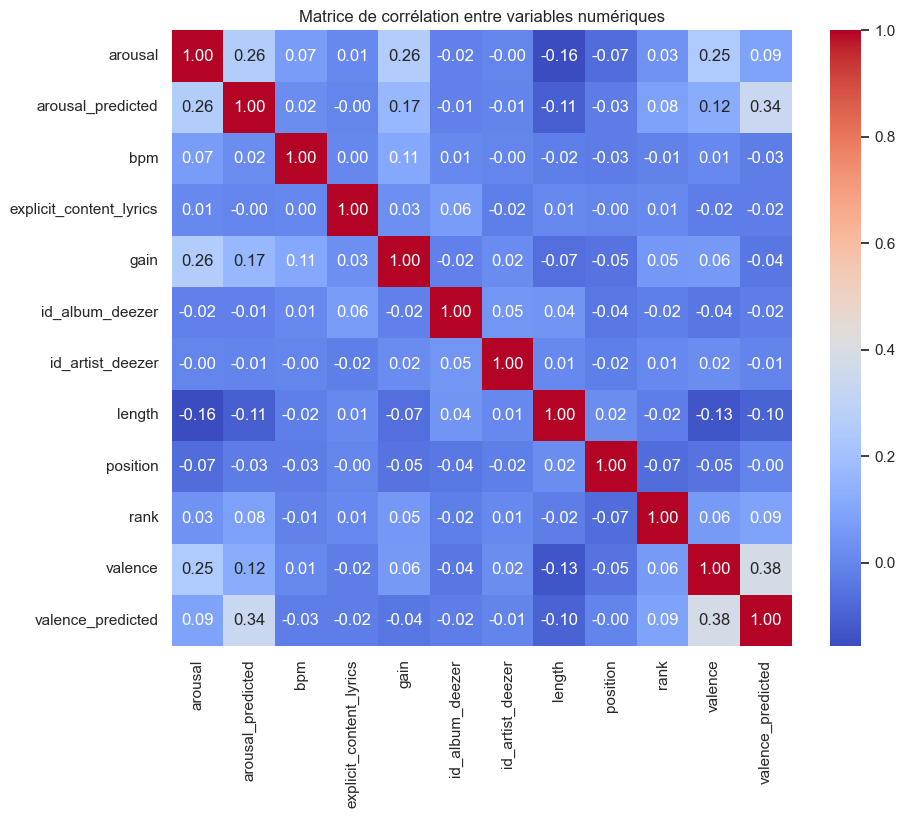

In [52]:
# Matrice des correlations
songs2 = songs.dropna(subset=songs.select_dtypes(include='number').columns)
# J'utilise que les lignes avec des valeurs numerique non manquantes
num_cols_songs = songs2.select_dtypes(include=np.number)
corr_songs = num_cols_songs.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_songs, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques")
plt.show()
# Rien de tres marquant cote correlation

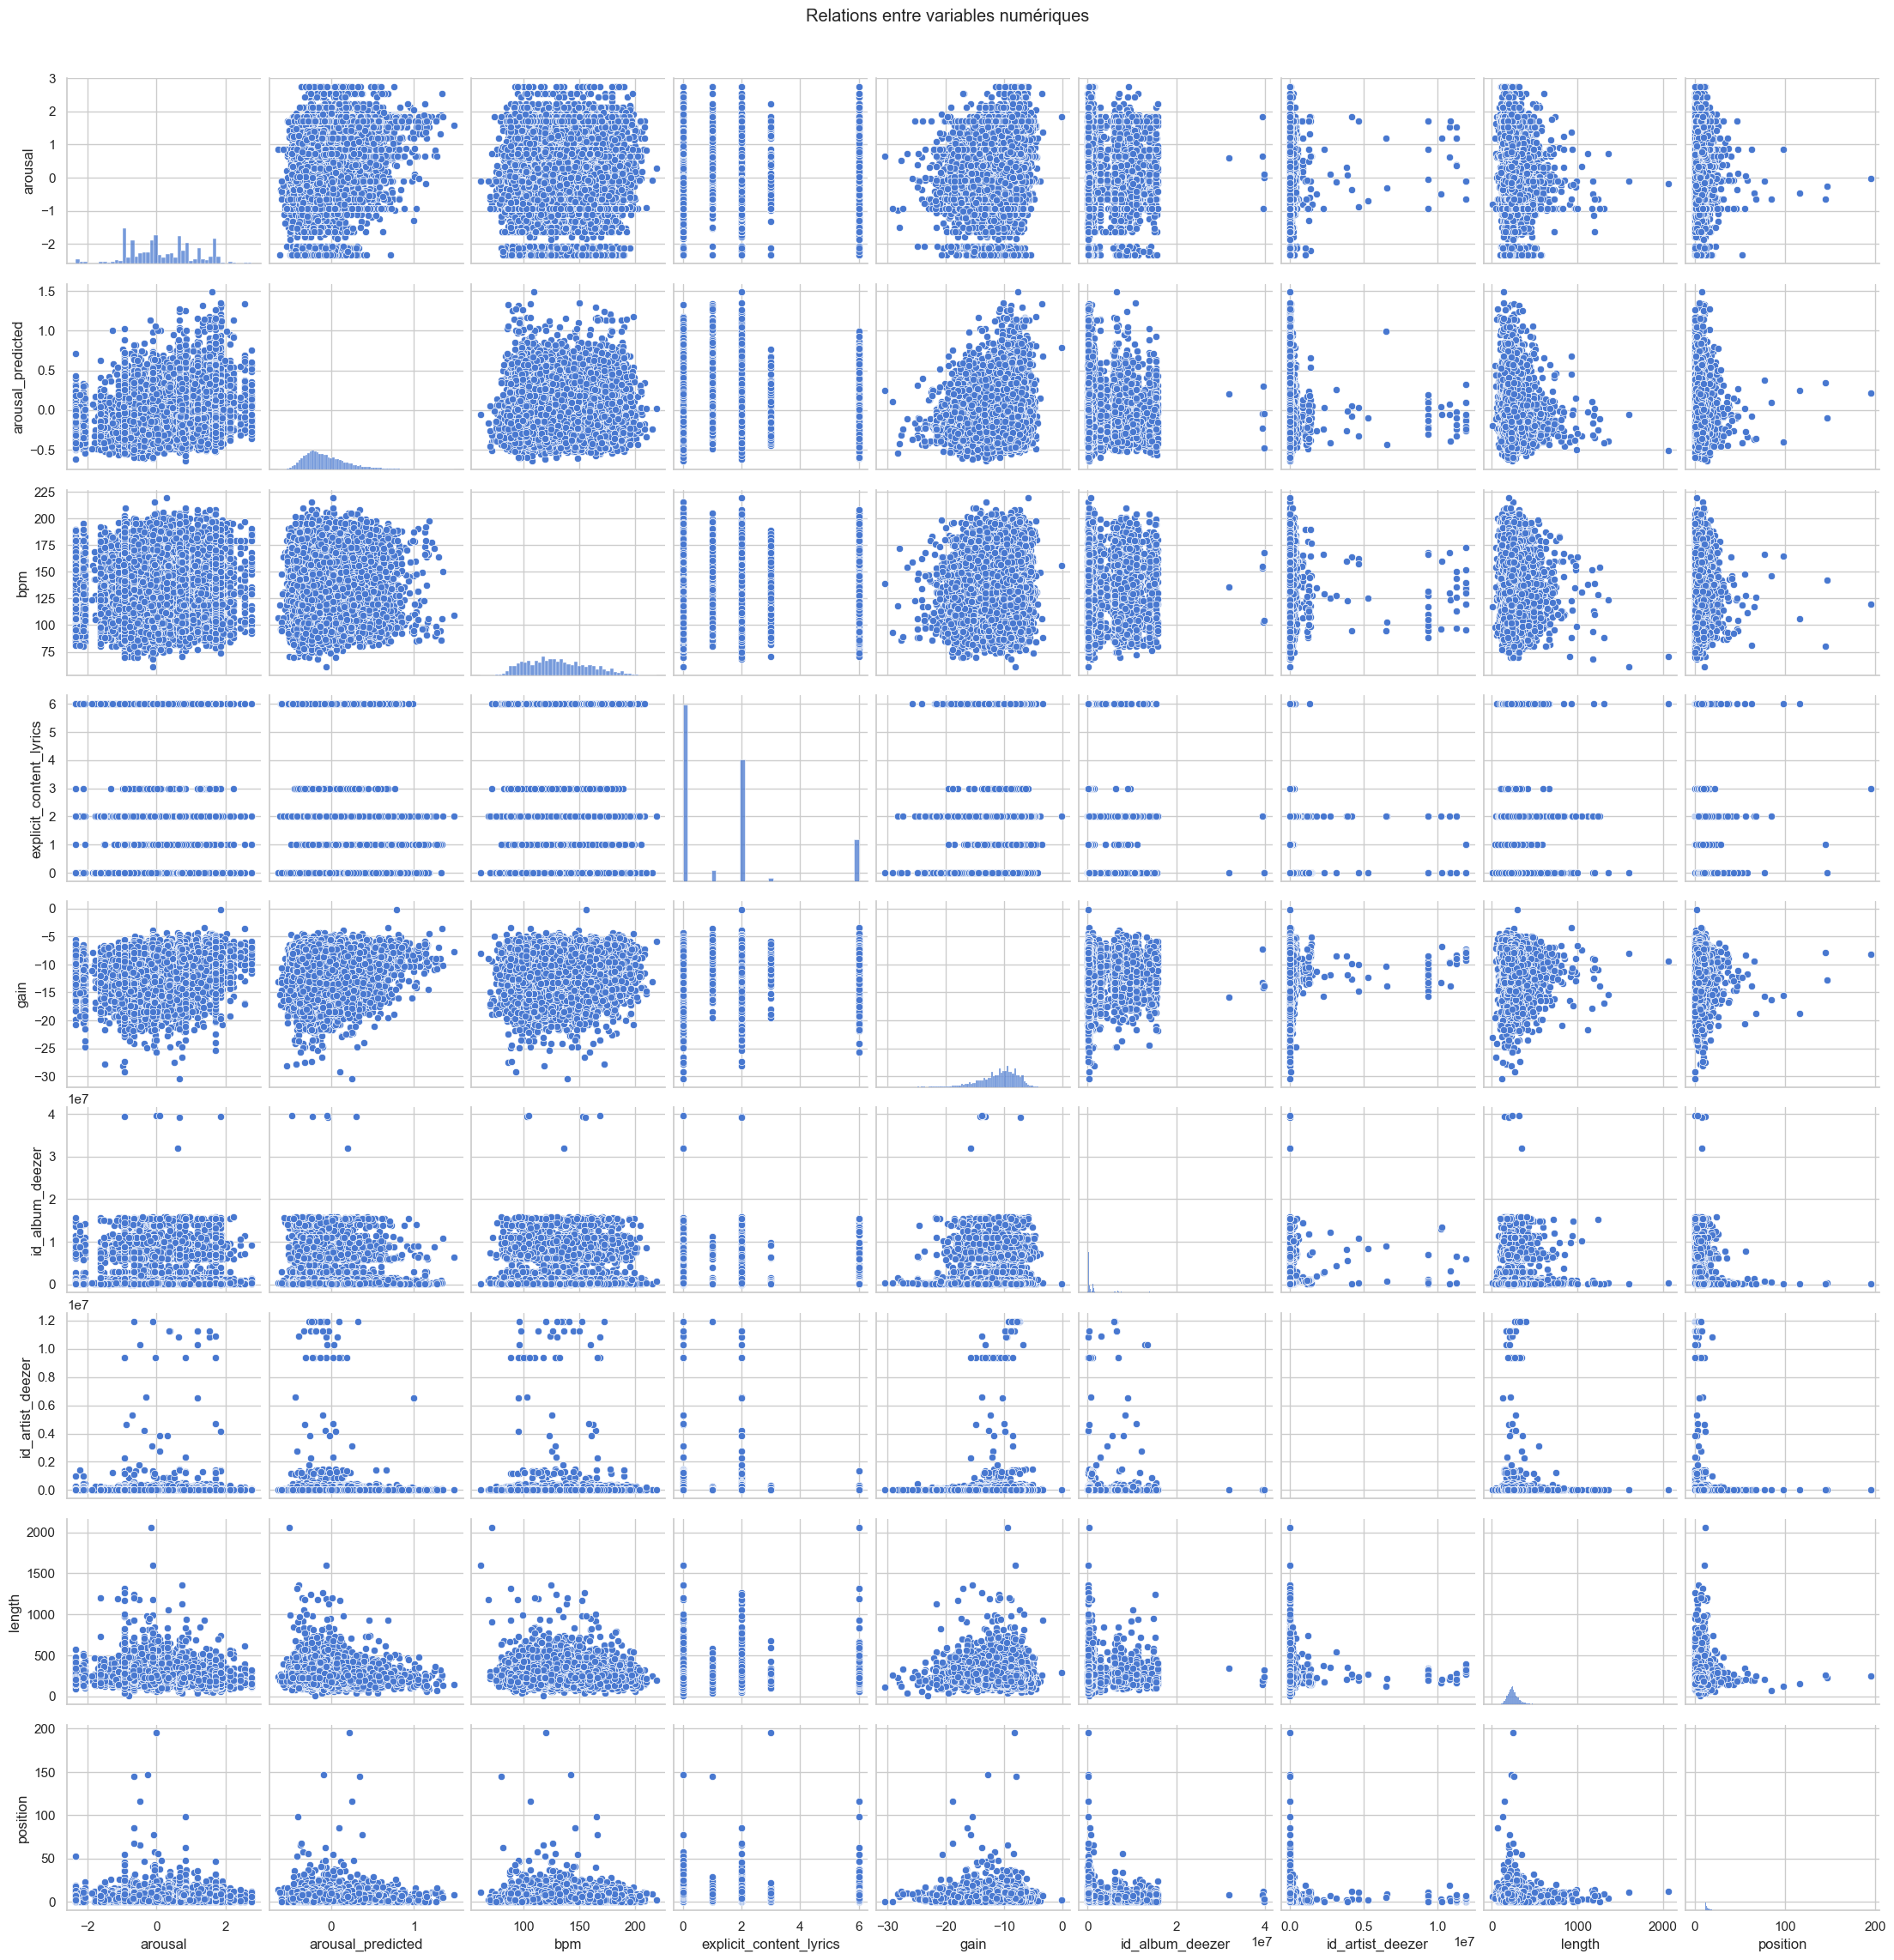

In [53]:
# Pairplot
sns.pairplot(songs2[num_cols_songs.columns[:9]])  
plt.suptitle("Relations entre variables numériques", y=1.02)
plt.show()

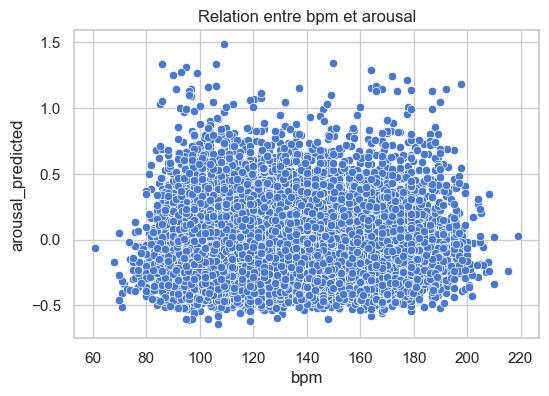

In [54]:
# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x="bpm", y="arousal_predicted", data=songs2)
plt.title("Relation entre bpm et arousal")
plt.show()

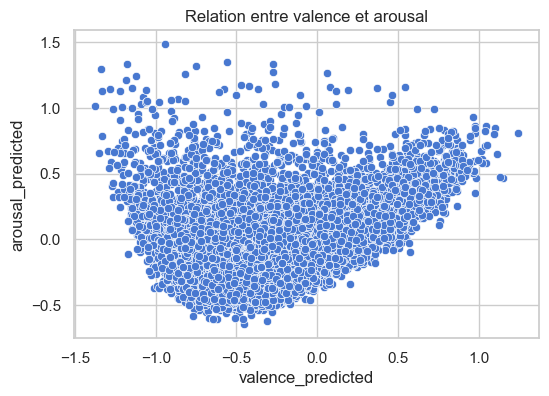

In [55]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="valence_predicted", y="arousal_predicted", data=songs2)
plt.title("Relation entre valence et arousal")
plt.show()
# Une chanson doit etre tres heureuse ou tres triste pour qu'elle soit satisfaisante 

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     7) Explorer et visualiser les relations entre variables categorielles
</p>

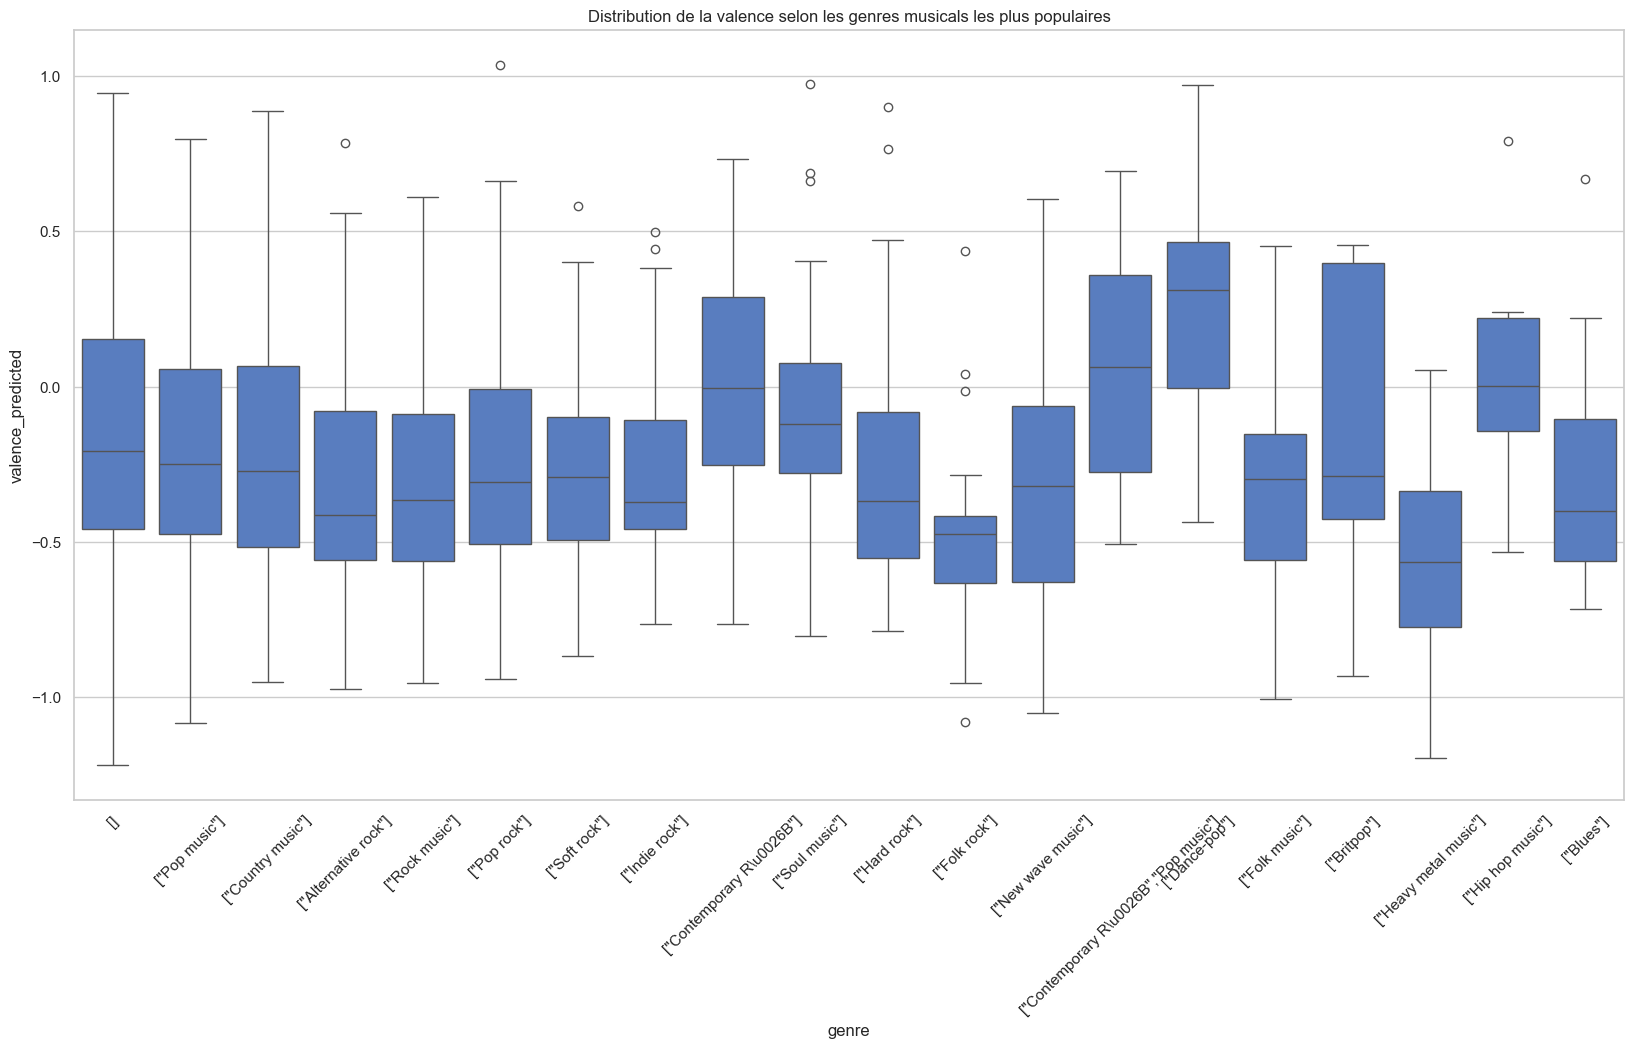

In [56]:
# Distribution de la valence selon les genres musicals les plus populaires
plt.figure(figsize=(20,10))
sns.boxplot(x="genre", y="valence_predicted", data=songs2
           ,order=songs2["genre"].value_counts().head(20).index)
plt.title("Distribution de la valence selon les genres musicals les plus populaires")
plt.xticks(rotation=45)
plt.show()

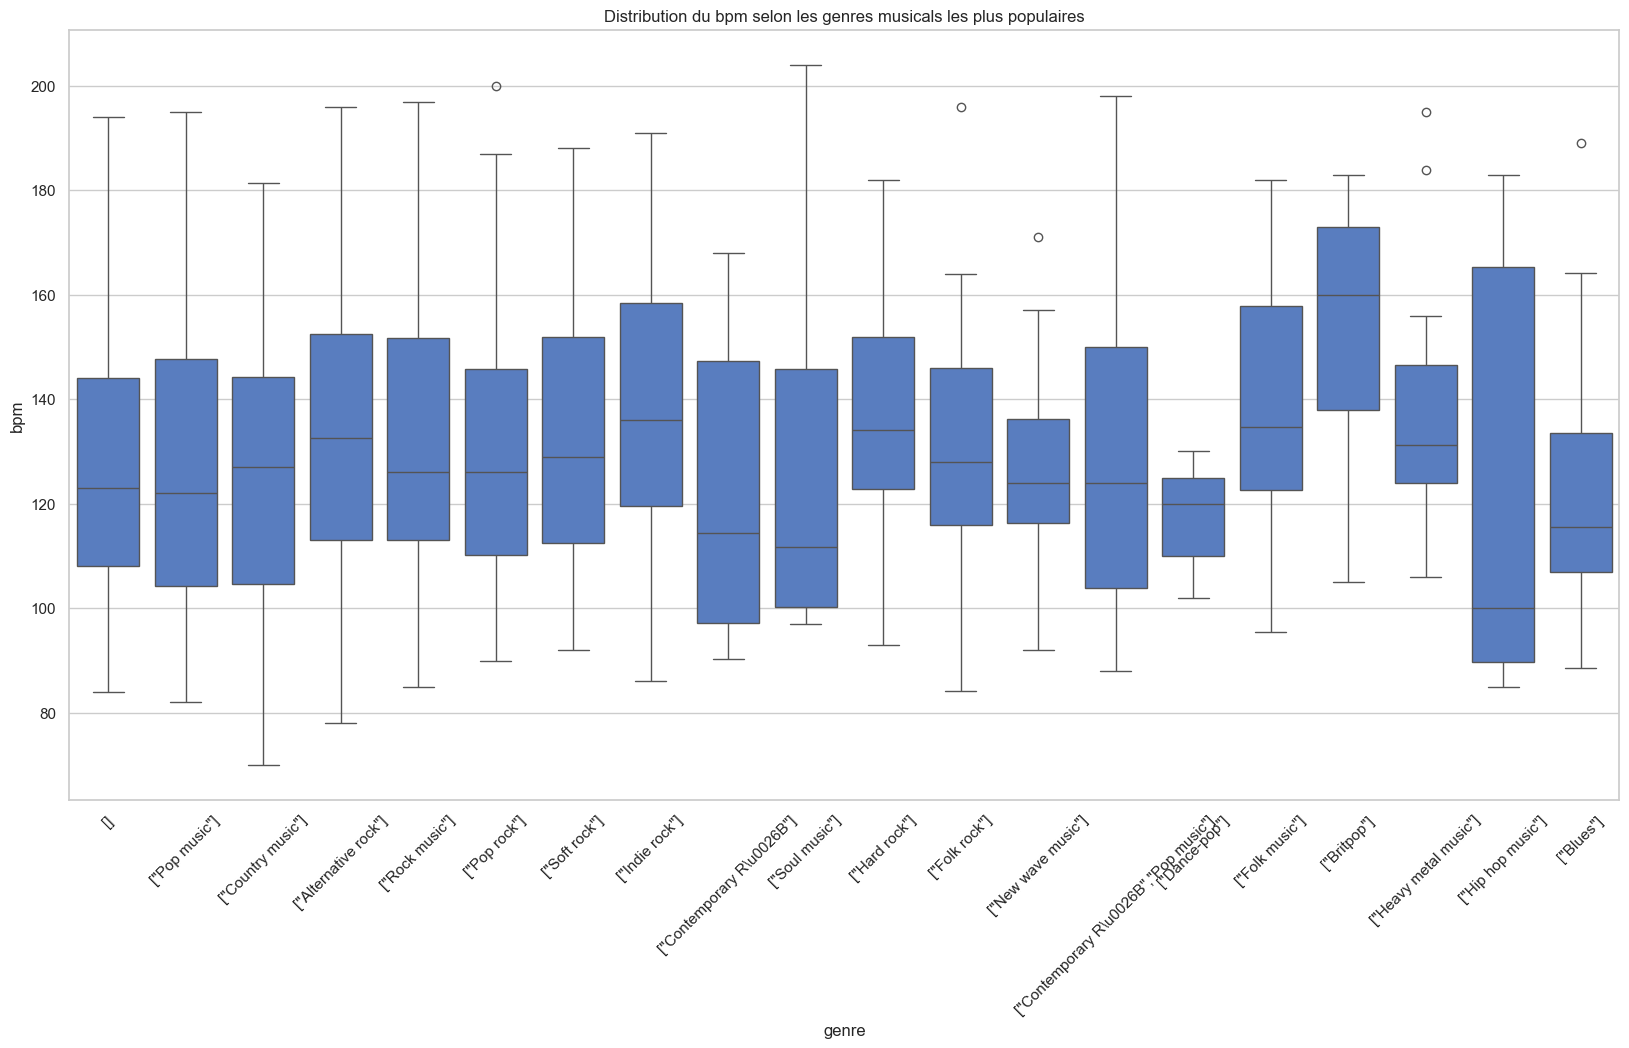

In [57]:
# Distribution du bpm selon les genres musicals les plus populaires
plt.figure(figsize=(20,10))
sns.boxplot(x="genre", y="bpm", data=songs2
           ,order=songs2["genre"].value_counts().head(20).index)
plt.title("Distribution du bpm selon les genres musicals les plus populaires")
plt.xticks(rotation=45)
plt.show()

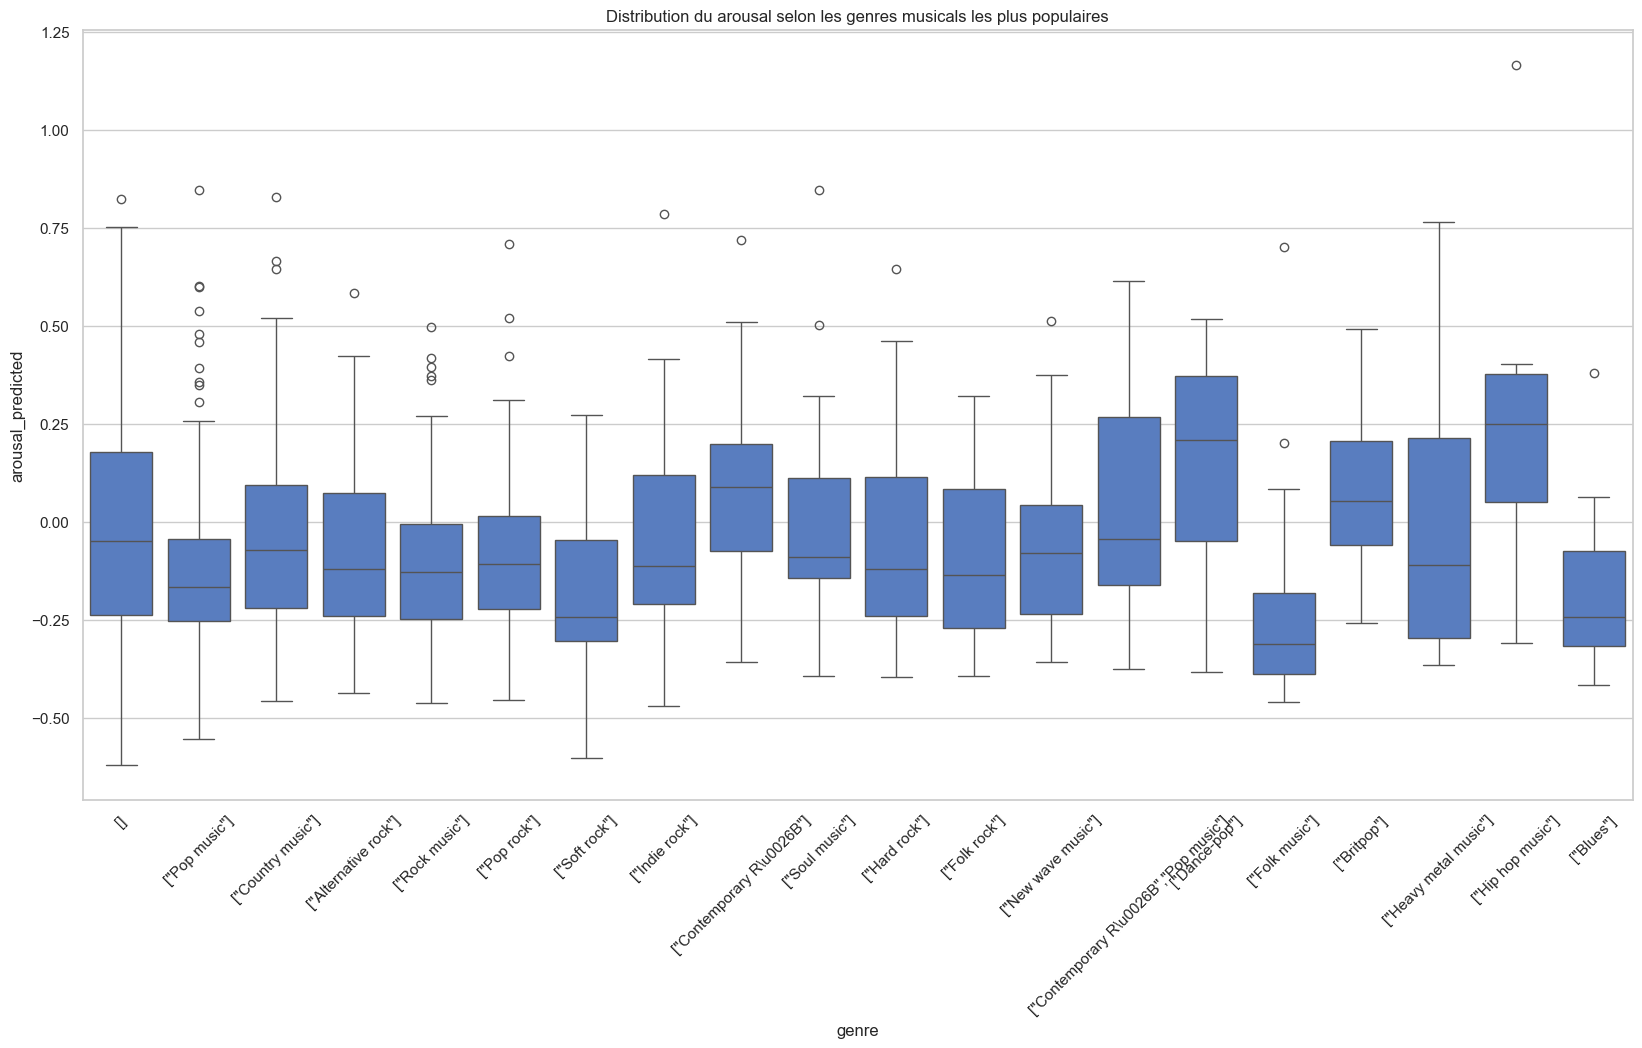

In [58]:
# Distribution du arousal selon les genres musicals les plus populaires
plt.figure(figsize=(20,10))
sns.boxplot(x="genre", y="arousal_predicted", data=songs2
           ,order=songs2["genre"].value_counts().head(20).index)
plt.title("Distribution du arousal selon les genres musicals les plus populaires")
plt.xticks(rotation=45)
plt.show()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     08) Conclusion: Le fichier songs etant le plus important, et en prenant en compte le pourcentage des donnes manquantes 
Je garde pour l'etape prochaines les colonnes suivantes: 
</p>

In [59]:
colonnes_songs=missing_songs[missing_songs<0.5].index
colonnes_songs

Index(['gain', 'bpm', 'explicit_content_lyrics', 'id_album_deezer',
       'id_artist_deezer', 'isrc', 'length', 'publicationDate',
       'language_detect', 'title_accent_fold', 'title_lower', 'title', '_id',
       'artist', 'isClassic', 'id_album', 'has_emotion_tags',
       'explicit_content_lyrics_predicted', 'arousal_predicted', 'position',
       'rank', 'valence_predicted'],
      dtype='object')

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Debut Comprehension hot 100
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     1) Chargement
</p>

In [60]:
hot=pd.read_csv("Hot_100.csv")
hot.head()

chart_position chart_date       song           performer  \
0              84   5/5/1990  "B" Girls  Young And Restless   
1              78  5/12/1990  "B" Girls  Young And Restless   
2              68  5/19/1990  "B" Girls  Young And Restless   
3              60  5/26/1990  "B" Girls  Young And Restless   
4              58   6/2/1990  "B" Girls  Young And Restless   

                       song_id  instance  time_on_chart  consecutive_weeks  \
0  "B" GirlsYoung And Restless         1              1                NaN   
1  "B" GirlsYoung And Restless         1              2                1.0   
2  "B" GirlsYoung And Restless         1              3                2.0   
3  "B" GirlsYoung And Restless         1              4                3.0   
4  "B" GirlsYoung And Restless         1              5                4.0   

   previous_week  peak_position  worst_position chart_debut  \
0            NaN             84              84    5/5/1990   
1           84.0             78              84    5/5/1990   
2           78.0             68              84    5/5/1990   
3           68.0             60              84    5/5/1990   
4           60.0             58              84    5/5/1990   

                                           chart_url  
0  https://www.billboard.com/charts/hot-100/1990-...  
1  https://www.billboard.com/charts/hot-100/1990-...  
2  https://www.billboard.com/charts/hot-100/1990-...  
3  https://www.billboard.com/charts/hot-100/1990-...  
4  https://www.billboard.com/charts/hot-100/1990-...

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     2) Profiling rapide
</p>

In [61]:
hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335195 entries, 0 to 335194
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   chart_position     335195 non-null  int64  
 1   chart_date         335195 non-null  object 
 2   song               335195 non-null  object 
 3   performer          335195 non-null  object 
 4   song_id            335195 non-null  object 
 5   instance           335195 non-null  int64  
 6   time_on_chart      335195 non-null  int64  
 7   consecutive_weeks  302067 non-null  float64
 8   previous_week      302067 non-null  float64
 9   peak_position      335195 non-null  int64  
 10  worst_position     335195 non-null  int64  
 11  chart_debut        335195 non-null  object 
 12  chart_url          335195 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 33.2+ MB


In [62]:
hot.describe()

chart_position       instance  time_on_chart  consecutive_weeks  \
count   335195.000000  335195.000000  335195.000000      302067.000000   
mean        50.499324       1.078653       9.213708           8.802918   
std         28.865715       0.373157       7.723447           7.381660   
min          1.000000       1.000000       1.000000           1.000000   
25%         25.500000       1.000000       4.000000           3.000000   
50%         50.000000       1.000000       7.000000           7.000000   
75%         75.000000       1.000000      13.000000          12.000000   
max        100.000000      15.000000      91.000000          89.000000   

       previous_week  peak_position  worst_position  
count  302067.000000  335195.000000   335195.000000  
mean       47.568725      40.861460       80.717776  
std        28.049545      29.345153       18.120725  
min         1.000000       1.000000        1.000000  
25%        23.000000      13.000000       74.000000  
50%        47.000000      38.000000       86.000000  
75%        71.000000      65.000000       94.000000  
max       100.000000     100.000000      100.000000

In [63]:
missing_hot = hot.isna().mean().sort_values(ascending=False)
missing_hot
# Mon dataset est complet

previous_week        0.098832
consecutive_weeks    0.098832
song                 0.000000
chart_date           0.000000
chart_position       0.000000
song_id              0.000000
performer            0.000000
time_on_chart        0.000000
instance             0.000000
peak_position        0.000000
worst_position       0.000000
chart_debut          0.000000
chart_url            0.000000
dtype: float64

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     3) Etude des correlations
</p>

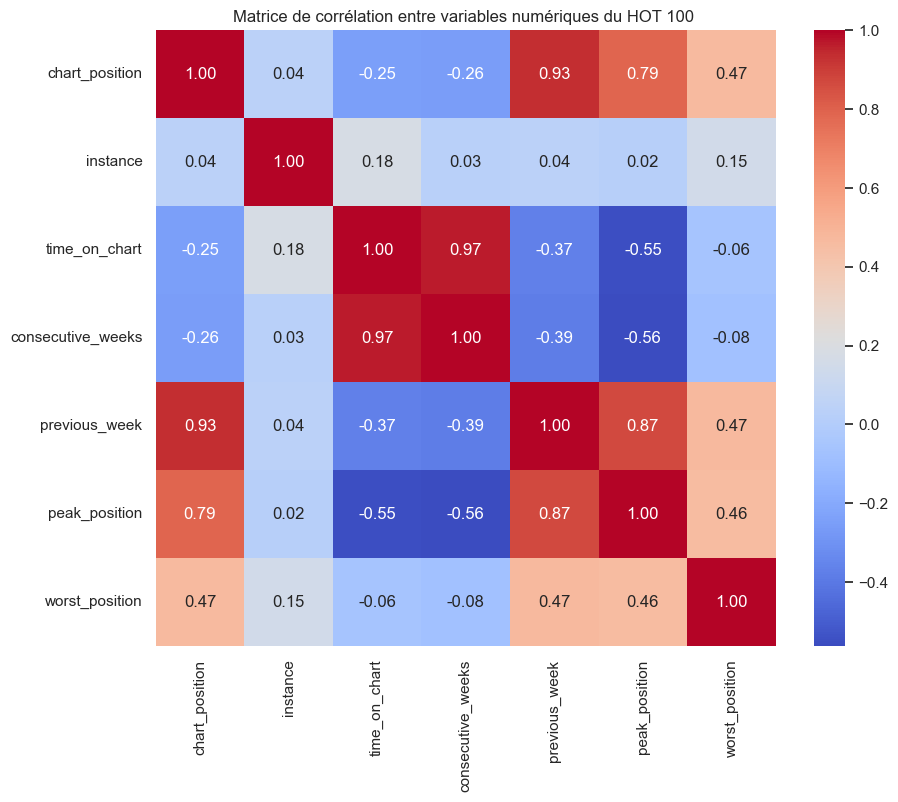

In [64]:
# Matrice des correlations
hot2 = hot.dropna(subset=hot.select_dtypes(include='number').columns)
# J'utilise que les lignes avec des valeurs numerique non manquantes
num_cols_hot = hot2.select_dtypes(include=np.number)
corr_hot = num_cols_hot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_hot, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques du HOT 100 ")
plt.show()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     4) Pairplot
</p>

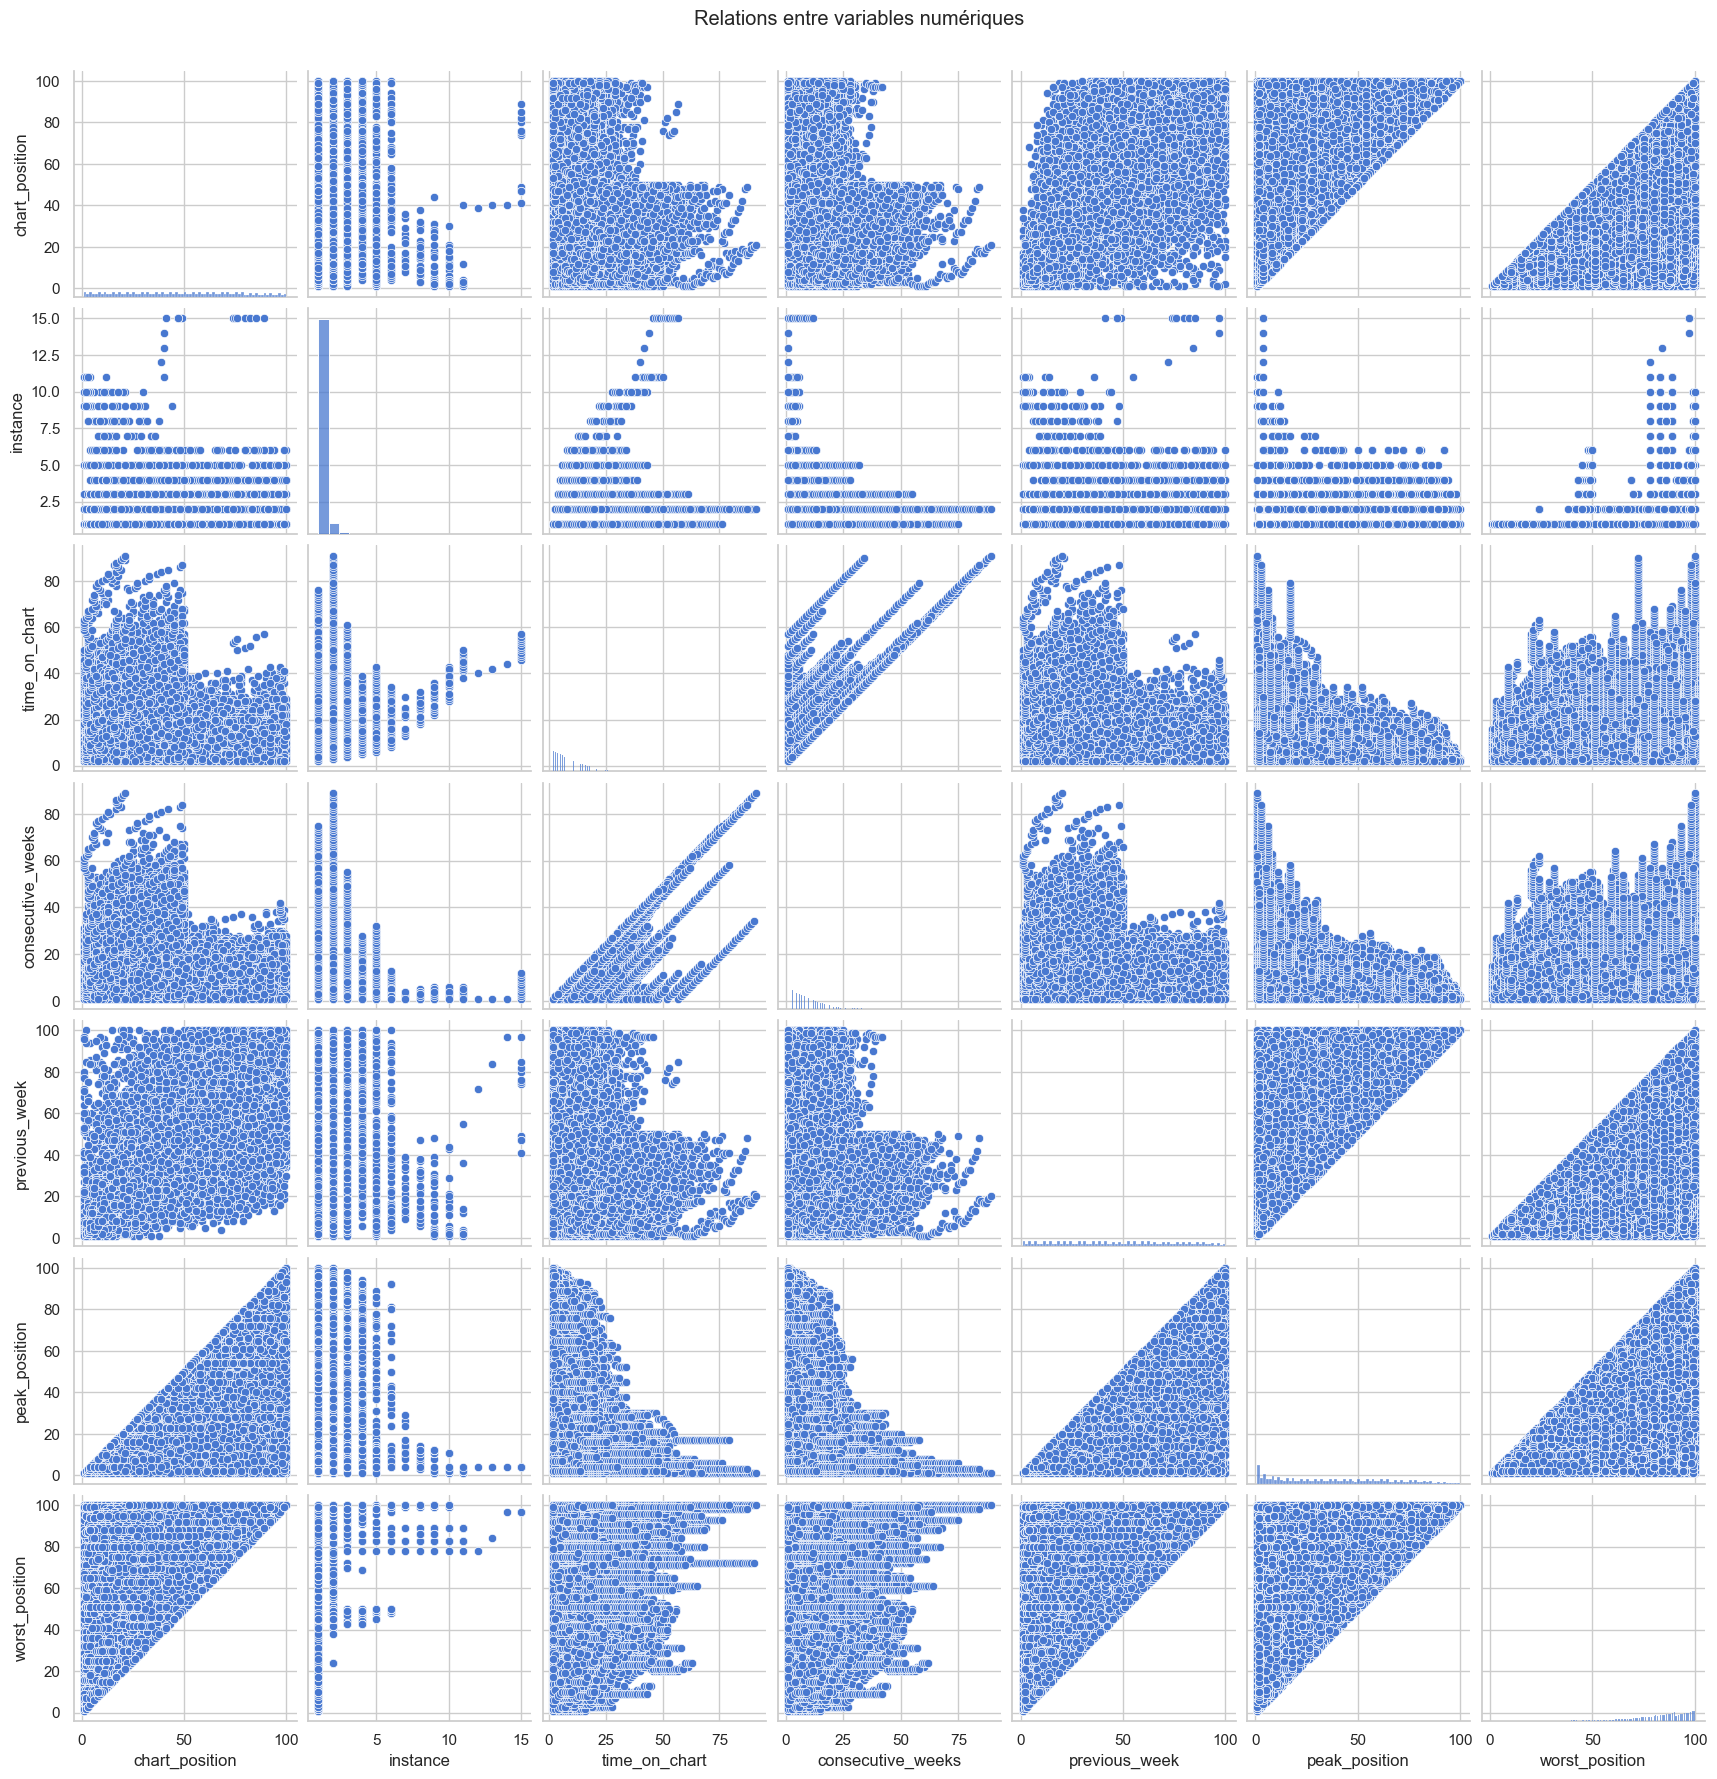

In [65]:
sns.pairplot(hot2[num_cols_hot.columns[:9]])  
plt.suptitle("Relations entre variables numériques", y=1.02)
plt.show()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     5) Conclusion: Pour la partie de preparation, je garde que les chansons qui sont dans le dataset
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkorange; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    Etape: preparation donnees
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Debut preparation Wasabi Albums
</p>

In [66]:
albums_keep=albums[['id_album_deezer', 'deezerFans', 'genre']].copy()

albums_keep['id_album_deezer'] = pd.to_numeric(albums_keep['id_album_deezer'], errors="coerce")
albums_keep['deezerFans'] = pd.to_numeric(albums_keep['deezerFans'], errors="coerce")
albums_keep = albums_keep.dropna(subset=[ 'deezerFans'])
albums_keep = albums_keep.dropna(subset=['id_album_deezer'])
albums_keep = albums_keep.drop_duplicates(subset='id_album_deezer', keep="first")
albums_keep

id_album_deezer  deezerFans             genre
0             6585846.0       140.0  Alternative Rock
1             6585740.0       216.0  Alternative Rock
2              614237.0       388.0  Alternative Rock
3               82862.0       272.0  Alternative Rock
4               83001.0        33.0               NaN
...                 ...         ...               ...
208735         118660.0     54626.0           Hip Hop
208737         426274.0     35784.0           Hip Hop
208738         104292.0      2553.0           Hip Hop
208739        7838971.0     24320.0           Hip Hop
208740        5151921.0      5082.0               NaN

[127653 rows x 3 columns]

In [67]:
top_genres = (
    albums_keep.groupby("genre")["deezerFans"]
    .sum()
    .sort_values(ascending=False)
    .head(11)
)
top_genre_names = top_genres.index.tolist()
top_genre_names.remove('R&amp;B')
top_genre_names

['Pop',
 'Hip Hop',
 'Rock',
 'Alternative Rock',
 'Pop Rock',
 'Indie Rock',
 'Indie Pop',
 'Hard Rock',
 'Heavy Metal',
 'Latin Pop']

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Debut preparation hot 100
</p>

In [68]:
# Nettoyage pour la fusion (minuscules + suppression espaces)
keep_hot=hot.copy()
keep_hot['title_lower'] = keep_hot['song'].astype(str).str.lower().str.strip()

In [69]:
hot_avg=keep_hot.groupby("title_lower")["chart_position"].mean()
hot_avg = hot_avg.reset_index()
hot_avg

title_lower  chart_position
0                                             "b" girls       71.000000
1                 "cherry cherry" from hot august night       47.900000
2                               "having a party" medley       76.000000
3                                           "joy" pt. i       42.222222
4                                        "roots" medley       70.571429
...                                                 ...             ...
25084                                          zoo york       65.000000
25085                                              zoom       75.230769
25086                                   zorba the greek       34.916667
25087                                        zunga zeng       71.733333
25088  ¿dònde està santa claus? (where is santa claus?)       53.250000

[25089 rows x 2 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Debut preparation wasabi songs
</p>

In [70]:
# Selectionner les colonnes a guarder
songs_keep=songs[['bpm', 'length', 'publicationDate',
        'arousal',
         'id_album_deezer', 
        'position',
       'valence','title_lower','gain','language'
    ]].copy()
songs_keep

bpm  length publicationDate  arousal  id_album_deezer  position  \
0         77.0    93.0      1998-06-22      NaN        6585846.0         0   
1        106.0   184.0      1998-06-22      NaN        6585846.0         1   
2        185.0   216.0      1998-06-22      NaN        6585846.0         2   
3         96.0   230.0      1998-06-22      NaN        6585846.0         3   
4        101.0   141.0      1998-06-22      NaN        6585846.0         4   
...        ...     ...             ...      ...              ...       ...   
2099549    NaN     NaN             NaN      NaN              NaN       247   
2099550    NaN     NaN             NaN      NaN              NaN       248   
2099551    NaN     NaN             NaN      NaN              NaN       249   
2099552  170.0   257.0      2006-12-01      NaN         161523.0       250   
2099553    NaN     NaN             NaN      NaN              NaN       251   

         valence                                        title_lower  gain  \
0            NaN                                         turn it up -29.4   
1            NaN                                            foghorn -10.6   
2            NaN                                      cheeky monkey -10.4   
3            NaN                                              no. 1 -10.6   
4            NaN                                           bad idea  -9.9   
...          ...                                                ...   ...   
2099549      NaN                                     your not ready   NaN   
2099550      NaN                  eminem & 50 cent:jimmy crack corn   NaN   
2099551      NaN                         eminem & 50 cent:the re-up   NaN   
2099552      NaN  eminem, 50 cent, ca$his & lloyd banks:you don'...  -6.8   
2099553      NaN               eminem, obie trice & 50 cent:love me   NaN   

        language  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2099549      NaN  
2099550      NaN  
2099551      NaN  
2099552      NaN  
2099553      eng  

[2099554 rows x 10 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Feature engineering
</p>

In [71]:
songs_keep['is_english'] = songs_keep['language'].astype(str).str.lower().str.contains('eng').astype(int)

In [72]:
songs_keep["publicationDate"] = pd.to_datetime(songs_keep["publicationDate"], errors="coerce")
songs_keep["year"] = songs_keep["publicationDate"].dt.year
songs_keep['decade'] =  (songs_keep['year'] // 10) * 10
songs_keep


bpm  length publicationDate  arousal  id_album_deezer  position  \
0         77.0    93.0      1998-06-22      NaN        6585846.0         0   
1        106.0   184.0      1998-06-22      NaN        6585846.0         1   
2        185.0   216.0      1998-06-22      NaN        6585846.0         2   
3         96.0   230.0      1998-06-22      NaN        6585846.0         3   
4        101.0   141.0      1998-06-22      NaN        6585846.0         4   
...        ...     ...             ...      ...              ...       ...   
2099549    NaN     NaN             NaT      NaN              NaN       247   
2099550    NaN     NaN             NaT      NaN              NaN       248   
2099551    NaN     NaN             NaT      NaN              NaN       249   
2099552  170.0   257.0      2006-12-01      NaN         161523.0       250   
2099553    NaN     NaN             NaT      NaN              NaN       251   

         valence                                        title_lower  gain  \
0            NaN                                         turn it up -29.4   
1            NaN                                            foghorn -10.6   
2            NaN                                      cheeky monkey -10.4   
3            NaN                                              no. 1 -10.6   
4            NaN                                           bad idea  -9.9   
...          ...                                                ...   ...   
2099549      NaN                                     your not ready   NaN   
2099550      NaN                  eminem & 50 cent:jimmy crack corn   NaN   
2099551      NaN                         eminem & 50 cent:the re-up   NaN   
2099552      NaN  eminem, 50 cent, ca$his & lloyd banks:you don'...  -6.8   
2099553      NaN               eminem, obie trice & 50 cent:love me   NaN   

        language  is_english    year  decade  
0            NaN           0  1998.0  1990.0  
1            NaN           0  1998.0  1990.0  
2            NaN           0  1998.0  1990.0  
3            NaN           0  1998.0  1990.0  
4            NaN           0  1998.0  1990.0  
...          ...         ...     ...     ...  
2099549      NaN           0     NaN     NaN  
2099550      NaN           0     NaN     NaN  
2099551      NaN           0     NaN     NaN  
2099552      NaN           0  2006.0  2000.0  
2099553      eng           1     NaN     NaN  

[2099554 rows x 13 columns]

In [73]:
songs_keep['radio_friendly_length'] = songs_keep['length'].apply(
    lambda x: 1 if (x >= 150 and x <= 240) else 0)

In [74]:
#  Définition des Plages (Bins)
# Ces seuils sont des standards approximatifs de l'industrie musicale :
# < 70 : Très lent (Ballades, Ambient)
# 70-100 : Lent / Mid-tempo (R&B, Hip-Hop chill)
# 100-130 : Up-tempo / Commercial (Pop, Disco, Funk)
# > 130 : Rapide (Electronic, Drum&Bass, Rock rapide)
bins = [0, 70, 100, 130, 300] 
labels = ['Slow', 'Mid', 'Up', 'Fast']

# Création de la colonne catégorielle
songs_keep['bpm_range'] = pd.cut(songs_keep['bpm'], bins=bins, labels=labels)

# Conversion en One-Hot Encoding (Pour le Random Forest)
# Cela va créer 4 nouvelles colonnes : bpm_Slow, bpm_Mid, bpm_Up, bpm_Fast
# et remplir avec des 0 et des 1.
songs_keep = pd.get_dummies(songs_keep, columns=['bpm_range'], prefix='bpm')

colonnes_bpm=['bpm_Slow', 'bpm_Mid', 'bpm_Up', 'bpm_Fast']
songs_keep[colonnes_bpm] = songs_keep[colonnes_bpm].astype(int)

In [75]:
songs_keep=songs_keep.drop(columns=['publicationDate', 'year','language','length','bpm'])
songs_keep.dropna(inplace=True)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Concatenation des 3 datasets
</p>

In [76]:
#1er concatenation avec le dataset deezer
concat01=pd.merge(songs_keep, albums_keep , on="id_album_deezer", how="inner").copy()
concat01
concat01 = concat01 .rename(columns={"deezerFans": "FansAlbums"})
concat01

arousal  id_album_deezer  position   valence  \
0     -0.789480         303269.0         0 -0.780962   
1     -0.930065         303269.0         2 -0.538098   
2      0.554138         303269.0         3  0.991401   
3      0.044808         303269.0         6 -0.713652   
4      0.092053         303269.0         7 -0.611094   
...         ...              ...       ...       ...   
13069 -0.154315         294574.0        11 -0.826261   
13070  0.337500         100389.0         4 -0.995174   
13071  0.791518         100389.0         8  0.007664   
13072  1.538229         118660.0        10 -1.400403   
13073 -0.655810         122366.0       145 -1.935250   

                    title_lower  gain  is_english  decade  \
0                       rangers  -8.1           1  2000.0   
1                       whisper -10.2           1  2000.0   
2                 you picked me  -6.9           1  2000.0   
3                  think of you  -9.4           1  2000.0   
4                ashes and wine -11.2           1  2000.0   
...                         ...   ...         ...     ...   
13069                here by me  -9.9           1  2000.0   
13070                     pages  -8.1           1  2000.0   
13071  your arms feel like home  -9.0           1  2000.0   
13072            amusement park  -8.9           1  2000.0   
13073     many men (wish death)  -7.9           1  2000.0   

       radio_friendly_length  bpm_Slow  bpm_Mid  bpm_Up  bpm_Fast  FansAlbums  \
0                          0         0        0       1         0      6091.0   
1                          0         0        0       0         1      6091.0   
2                          0         0        0       1         0      6091.0   
3                          0         0        0       1         0      6091.0   
4                          0         0        0       0         1      6091.0   
...                      ...       ...      ...     ...       ...         ...   
13069                      1         0        0       1         0      4392.0   
13070                      1         0        0       0         1      5678.0   
13071                      1         0        0       1         0      5678.0   
13072                      1         0        1       0         0     54626.0   
13073                      0         0        1       0         0    146809.0   

                  genre  
0                   Pop  
1                   Pop  
2                   Pop  
3                   Pop  
4                   Pop  
...                 ...  
13069               NaN  
13070  Alternative Rock  
13071  Alternative Rock  
13072           Hip Hop  
13073           Hip Hop  

[13074 rows x 15 columns]

In [77]:
#2eme concatenation avec le dataset hot100
concat02 = concat01.merge(hot_avg, on="title_lower", how="left")
concat02=concat02.drop(columns=[ 'id_album_deezer', 'FansAlbums','title_lower'])
concat02

arousal  position   valence  gain  is_english  decade  \
0     -0.789480         0 -0.780962  -8.1           1  2000.0   
1     -0.930065         2 -0.538098 -10.2           1  2000.0   
2      0.554138         3  0.991401  -6.9           1  2000.0   
3      0.044808         6 -0.713652  -9.4           1  2000.0   
4      0.092053         7 -0.611094 -11.2           1  2000.0   
...         ...       ...       ...   ...         ...     ...   
13069 -0.154315        11 -0.826261  -9.9           1  2000.0   
13070  0.337500         4 -0.995174  -8.1           1  2000.0   
13071  0.791518         8  0.007664  -9.0           1  2000.0   
13072  1.538229        10 -1.400403  -8.9           1  2000.0   
13073 -0.655810       145 -1.935250  -7.9           1  2000.0   

       radio_friendly_length  bpm_Slow  bpm_Mid  bpm_Up  bpm_Fast  \
0                          0         0        0       1         0   
1                          0         0        0       0         1   
2                          0         0        0       1         0   
3                          0         0        0       1         0   
4                          0         0        0       0         1   
...                      ...       ...      ...     ...       ...   
13069                      1         0        0       1         0   
13070                      1         0        0       0         1   
13071                      1         0        0       1         0   
13072                      1         0        1       0         0   
13073                      0         0        1       0         0   

                  genre  chart_position  
0                   Pop             NaN  
1                   Pop       94.000000  
2                   Pop             NaN  
3                   Pop       66.435897  
4                   Pop             NaN  
...                 ...             ...  
13069               NaN             NaN  
13070  Alternative Rock             NaN  
13071  Alternative Rock             NaN  
13072           Hip Hop             NaN  
13073           Hip Hop             NaN  

[13074 rows x 13 columns]

In [78]:
# Mon dataset a partir du quelle je vais continuer de travailler
songs_clean=concat02.copy()
songs_clean

arousal  position   valence  gain  is_english  decade  \
0     -0.789480         0 -0.780962  -8.1           1  2000.0   
1     -0.930065         2 -0.538098 -10.2           1  2000.0   
2      0.554138         3  0.991401  -6.9           1  2000.0   
3      0.044808         6 -0.713652  -9.4           1  2000.0   
4      0.092053         7 -0.611094 -11.2           1  2000.0   
...         ...       ...       ...   ...         ...     ...   
13069 -0.154315        11 -0.826261  -9.9           1  2000.0   
13070  0.337500         4 -0.995174  -8.1           1  2000.0   
13071  0.791518         8  0.007664  -9.0           1  2000.0   
13072  1.538229        10 -1.400403  -8.9           1  2000.0   
13073 -0.655810       145 -1.935250  -7.9           1  2000.0   

       radio_friendly_length  bpm_Slow  bpm_Mid  bpm_Up  bpm_Fast  \
0                          0         0        0       1         0   
1                          0         0        0       0         1   
2                          0         0        0       1         0   
3                          0         0        0       1         0   
4                          0         0        0       0         1   
...                      ...       ...      ...     ...       ...   
13069                      1         0        0       1         0   
13070                      1         0        0       0         1   
13071                      1         0        0       1         0   
13072                      1         0        1       0         0   
13073                      0         0        1       0         0   

                  genre  chart_position  
0                   Pop             NaN  
1                   Pop       94.000000  
2                   Pop             NaN  
3                   Pop       66.435897  
4                   Pop             NaN  
...                 ...             ...  
13069               NaN             NaN  
13070  Alternative Rock             NaN  
13071  Alternative Rock             NaN  
13072           Hip Hop             NaN  
13073           Hip Hop             NaN  

[13074 rows x 13 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Creer la classe hit
</p>

In [79]:
songs_clean["hit"] = songs_clean["chart_position"].notna().astype(int)
songs_clean

arousal  position   valence  gain  is_english  decade  \
0     -0.789480         0 -0.780962  -8.1           1  2000.0   
1     -0.930065         2 -0.538098 -10.2           1  2000.0   
2      0.554138         3  0.991401  -6.9           1  2000.0   
3      0.044808         6 -0.713652  -9.4           1  2000.0   
4      0.092053         7 -0.611094 -11.2           1  2000.0   
...         ...       ...       ...   ...         ...     ...   
13069 -0.154315        11 -0.826261  -9.9           1  2000.0   
13070  0.337500         4 -0.995174  -8.1           1  2000.0   
13071  0.791518         8  0.007664  -9.0           1  2000.0   
13072  1.538229        10 -1.400403  -8.9           1  2000.0   
13073 -0.655810       145 -1.935250  -7.9           1  2000.0   

       radio_friendly_length  bpm_Slow  bpm_Mid  bpm_Up  bpm_Fast  \
0                          0         0        0       1         0   
1                          0         0        0       0         1   
2                          0         0        0       1         0   
3                          0         0        0       1         0   
4                          0         0        0       0         1   
...                      ...       ...      ...     ...       ...   
13069                      1         0        0       1         0   
13070                      1         0        0       0         1   
13071                      1         0        0       1         0   
13072                      1         0        1       0         0   
13073                      0         0        1       0         0   

                  genre  chart_position  hit  
0                   Pop             NaN    0  
1                   Pop       94.000000    1  
2                   Pop             NaN    0  
3                   Pop       66.435897    1  
4                   Pop             NaN    0  
...                 ...             ...  ...  
13069               NaN             NaN    0  
13070  Alternative Rock             NaN    0  
13071  Alternative Rock             NaN    0  
13072           Hip Hop             NaN    0  
13073           Hip Hop             NaN    0  

[13074 rows x 14 columns]

In [80]:
# Je cree des features pour voir l'influence du genre musical
for g in top_genre_names:
    songs_clean[f"genre_{g}"] = (songs_clean["genre"] == g).astype(int)
songs_clean

arousal  position   valence  gain  is_english  decade  \
0     -0.789480         0 -0.780962  -8.1           1  2000.0   
1     -0.930065         2 -0.538098 -10.2           1  2000.0   
2      0.554138         3  0.991401  -6.9           1  2000.0   
3      0.044808         6 -0.713652  -9.4           1  2000.0   
4      0.092053         7 -0.611094 -11.2           1  2000.0   
...         ...       ...       ...   ...         ...     ...   
13069 -0.154315        11 -0.826261  -9.9           1  2000.0   
13070  0.337500         4 -0.995174  -8.1           1  2000.0   
13071  0.791518         8  0.007664  -9.0           1  2000.0   
13072  1.538229        10 -1.400403  -8.9           1  2000.0   
13073 -0.655810       145 -1.935250  -7.9           1  2000.0   

       radio_friendly_length  bpm_Slow  bpm_Mid  bpm_Up  ...  genre_Pop  \
0                          0         0        0       1  ...          1   
1                          0         0        0       0  ...          1   
2                          0         0        0       1  ...          1   
3                          0         0        0       1  ...          1   
4                          0         0        0       0  ...          1   
...                      ...       ...      ...     ...  ...        ...   
13069                      1         0        0       1  ...          0   
13070                      1         0        0       0  ...          0   
13071                      1         0        0       1  ...          0   
13072                      1         0        1       0  ...          0   
13073                      0         0        1       0  ...          0   

      genre_Hip Hop  genre_Rock  genre_Alternative Rock  genre_Pop Rock  \
0                 0           0                       0               0   
1                 0           0                       0               0   
2                 0           0                       0               0   
3                 0           0                       0               0   
4                 0           0                       0               0   
...             ...         ...                     ...             ...   
13069             0           0                       0               0   
13070             0           0                       1               0   
13071             0           0                       1               0   
13072             1           0                       0               0   
13073             1           0                       0               0   

       genre_Indie Rock  genre_Indie Pop  genre_Hard Rock  genre_Heavy Metal  \
0                     0                0                0                  0   
1                     0                0                0                  0   
2                     0                0                0                  0   
3                     0                0                0                  0   
4                     0                0                0                  0   
...                 ...              ...              ...                ...   
13069                 0                0                0                  0   
13070                 0                0                0                  0   
13071                 0                0                0                  0   
13072                 0                0                0                  0   
13073                 0                0                0                  0   

       genre_Latin Pop  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
13069                0  
13070                0  
13071                0  
13072                0  
13073                0  

[13074 rows x 24 columns]

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Découpage des jeux de données et normalisation
</p>

In [81]:
# MA cible
Y = songs_clean["hit"]
# Mes features
X = songs_clean.drop(columns=["hit", 'chart_position','genre'])

In [82]:
# Je separe mes donnes en celle d'entrainement et celles de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [83]:
# Normalisation
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkorange; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    Etape: Modelisation
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    RANDOM Forest Classifier
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Entraînement du classificateur sur le jeu d'entraînement normalisé
</p>

In [84]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11,
                                  min_samples_leaf = 2, min_samples_split = 3,
                                  n_estimators = 130, class_weight='balanced')
rand_clf.fit(X_train_scl,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Modèle de prédiction appliqué au jeu de test/validation normalisé
</p>

In [85]:
y_pred_rand = rand_clf.predict(X_test_scl)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
      Calcul de la précision
</p>

In [86]:
print(accuracy_score(y_train, rand_clf.predict(X_train_scl)))

ran_acc = accuracy_score(y_test, y_pred_rand)
print(ran_acc)

0.7594416292188546
0.6619502868068834


<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Analyse de la performance intrinsèque du modèle
</p>


 --- MATRICE DE CONFUSION ---


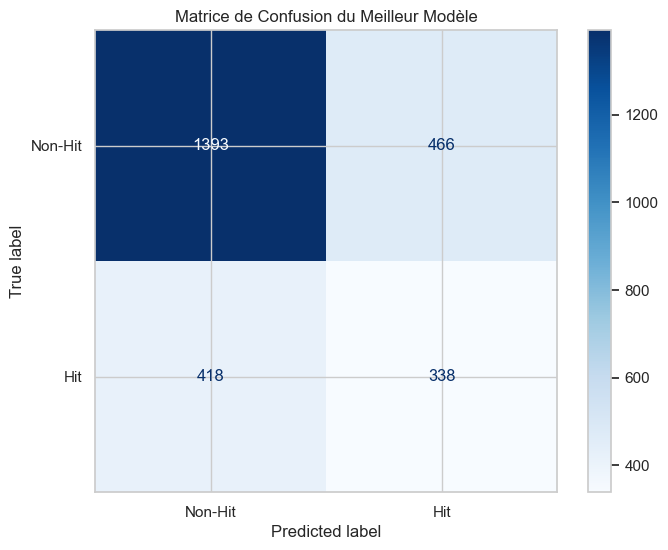

---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1859
           1       0.42      0.45      0.43       756

    accuracy                           0.66      2615
   macro avg       0.59      0.60      0.60      2615
weighted avg       0.67      0.66      0.66      2615



In [87]:
#  la Matrice de Confusion Visuelle
print("\n --- MATRICE DE CONFUSION ---")
cm = confusion_matrix(y_test,  y_pred_rand)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hit', 'Hit'])

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d') # values_format='d' pour des entiers (pas scientifique)
plt.title("Matrice de Confusion du Meilleur Modèle")
plt.show()

print("---------------------------")

print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_rand))

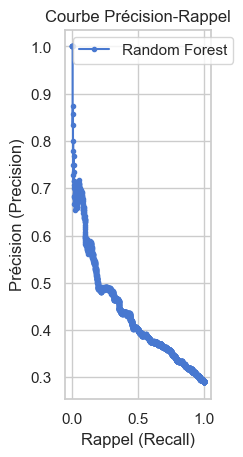

In [88]:
# ---  Courbe Précision-Rappel ---
plt.subplot(1, 3, 1)


y_scores =rand_clf.predict_proba(X_test_scl)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recalls, precisions, marker='.', label='Random Forest')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.grid(True)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Logistic regression
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Entraînement du classificateur sur le jeu d'entraînement normalisé
</p>

In [89]:
# La cible n'a pas eu besoin d'être normalisée (variable discrète binaire)
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train_scl, y_train)

LogisticRegression()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Modèle de prédiction appliqué au jeu de test/validation normalisé
</p>

In [90]:
y_pred_log_reg = log_reg_clf.predict(X_test_scl)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
      Calcul de la précision
</p>

In [91]:
print(accuracy_score(y_train, log_reg_clf.predict(X_train_scl)))

log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(log_reg_acc)

0.7120183573955445
0.7154875717017208


<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Analyse de la performance intrinsèque du modèle
</p>


 --- MATRICE DE CONFUSION ---


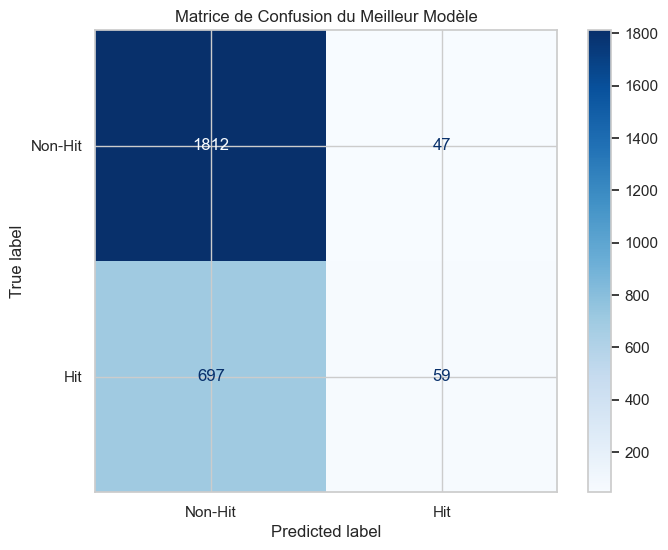

---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.72      0.97      0.83      1859
           1       0.56      0.08      0.14       756

    accuracy                           0.72      2615
   macro avg       0.64      0.53      0.48      2615
weighted avg       0.67      0.72      0.63      2615



In [92]:
#   Matrice de Confusion Visuelle
print("\n --- MATRICE DE CONFUSION ---")
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hit', 'Hit'])

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matrice de Confusion du Meilleur Modèle")
plt.show()

print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_log_reg))

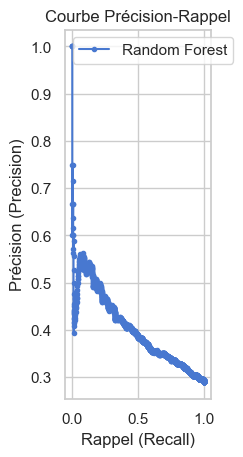

In [93]:
# ---  Courbe Précision-Rappel ---
plt.subplot(1, 3, 1)

y_scores =log_reg_clf.predict_proba(X_test_scl)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recalls, precisions, marker='.', label='Random Forest')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.grid(True)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    KNN
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Entraînement du classificateur sur le jeu d'entraînement normalisé
</p>

In [94]:
# Entraînement du classificateur sur le jeu d'entraînement normalisé
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scl, y_train)

KNeighborsClassifier()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Modèle de prédiction appliqué au jeu de test/validation normalisé
</p>

In [95]:
y_pred_knn = knn_clf.predict(X_test_scl)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
      Calcul de la précision
</p>

In [96]:
print(accuracy_score(y_train, knn_clf.predict(X_train_scl)))

knn_acc = accuracy_score(y_test, y_pred_knn)
print(knn_acc)

0.7679510469452147
0.6753346080305928


<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Analyse de la performance intrinsèque du modèle
</p>


 --- MATRICE DE CONFUSION ---


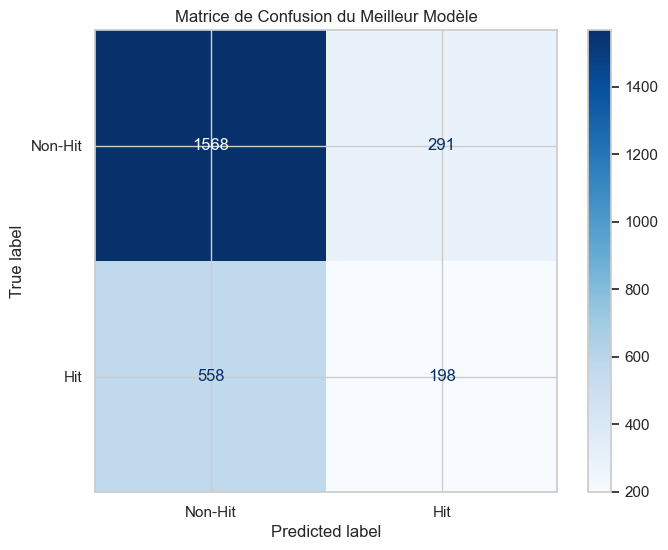

---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1859
           1       0.40      0.26      0.32       756

    accuracy                           0.68      2615
   macro avg       0.57      0.55      0.55      2615
weighted avg       0.64      0.68      0.65      2615



In [97]:
#  Matrice de Confusion Visuelle
print("\n --- MATRICE DE CONFUSION ---")
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hit', 'Hit'])

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matrice de Confusion du Meilleur Modèle")
plt.show()
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_knn))

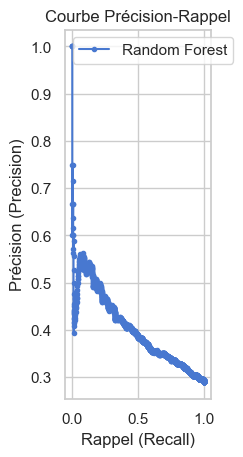

In [98]:
# ---  Courbe Précision-Rappel ---
plt.subplot(1, 3, 1)
# Pour la courbe, on a besoin des probabilités, pas juste des classes 0/1
y_scores =log_reg_clf.predict_proba(X_test_scl)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recalls, precisions, marker='.', label='Random Forest')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.grid(True)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkgreen; 
    padding: 5px; 
    border-radius: 20px;
    text-align: center;
">
    Arbre de decision
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Entraînement du classificateur sur le jeu d'entraînement normalisé
</p>

In [99]:
dtc_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 9, min_samples_split = 3, splitter = 'best')
dtc_clf.fit(X_train_scl, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=3)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Modèle de prédiction appliqué au jeu de test/validation normalisé
</p>

In [100]:
y_pred_dtc = dtc_clf.predict(X_test_scl)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
      Calcul de la précision
</p>

In [101]:
print(accuracy_score(y_train, dtc_clf.predict(X_train_scl)))

dtc_acc = accuracy_score(y_test, y_pred_dtc)
print(dtc_acc)

0.7186155464193518
0.7128107074569789


In [102]:
# Analyse de la performance intrinsèque du modèle
print("Matrice de confusion")
print(confusion_matrix(y_test, y_pred_dtc))
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_dtc))

Matrice de confusion
[[1763   96]
 [ 655  101]]
---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      1859
           1       0.51      0.13      0.21       756

    accuracy                           0.71      2615
   macro avg       0.62      0.54      0.52      2615
weighted avg       0.67      0.71      0.65      2615



<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkorange; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    Etape: Evaluation
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Ordonner les modeles
</p>

In [103]:
models = pd.DataFrame({'Model': ['Logistic Regression', 
                                 'KNN', 
                                 'Random Forest Classifier',]
                       ,'Score': [log_reg_acc,knn_acc , ran_acc ]})

models.sort_values(by = 'Score', ascending = False)

Model     Score
0       Logistic Regression  0.715488
1                       KNN  0.675335
2  Random Forest Classifier  0.661950

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkcyan; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Conclusion: Random forest meme s'il a un score plus bas que les autres, son recall est meilleure, ce qui le rend utilisable. On va le choisir pour le fine tunning et l'interpretation des features
</p>

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Finetunning du RDC
</p>

In [104]:
#  creation du score precis
f1_scorer_hit = make_scorer(f1_score, pos_label=1)

# parametres du grisearch
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 15, 25],
    'min_samples_split': [5, 15, 30],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': ['balanced', None]
}

# configuration de la recherche
grid_search = GridSearchCV(
    estimator=rand_clf,
    param_grid=param_grid,
    cv=3,                
    scoring=f1_scorer_hit,
    n_jobs=-1,            
    verbose=2
)

#  Lancer la recherche 
print("Recherche des meilleurs paramètres en cours...")
grid_search.fit(X_train_scl, y_train)

print("\n Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

print(f"\n Meilleur score F1 obtenu : {grid_search.best_score_:.4f}")

Recherche des meilleurs paramètres en cours...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

 Meilleurs paramètres trouvés :
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 100}

 Meilleur score F1 obtenu : 0.4515


<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Utilisation du RDC avec les hyperparametres optimaux
</p>

 Paramètres du meilleur modèle :
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 100}

 Prédiction en cours sur le jeu de test...

 --- RAPPORT DE PERFORMANCE ---
              precision    recall  f1-score   support

 Non-Hit (0)       0.77      0.72      0.74      1859
     Hit (1)       0.41      0.49      0.44       756

    accuracy                           0.65      2615
   macro avg       0.59      0.60      0.59      2615
weighted avg       0.67      0.65      0.66      2615


 --- MATRICE DE CONFUSION ---


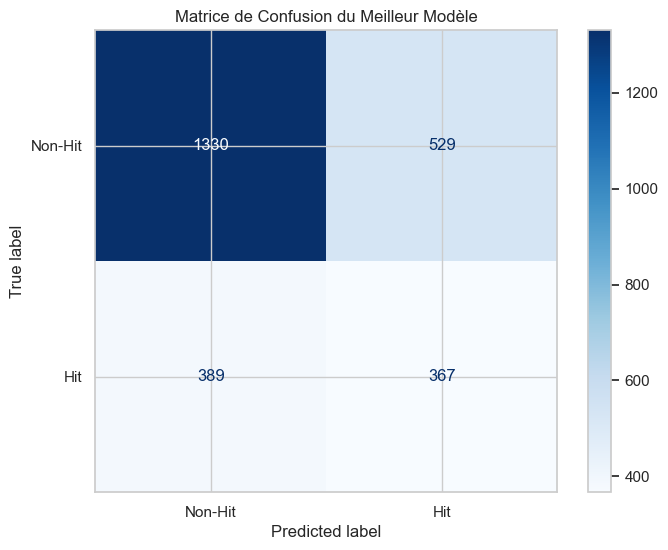

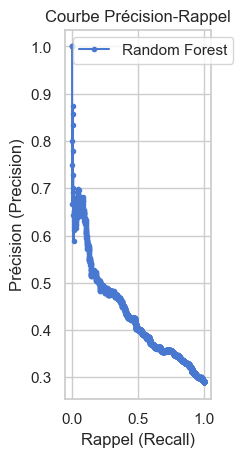

In [105]:
#  Récupérer le meilleur modèle trouvé
best_model = grid_search.best_estimator_

print(' Paramètres du meilleur modèle :')
print(grid_search.best_params_)

#  Faire les prédictions sur le jeu de test
print("\n Prédiction en cours sur le jeu de test...")
y_pred = best_model.predict(X_test_scl)

# afficher le rapport de classification 
print("\n --- RAPPORT DE PERFORMANCE ---")
print(classification_report(y_test, y_pred, target_names=['Non-Hit (0)', 'Hit (1)']))

# Afficher la Matrice de Confusion Visuelle
print("\n --- MATRICE DE CONFUSION ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hit', 'Hit'])

# Création du graphique
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matrice de Confusion du Meilleur Modèle")
plt.show()

# Courbe Précision-Rappel
plt.subplot(1, 3, 1)

y_scores =best_model.predict_proba(X_test_scl)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recalls, precisions, marker='.', label='Random Forest')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.grid(True)

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Diagramme des importances
</p>

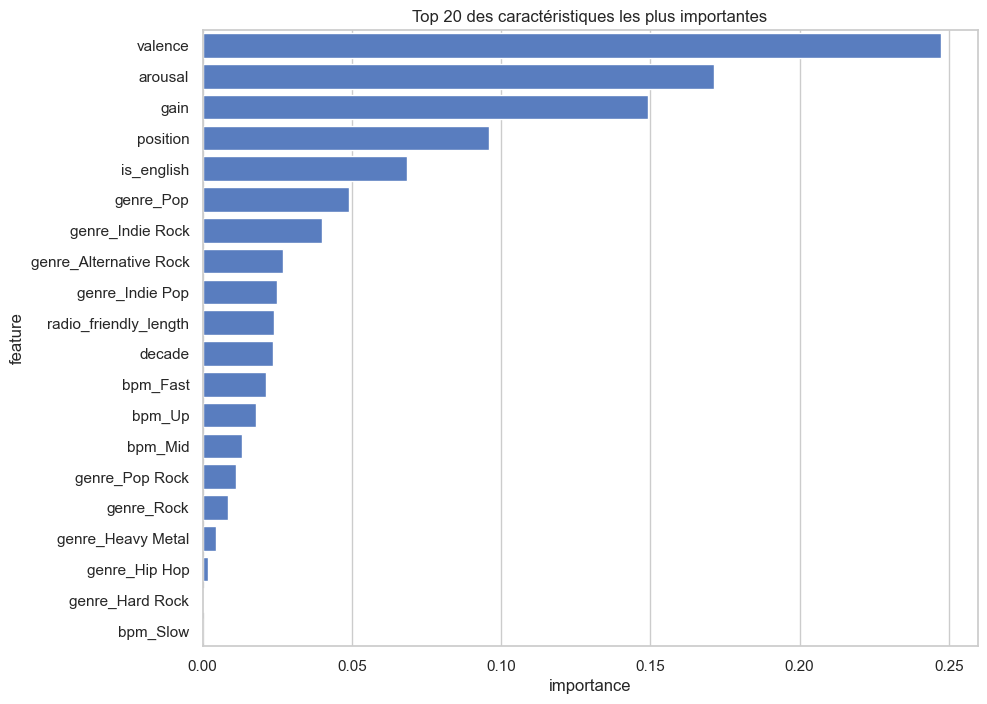

In [106]:
importances = best_model.feature_importances_
features = X.columns

songs_importances = pd.DataFrame({"feature": features, "importance": importances})
songs_importances = songs_importances.sort_values("importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x="importance", y="feature", data=songs_importances.head(20))
plt.title("Top 20 des caractéristiques les plus importantes")
plt.savefig(
    'nom_du_fichier.png',      # Nom du fichier
    dpi=300,                   # Résolution (300 est top pour un rapport PDF/Word)
    bbox_inches='tight',       # Coupe les marges blanches inutiles autour
    transparent=False          # Mettre True si vous voulez un fond transparent (pour des slides)
)
plt.show()

<p style="
    font-family: 'Arial'; 
    font-size: 20px; 
    color: white; 
    background-color: darkred; 
    padding: 1px; 
    border-radius: 10px;
    text-align: left;
">
     Comment la valeur d’une variable change la probabilité de hit ?
</p>

In [107]:
import warnings
warnings.filterwarnings("ignore", message="X has feature names")

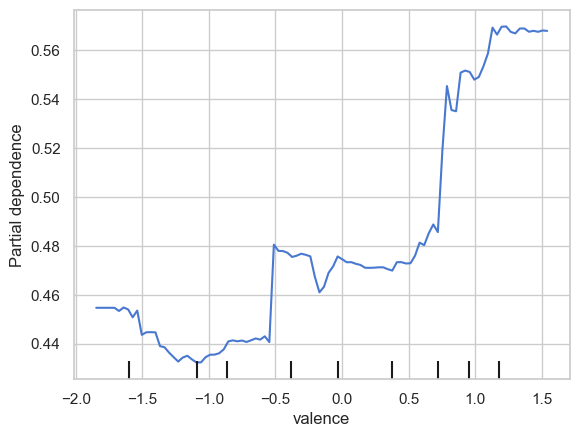

In [108]:
features_to_plot = ["valence"]

PartialDependenceDisplay.from_estimator(best_model, X, features_to_plot, kind='average')
plt.show()

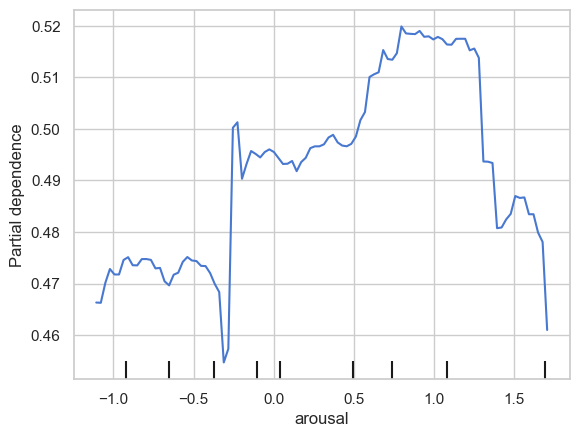

In [109]:
features_to_plot = ["arousal"]
PartialDependenceDisplay.from_estimator(best_model, X, features_to_plot, kind='average')
plt.show()

<p style="
    font-family: 'Arial'; 
    font-size: 25px; 
    color: white; 
    background-color: darkblue; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    2eme question: Les goûts du public suivent-ils des cycles ? La pop actuelle n'est-elle qu'un retour des tendances passées ?

</p>

In [110]:



# Charger les datasets
artists = pd.read_csv("wasabi_artists.csv", sep=",")
albums = pd.read_csv("wasabi_albums.csv", sep=",")
songs = pd.read_csv("wasabi_songs.csv", sep="\t")
hot = pd.read_csv("Hot_100.csv", sep=",")
# Vérifier les premières lignes
print(artists.head())
print(albums.head())
print(songs.head())
print(hot.head())

C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\3448619802.py:2: DtypeWarning: Columns (3,41) have mixed types. Specify dtype option on import or set low_memory=False.
  artists = pd.read_csv("wasabi_artists.csv", sep=",")
C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\3448619802.py:3: DtypeWarning: Columns (5,27) have mixed types. Specify dtype option on import or set low_memory=False.
  albums = pd.read_csv("wasabi_albums.csv", sep=",")
C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\3448619802.py:4: DtypeWarning: Columns (15,17,20,41,42,43,44,50,67,74) have mixed types. Specify dtype option on import or set low_memory=False.
  songs = pd.read_csv("wasabi_songs.csv", sep="\t")


                                  _id disambiguation  \
0  ObjectId(56d7e91b6b60c09814f93e4a)   British band   
1  ObjectId(56d7e91c6b60c09814f93e4c)  Japanese Band   
2  ObjectId(56d7e91d6b60c09814f93e4e)            NaN   
3  ObjectId(56d7e91e6b60c09814f93e50)            NaN   
4  ObjectId(56d7e91e6b60c09814f93e52)            NaN   

                                   endArea endArea.disambiguation endArea.id  \
0  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
1  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
2  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
3  {"id":"","name":"","disambiguation":""}                    NaN        NaN   
4  {"id":"","name":"","disambiguation":""}                    NaN        NaN   

  endArea.name gender                   genres  \
0          NaN    NaN                       []   
1          NaN    NaN  ["J-Rock","Visual Kei"]   
2          NaN    NaN           

In [111]:
print("Artists shape:", artists.shape)
print("Albums shape:", albums.shape)
print("Songs shape:", songs.shape)
print("Hot 100 shape:\n", hot.shape)

print("Artists:\n", artists.columns)
print("Albums:\n", albums.columns)
print("Songs:\n", songs.columns)
print("Hot 100:\n", hot.columns)





Artists shape: (77492, 109)
Albums shape: (208743, 34)
Songs shape: (2099554, 78)
Hot 100 shape:
 (335195, 13)
Artists:
 Index(['_id', 'disambiguation', 'endArea', 'endArea.disambiguation',
       'endArea.id', 'endArea.name', 'gender', 'genres',
       'id_artist_musicbrainz', 'labels',
       ...
       'members.XX.urlYouTube', 'members.XX.urlBBC',
       'members.XX.urlSecondHandSongs', 'urlInstagram',
       'members.XX.urlSoundCloud', 'members.XX.urlInstagram', 'urlGooglePlus',
       'members.XX.urlPureVolume', 'members.XX.urlGooglePlus',
       'animux_path_ambiguous'],
      dtype='object', length=109)
Albums:
 Index(['_id', 'genre', 'id_artist', 'length', 'name', 'publicationDate', 'rdf',
       'title', 'urlAlbum', 'urlAllmusic', 'urlAmazon', 'urlDiscogs',
       'urlITunes', 'urlMusicBrainz', 'urlSpotify', 'urlWikipedia',
       'id_album_deezer', 'urlDeezer', 'cover', 'cover.big', 'cover.medium',
       'cover.small', 'cover.standard', 'cover.xl', 'deezerFans',
       'expl

In [112]:
print("Missing values in songs:")
print(songs.isnull().sum().sort_values(ascending=False).head(60))


Missing values in songs:
urlItunes                  2099554
newPreview                 2099552
notes                      2099551
urlYouTubeExist            2099454
urlLastFm                  2098307
multitrack_path            2096812
multitrack_file            2096505
urlHypeMachine             2091339
urlPandora                 2091339
arousal                    2083038
langdetect_robust          2083038
valence                    2083038
origin                     2083038
begin                      2080510
end                        2080480
disambiguation             2079969
animux_content             2077752
animux_path                2077752
animux_contents            2075238
urlGoEar                   2049628
abstract                   2026868
producer                   2026010
genre                      2026010
format                     2026010
runtime                    2026010
subject                    2026010
recorded                   2026010
releaseDate                202

In [113]:
print("Missing values in albums:")
print(albums.isnull().sum().sort_values(ascending=False).head(60))


Missing values in albums:
disambiguation          207826
explicitLyrics          195337
barcode                 179239
rdf                     159009
urlWikipedia            158668
country                 155009
language                152127
urlAmazon               148831
length                  137473
urlSpotify              130783
urlITunes               130122
urlAllmusic             129564
id_album_discogs        122832
urlDiscogs              122832
genre                   122553
dateRelease             117597
id_album_musicbrainz    113262
urlMusicBrainz          112758
publicationDate          66991
upc                      53346
cover.big                53337
cover.medium             53337
cover.standard           53337
cover.xl                 53337
cover.small              53337
deezerFans               53333
cover                    53333
urlDeezer                48341
id_album_deezer          48341
title                        4
_id                          0
name         

In [114]:
print("Missing values in artists:")
print(artists.isnull().sum().sort_values(ascending=False).head(60))

Missing values in artists:
members.XX.id_member_musicbrainz                    77492
members.XX.instruments                              77492
members.XX.name                                     77492
members.XX.equipments.XX.items.XX.img               77492
members.XX.urlPureVolume                            77492
members.XX.urlSecondHandSongs                       77492
members.XX.urlBBC                                   77492
members.XX.urlYouTube                               77492
members.XX.equipments.XX.type                       77492
members.XX.equipments.XX.items.XX.urlDescription    77492
members.XX.urlInstagram                             77492
members.XX.urlSoundCloud                            77492
members.XX.urlGooglePlus                            77492
members.XX.urlWikipedia                             77492
members.XX.urlAllmusic                              77492
members.XX.equipments                               77492
members.XX.urlOfficialWebsite                

In [115]:
print("Albums columns:", albums.columns.tolist())
print("Songs columns:", songs.columns.tolist())
print("Hot columns:", hot.columns.tolist())

Albums columns: ['_id', 'genre', 'id_artist', 'length', 'name', 'publicationDate', 'rdf', 'title', 'urlAlbum', 'urlAllmusic', 'urlAmazon', 'urlDiscogs', 'urlITunes', 'urlMusicBrainz', 'urlSpotify', 'urlWikipedia', 'id_album_deezer', 'urlDeezer', 'cover', 'cover.big', 'cover.medium', 'cover.small', 'cover.standard', 'cover.xl', 'deezerFans', 'explicitLyrics', 'upc', 'barcode', 'country', 'dateRelease', 'disambiguation', 'id_album_musicbrainz', 'language', 'id_album_discogs']
Songs columns: ['Unnamed: 0', '_id', 'abstract', 'albumTitle', 'album_genre', 'animux_content', 'animux_contents', 'animux_path', 'animux_paths', 'arousal', 'arousal_predicted', 'artist', 'artist_lower', 'availableCountries', 'award', 'begin', 'bpm', 'chords_metadata', 'deezer_mapping', 'disambiguation', 'end', 'explicit_content_lyrics', 'explicit_content_lyrics_predicted', 'format', 'gain', 'genre', 'has_emotion_tags', 'has_social_tags', 'id_album', 'id_album_deezer', 'id_artist_deezer', 'id_song_deezer', 'id_song_

In [116]:
print(hot.describe())
print(hot.info())

       chart_position       instance  time_on_chart  consecutive_weeks  \
count   335195.000000  335195.000000  335195.000000      302067.000000   
mean        50.499324       1.078653       9.213708           8.802918   
std         28.865715       0.373157       7.723447           7.381660   
min          1.000000       1.000000       1.000000           1.000000   
25%         25.500000       1.000000       4.000000           3.000000   
50%         50.000000       1.000000       7.000000           7.000000   
75%         75.000000       1.000000      13.000000          12.000000   
max        100.000000      15.000000      91.000000          89.000000   

       previous_week  peak_position  worst_position  
count  302067.000000  335195.000000   335195.000000  
mean       47.568725      40.861460       80.717776  
std        28.049545      29.345153       18.120725  
min         1.000000       1.000000        1.000000  
25%        23.000000      13.000000       74.000000  
50%      

Top 30 colonnes avec le plus de valeurs manquantes (%):
urlItunes            100.00
newPreview           100.00
notes                100.00
urlYouTubeExist      100.00
urlLastFm             99.94
multitrack_path       99.87
multitrack_file       99.85
urlHypeMachine        99.61
urlPandora            99.61
arousal               99.21
langdetect_robust     99.21
valence               99.21
origin                99.21
begin                 99.09
end                   99.09
disambiguation        99.07
animux_content        98.96
animux_path           98.96
animux_contents       98.84
urlGoEar              97.62
abstract              96.54
producer              96.50
genre                 96.50
format                96.50
runtime               96.50
subject               96.50
recorded              96.50
releaseDate           96.50
recordLabel           96.50
writer                96.50
dtype: float64
id_album_deezer                      33.43
id_artist_deezer                     33.43
url

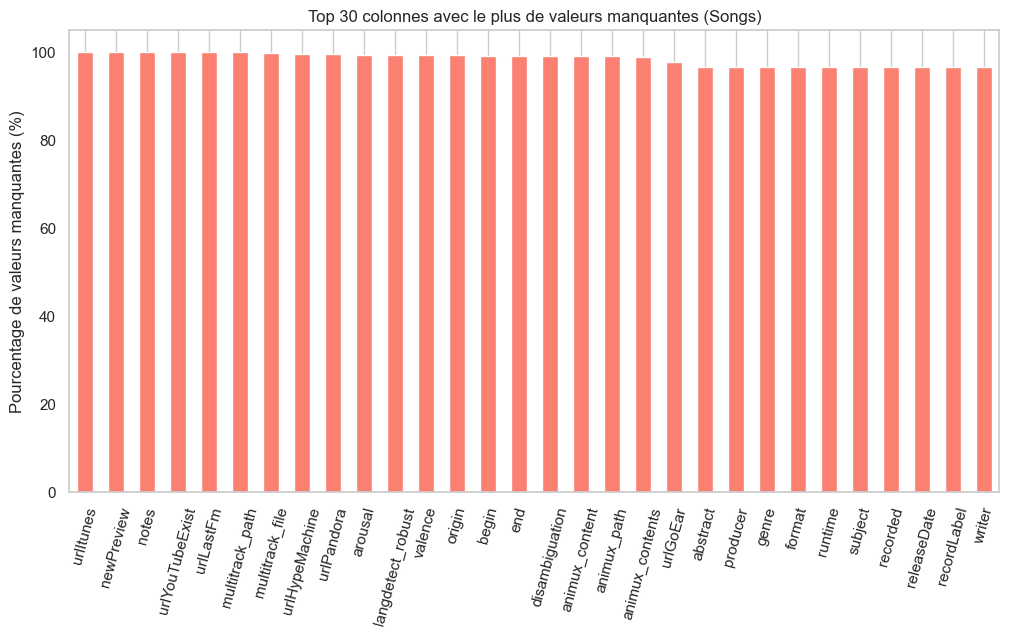

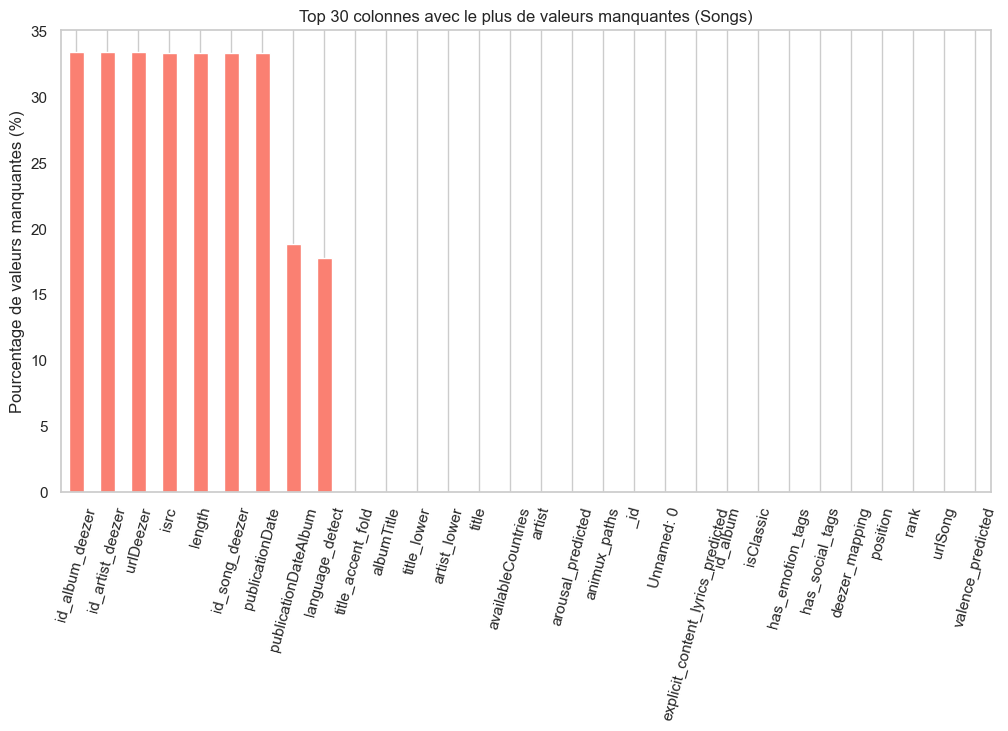

In [117]:
# Étude des colonnes très vides (Songs)

# Calcul du pourcentage de valeurs manquantes
missing_percent = songs.isnull().mean() * 100

# Tri décroissant pour voir les colonnes les plus vides
missing_sorted = missing_percent.sort_values(ascending=False)


print("Top 30 colonnes avec le plus de valeurs manquantes (%):")
print(missing_sorted.head(30).round(2))
print(missing_sorted.tail(30).round(2))

# Visualisation graphique
plt.figure(figsize=(12,6))
missing_sorted.head(30).plot(kind='bar', color='salmon')
plt.title("Top 30 colonnes avec le plus de valeurs manquantes (Songs)")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()



# Visualisation graphique
plt.figure(figsize=(12,6))
missing_sorted.tail(30).plot(kind='bar', color='salmon')
plt.title("Top 30 colonnes avec le plus de valeurs manquantes (Songs)")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()


In [118]:
print(songs.isnull().mean().sort_values(ascending=False).head(20))
print(hot.isnull().mean().sort_values(ascending=False))

print(hot['chart_date'].min(), hot['chart_date'].max())
print(hot['chart_position'].describe())


urlItunes            1.000000
newPreview           0.999999
notes                0.999999
urlYouTubeExist      0.999952
urlLastFm            0.999406
multitrack_path      0.998694
multitrack_file      0.998548
urlHypeMachine       0.996087
urlPandora           0.996087
arousal              0.992134
langdetect_robust    0.992134
valence              0.992134
origin               0.992134
begin                0.990930
end                  0.990915
disambiguation       0.990672
animux_content       0.989616
animux_path          0.989616
animux_contents      0.988418
urlGoEar             0.976221
dtype: float64
previous_week        0.098832
consecutive_weeks    0.098832
song                 0.000000
chart_date           0.000000
chart_position       0.000000
song_id              0.000000
performer            0.000000
time_on_chart        0.000000
instance             0.000000
peak_position        0.000000
worst_position       0.000000
chart_debut          0.000000
chart_url            0.00

In [119]:
##### Sélection des colonnes pertinentes

In [120]:
# --- Préparation des données ---

# Imputation minimale pour Songs
num_cols = ['bpm','length','arousal_predicted','valence_predicted']
for col in num_cols:
    if col in songs.columns:
        songs[col] = pd.to_numeric(songs[col], errors='coerce')
        songs[col] = songs[col].fillna(songs[col].median())

cat_cols = ['genre','album_genre','language']
for col in cat_cols:
    if col in songs.columns:
        songs[col] = songs[col].fillna("Unknown")

# Albums : garder publicationDate en texte pour extraction éventuelle
if 'publicationDate' in albums.columns:
    albums['publicationDate'] = albums['publicationDate'].astype(str).str.strip()
for col in ['genre','language']:
    if col in albums.columns:
        albums[col] = albums[col].fillna("Unknown")

# Artists
if 'genres' in artists.columns:
    artists['genres'] = artists['genres'].fillna("Unknown")

# Hot 100 : conversion des dates et création year/decade
hot['chart_date'] = pd.to_datetime(hot['chart_date'], errors='coerce')
hot['year'] = hot['chart_date'].dt.year.astype('Int64')
hot['decade'] = (hot['year'] // 10) * 10

# Normalisation des clés texte pour fusion
songs['title_clean'] = songs['title_lower'].fillna(songs['title']).astype(str).str.lower().str.strip()
songs['artist_clean'] = songs['artist'].astype(str).str.lower().str.strip()
hot['song_clean'] = hot['song'].astype(str).str.lower().str.strip()
hot['performer_clean'] = hot['performer'].astype(str).str.lower().str.strip()


In [121]:
# 1. Nettoyage des colonnes de Hot 100
hot['chart_date'] = pd.to_datetime(hot['chart_date'], errors='coerce')
hot['year'] = hot['chart_date'].dt.year.astype('Int64')
hot['decade'] = (hot['year'] // 10) * 10
# Vérification
print(hot[['chart_date','year','decade']].head(20))

   chart_date  year  decade
0  1990-05-05  1990    1990
1  1990-05-12  1990    1990
2  1990-05-19  1990    1990
3  1990-05-26  1990    1990
4  1990-06-02  1990    1990
5  1990-06-09  1990    1990
6  1990-06-16  1990    1990
7  1990-06-23  1990    1990
8  1990-06-30  1990    1990
9  1990-07-07  1990    1990
10 1990-07-14  1990    1990
11 1990-07-21  1990    1990
12 1990-07-28  1990    1990
13 1990-08-04  1990    1990
14 1990-08-11  1990    1990
15 1973-03-17  1973    1970
16 1973-03-24  1973    1970
17 1973-03-31  1973    1970
18 1973-04-07  1973    1970
19 1973-04-14  1973    1970


In [122]:
## Étape: ## Data Preparation

#Nettoyage des colonnes audio, création des variables temporelles (year, decade), fusion Songs ↔ Hot100.


#######   On réduit chaque dataset aux colonnes minimales nécessaires


In [123]:
# Fusion Hot 100 ↔ Wasabi (titre + artiste)
merged = songs.merge(
    hot[['song_clean','performer_clean','chart_date','chart_position','year','decade']],
    left_on=['title_clean','artist_clean'],
    right_on=['song_clean','performer_clean'],
    how='inner',
    suffixes=('_song','_hot')
)

# Vérification
print("Merged shape:", merged.shape)
print(merged[['title','artist','chart_date','chart_position']].head(5))


Merged shape: (439997, 86)
          title          artist chart_date  chart_position
0  Have I Never  A Few Good Men 1996-03-23              88
1  Have I Never  A Few Good Men 1996-03-30              77
2  Have I Never  A Few Good Men 1996-04-06              77
3  Have I Never  A Few Good Men 1996-04-13              77
4  Have I Never  A Few Good Men 1996-04-20              76


In [124]:
#EDA
#Analyse des tendances temporelles et des distributions des caractéristiques audio

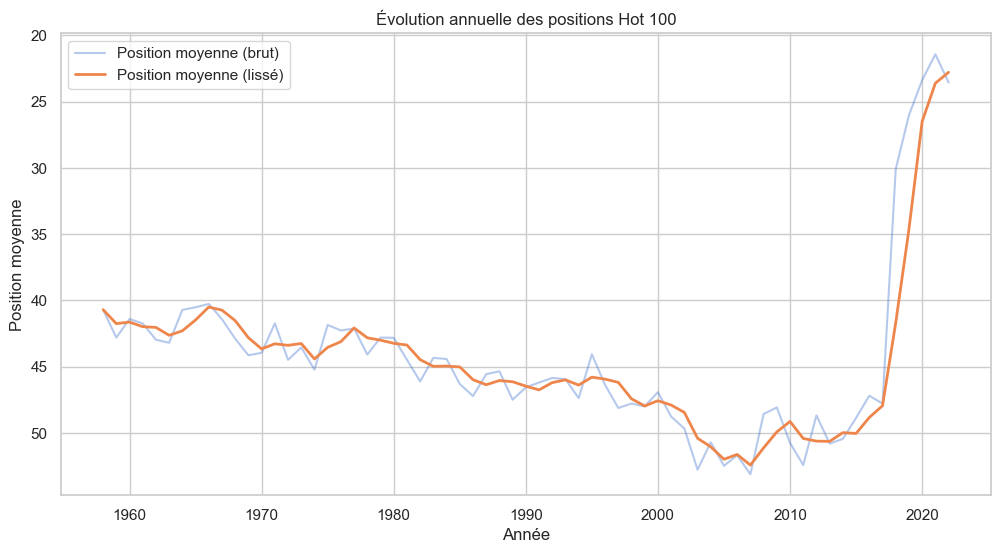

In [125]:
# Agrégations par année et décennie
yearly = merged.groupby('year')[['chart_position','bpm','valence_predicted','length']].mean().sort_index()
decade = merged.groupby('decade')[['chart_position','bpm','valence_predicted','length']].mean().sort_index()

# Lissage mobile (fenêtre 3 ans)
yearly_smooth = yearly.rolling(window=3, min_periods=1).mean()

# Visualisation annuelle
plt.figure(figsize=(12,6))
plt.plot(yearly.index, yearly['chart_position'], label="Position moyenne (brut)", alpha=0.4)
plt.plot(yearly_smooth.index, yearly_smooth['chart_position'], label="Position moyenne (lissé)", linewidth=2)
plt.gca().invert_yaxis()  # plus lisible: meilleure position vers le haut
plt.title("Évolution annuelle des positions Hot 100")
plt.xlabel("Année")
plt.ylabel("Position moyenne")
plt.legend()
plt.grid(True)
plt.show()




In [126]:
# Ce graphique ne montre pas un cycle mais plutôt une évolution structurelle du classement
#  avec une baisse de performance moyenne dans les années récentes

In [127]:
# Comparaison explicite entre les années 1980 et 2020
decades_focus = merged[merged['decade'].isin([1980, 2020])]
comparison = decades_focus.groupby('decade')[['bpm','valence_predicted','length']].mean().round(2)
print("Comparaison des moyennes audio entre 1980s et 2020s :")
print(comparison)


Comparaison des moyennes audio entre 1980s et 2020s :
           bpm  valence_predicted  length
decade                                   
1980    125.96              -0.11  255.12
2020    124.84               0.23  213.57


In [128]:
### Comparaison 1980s vs 2020s

#- BPM : stable
#- Valence prédite : plus élevée en 2020s → retour vers des tonalités positives
#- Durée : plus courte en 2020s → évolution structurelle liée au streaming

In [129]:
val_80s = merged[merged['decade']==1980]['valence_predicted'].dropna()
val_20s = merged[merged['decade']==2020]['valence_predicted'].dropna()

t_stat, p_val = ttest_ind(val_80s, val_20s, equal_var=False)
print(f"T-test valence 1980s vs 2020s: t={t_stat:.2f}, p={p_val:.4f}")

T-test valence 1980s vs 2020s: t=-17.94, p=0.0000


In [130]:
# Le test statistique confirme que la différence de valence entre 1980s et 2020s est significative (p < 0.001).


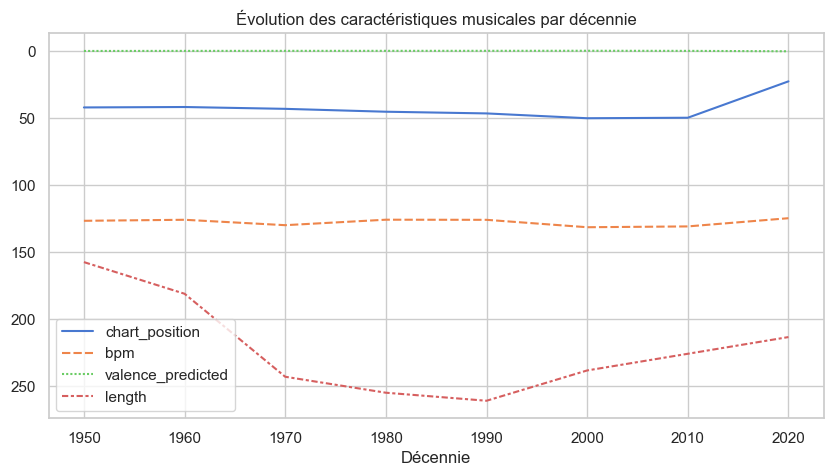


--- Interprétation automatique ---
BPM:
  ➜ Plus élevé en 2000 (131.58)
  ➜ Plus faible en 2020 (124.84)

VALENCE_PREDICTED:
  ➜ Plus élevé en 2020 (0.23)
  ➜ Plus faible en 2000 (-0.16)

LENGTH:
  ➜ Plus élevé en 1990 (261.11)
  ➜ Plus faible en 1950 (157.62)



In [131]:
# Visualisation par décennie
plt.figure(figsize=(10,5))
sns.lineplot(data=decade[['chart_position','bpm','valence_predicted','length']])
plt.gca().invert_yaxis()
plt.title("Évolution des caractéristiques musicales par décennie")
plt.xlabel("Décennie")
plt.grid(True)
plt.show()


interpretations = {}
for col in ['bpm','valence_predicted','length']:
    # Décennie avec valeur max et min
    max_decade = decade[col].idxmax()
    min_decade = decade[col].idxmin()
    max_val = decade[col].max().round(2)
    min_val = decade[col].min().round(2)
    interpretations[col] = {
        "max_decade": max_decade,
        "max_val": max_val,
        "min_decade": min_decade,
        "min_val": min_val
    }

print("\n--- Interprétation automatique ---")
for feature, info in interpretations.items():
    print(f"{feature.upper()}:")
    print(f"  ➜ Plus élevé en {info['max_decade']} ({info['max_val']})")
    print(f"  ➜ Plus faible en {info['min_decade']} ({info['min_val']})\n")

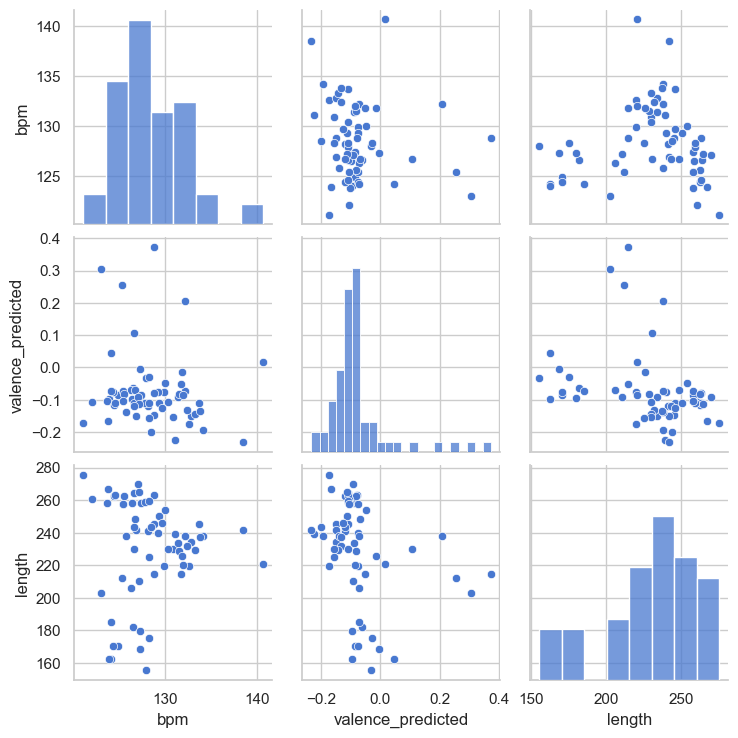

In [132]:
sns.pairplot(yearly[['bpm','valence_predicted','length']])
plt.show()


In [133]:
# Exploration des données : Séries temporelles 

In [134]:
# Agrégations par date
ts = merged.groupby('chart_date').agg(
    bpm_mean=('bpm','mean'),
    valence_mean=('valence_predicted','mean'),
    arousal_mean=('arousal_predicted','mean'),
    length_mean=('length','mean')
)

monthly = ts.resample('M').mean()
yearly = ts.resample('Y').mean()

C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\475883839.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts.resample('M').mean()
C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\475883839.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = ts.resample('Y').mean()


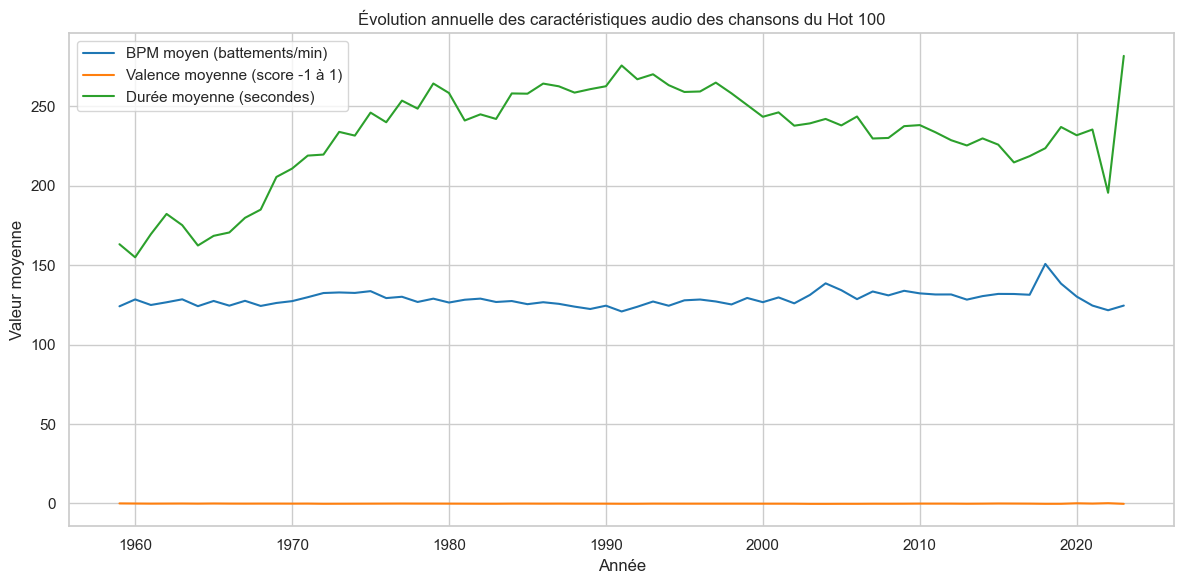

In [135]:

# Courbes annuelles
plt.figure(figsize=(12,6))
plt.plot(yearly.index, yearly['bpm_mean'], label="BPM moyen (battements/min)", color='tab:blue')
plt.plot(yearly.index, yearly['valence_mean'], label="Valence moyenne (score -1 à 1)", color='tab:orange')
plt.plot(yearly.index, yearly['length_mean'], label="Durée moyenne (secondes)", color='tab:green')
plt.title("Évolution annuelle des caractéristiques audio des chansons du Hot 100")
plt.xlabel("Année")
plt.ylabel("Valeur moyenne")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




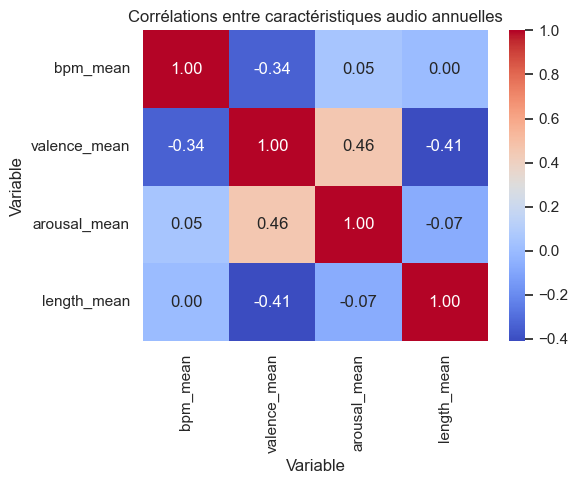

In [136]:
# Heatmap des corrélations annuelles
corr = yearly[['bpm_mean','valence_mean','arousal_mean','length_mean']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre caractéristiques audio annuelles")
plt.xlabel("Variable")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [137]:
# Statistiques par décennie
decade_stats = merged.groupby('decade').agg(
    bpm_mean=('bpm','mean'),
    valence_mean=('valence','mean'),
    length_mean=('length','mean')
).sort_index()
print(decade_stats)

          bpm_mean  valence_mean  length_mean
decade                                       
1950    126.781427      0.153739   157.617574
1960    126.012330      0.499373   181.239843
1970    130.047162      0.531738   243.200528
1980    125.959692      0.489884   255.117342
1990    126.049702      0.235319   261.112318
2000    131.581131      0.084991   238.490028
2010    130.971063      0.202602   226.044218
2020    124.839767      1.017694   213.572635


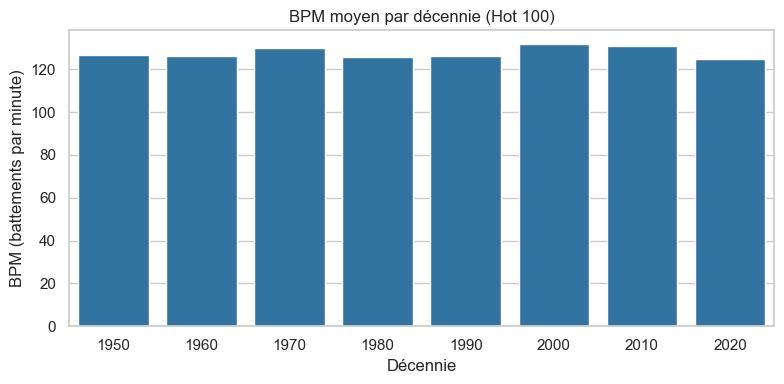

In [138]:
# Barplot BPM par décennie
plt.figure(figsize=(8,4))
sns.barplot(x=decade_stats.index.astype(str), y=decade_stats['bpm_mean'], color='tab:blue')
plt.title("BPM moyen par décennie (Hot 100)")
plt.xlabel("Décennie")
plt.ylabel("BPM (battements par minute)")
plt.tight_layout()
plt.show()

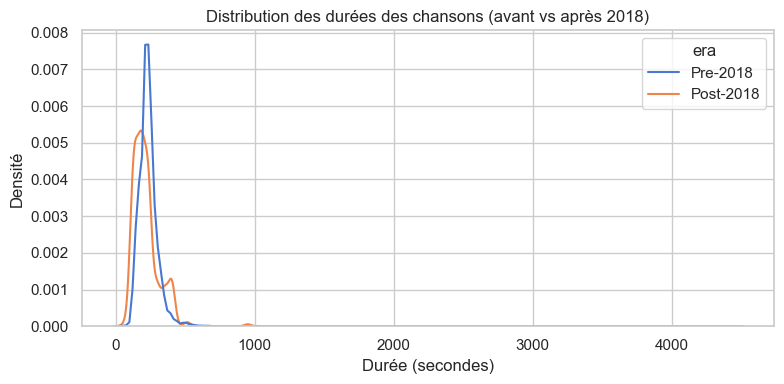

In [139]:
# Distribution des durées Pre vs Post-2018
merged['era'] = np.where(merged['year']>=2018, 'Post-2018', 'Pre-2018')
plt.figure(figsize=(8,4))
sns.kdeplot(data=merged, x='length', hue='era', common_norm=False)
plt.title("Distribution des durées des chansons (avant vs après 2018)")
plt.xlabel("Durée (secondes)")
plt.ylabel("Densité")
plt.tight_layout()
plt.show()

In [140]:
## Modélisation – Clustering audio

# Segmentation des chansons en profils audio distincts pour analyser leur répartition par décennie.


In [141]:
feats = ['bpm','length','valence','arousal_predicted']
data = merged[feats].dropna().copy()

scaler = StandardScaler()
Z = scaler.fit_transform(data)

# Choix du nombre de clusters avec silhouette
ks = range(2,9)
sil = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(Z)
    sil.append(silhouette_score(Z, labels))

best_k = ks[int(np.argmax(sil))]
print("Meilleur k (silhouette):", best_k)

Meilleur k (silhouette): 2


In [142]:
# Clustering final
km = KMeans(n_clusters=best_k, random_state=42).fit(Z)
labels = km.labels_

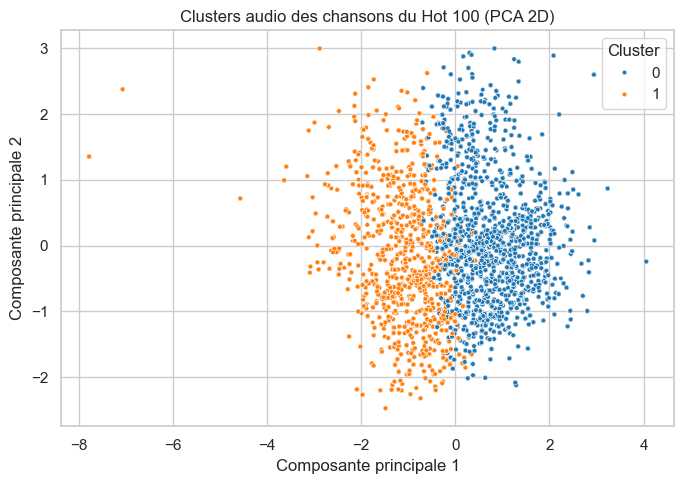

In [143]:
# PCA pour visualisation
P = PCA(n_components=2, random_state=42).fit_transform(Z)
plt.figure(figsize=(7,5))
sns.scatterplot(x=P[:,0], y=P[:,1], hue=labels, palette='tab10', s=10)
plt.title("Clusters audio des chansons du Hot 100 (PCA 2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [144]:
# Ajouter les clusters au DataFrame
merged.loc[data.index, 'cluster'] = labels

# Profil moyen par cluster
cluster_prof = merged.loc[data.index].groupby('cluster').agg(
    bpm_mean=('bpm','mean'),
    valence_mean=('valence','mean'),
    arousal_mean=('arousal_predicted','mean'),
    length_mean=('length','mean'),
    count=('cluster','size')
)
print(cluster_prof)

           bpm_mean  valence_mean  arousal_mean  length_mean  count
cluster                                                            
0.0      126.689704      0.937884      0.080826   228.118779  19532
1.0      133.747653     -0.679585     -0.148878   262.523452  13304


C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\1093502523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_prof.index, y=cluster_prof['count'], palette='tab10')


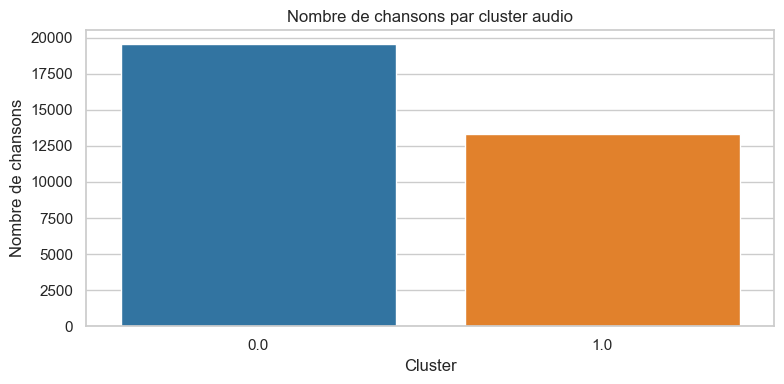

In [145]:
# Taille des clusters
plt.figure(figsize=(8,4))
sns.barplot(x=cluster_prof.index, y=cluster_prof['count'], palette='tab10')
plt.title("Nombre de chansons par cluster audio")
plt.xlabel("Cluster")
plt.ylabel("Nombre de chansons")
plt.tight_layout()
plt.show()

In [146]:

# Répartition des clusters par décennie
cluster_decade = merged.loc[data.index].groupby(['cluster','decade']).size().unstack(fill_value=0)
cluster_decade_ratio = cluster_decade.div(cluster_decade.sum(axis=1), axis=0)


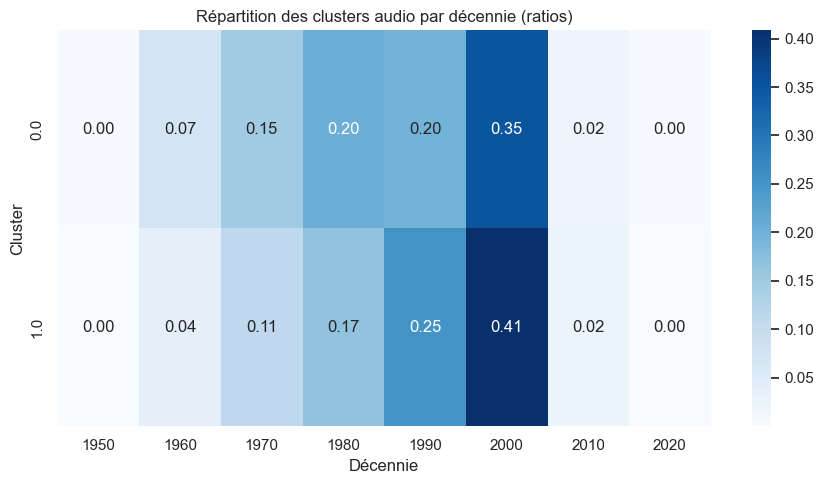

In [147]:

plt.figure(figsize=(9,5))
sns.heatmap(cluster_decade_ratio, annot=True, cmap='Blues', fmt=".2f")
plt.title("Répartition des clusters audio par décennie (ratios)")
plt.xlabel("Décennie")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

Cycle partiel : la valence et le profil rapide + joyeux des années 1980 semblent revenir dans les années 2020

Pas un cycle complet : le BPM reste stable, la durée change pour des raisons structurelles (TikTok).

Conclusion  : il y a des signaux de retour stylistique mais pas un cycle strict et régulier

In [148]:
print(merged['valence'].head(10))  # affiche les 10 premières
print(merged['valence_predicted'].describe())
print(merged['valence_predicted'].head(10))


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: valence, dtype: float64
count    439997.000000
mean         -0.105642
std           0.423416
min          -1.219726
25%          -0.423564
50%          -0.141217
75%           0.197035
max           1.243829
Name: valence_predicted, dtype: float64
0   -0.456299
1   -0.456299
2   -0.456299
3   -0.456299
4   -0.456299
5   -0.456299
6   -0.456299
7   -0.456299
8   -0.456299
9   -0.456299
Name: valence_predicted, dtype: float64


In [149]:
## Conclusion – Cycles des goûts musicaux

##L’analyse montre que :
## - Le BPM est resté relativement stable.
## - La valence prédite est plus élevée en 2020s qu’en 1980s, suggérant un retour vers des émotions positives.
## - La durée des chansons a fortement diminué après 2018, reflet des nouveaux formats liés au streaming et aux réseaux sociaux.
## - Le clustering révèle des profils audio distincts, dont certains réapparaissent dans plusieurs décennies.

 # Ces résultats suggèrent l’existence de **cycles partiels** dans les goûts musicaux (retour des tonalités positives des années 1980), mais aussi des **évolutions structurelles** (durée plus courte, impact du streaming).


<p style="
    font-family: 'Arial'; 
    font-size: 25px; 
    color: white; 
    background-color: darkblue; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    3eme question: Le numéro du titre dans un album a-t-il une influence sur le succès du titre ?
L'affirmation selon laquelle le 7ème titre est le meilleur est-elle fondée?


</p>

In [167]:
df_song = pd.read_csv("wasabi_songs.csv", delimiter="\t", low_memory=False)

In [168]:
df_song

Unnamed: 0                                 _id abstract  \
0                 0  ObjectId(5714dec325ac0d8aee3804e7)      NaN   
1                 1  ObjectId(5714dec325ac0d8aee3804e8)      NaN   
2                 2  ObjectId(5714dec325ac0d8aee3804e9)      NaN   
3                 3  ObjectId(5714dec325ac0d8aee3804ea)      NaN   
4                 4  ObjectId(5714dec325ac0d8aee3804eb)      NaN   
...             ...                                 ...      ...   
2099549     2099549  ObjectId(57c92594e5c453a411c77445)      NaN   
2099550     2099550  ObjectId(57c92594e5c453a411c77446)      NaN   
2099551     2099551  ObjectId(57c92594e5c453a411c77447)      NaN   
2099552     2099552  ObjectId(57c92594e5c453a411c77448)      NaN   
2099553     2099553  ObjectId(57c92594e5c453a411c77449)      NaN   

                    albumTitle       album_genre animux_content  \
0        How Ace Are Buildings  Alternative Rock            NaN   
1        How Ace Are Buildings  Alternative Rock            NaN   
2        How Ace Are Buildings  Alternative Rock            NaN   
3        How Ace Are Buildings  Alternative Rock            NaN   
4        How Ace Are Buildings  Alternative Rock            NaN   
...                        ...               ...            ...   
2099549            Other Songs               NaN            NaN   
2099550            Other Songs               NaN            NaN   
2099551            Other Songs               NaN            NaN   
2099552            Other Songs               NaN            NaN   
2099553            Other Songs               NaN            NaN   

        animux_contents animux_path animux_paths  arousal  arousal_predicted  \
0                   NaN         NaN           []      NaN           0.469772   
1                   NaN         NaN           []      NaN           0.044004   
2                   NaN         NaN           []      NaN           0.487166   
3                   NaN         NaN           []      NaN           0.209630   
4                   NaN         NaN           []      NaN           0.403591   
...                 ...         ...          ...      ...                ...   
2099549             NaN         NaN           []      NaN           0.117269   
2099550             NaN         NaN           []      NaN           0.239706   
2099551             NaN         NaN           []      NaN           0.845386   
2099552             NaN         NaN           []      NaN           0.333268   
2099553             NaN         NaN           []      NaN           0.254809   

          artist artist_lower  \
0              A            a   
1              A            a   
2              A            a   
3              A            a   
4              A            a   
...          ...          ...   
2099549  50 Cent      50 cent   
2099550  50 Cent      50 cent   
2099551  50 Cent      50 cent   
2099552  50 Cent      50 cent   
2099553  50 Cent      50 cent   

                                        availableCountries award begin    bpm  \
0        ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN   77.0   
1        ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  106.0   
2        ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  185.0   
3        ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN   96.0   
4        ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  101.0   
...                                                    ...   ...   ...    ...   
2099549                                                 []   NaN   NaN    NaN   
2099550                                                 []   NaN   NaN    NaN   
2099551                                                 []   NaN   NaN    NaN   
2099552  ["AD","AF","AG","AI","AL","AM","AO","AQ","AR",...   NaN   NaN  170.0   
2099553                                                 []   NaN   NaN    NaN   

                                           chords_metada

In [169]:
# Un petit coup d'œil
df_song.head()
df_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099554 entries, 0 to 2099553
Data columns (total 78 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Unnamed: 0                         int64  
 1   _id                                object 
 2   abstract                           object 
 3   albumTitle                         object 
 4   album_genre                        object 
 5   animux_content                     object 
 6   animux_contents                    object 
 7   animux_path                        object 
 8   animux_paths                       object 
 9   arousal                            float64
 10  arousal_predicted                  float64
 11  artist                             object 
 12  artist_lower                       object 
 13  availableCountries                 object 
 14  award                              object 
 15  begin                              object 
 16  bpm               

In [170]:
df=df_song

In [171]:
# Supprimer les lignes où presque tout est NaN OU où Unnamed: 0 contient du texte non numérique
df = df[~df["Unnamed: 0"].astype(str).str.contains(": ")].copy()

# Réinitialiser l’index
df = df.reset_index(drop=True)

In [172]:
pd.set_option('display.max_columns', None)

In [173]:
# Tableau avec nb et % de valeurs manquantes
missing_df = (
    df.isna()
      .sum()
      .to_frame(name="missing_count")
)

missing_df["percent"] = (missing_df["missing_count"] / len(df)) * 100

# trier par pourcentage décroissant
missing_df = missing_df.sort_values("percent", ascending=False)

missing_df

missing_count     percent
urlItunes                2099554  100.000000
newPreview               2099552   99.999905
notes                    2099551   99.999857
urlYouTubeExist          2099454   99.995237
urlLastFm                2098307   99.940606
...                          ...         ...
deezer_mapping                 0    0.000000
position                       0    0.000000
rank                           0    0.000000
urlSong                        0    0.000000
valence_predicted              0    0.000000

[78 rows x 2 columns]

In [174]:
missing_df[missing_df["percent"] > 80]

missing_count     percent
urlItunes                2099554  100.000000
newPreview               2099552   99.999905
notes                    2099551   99.999857
urlYouTubeExist          2099454   99.995237
urlLastFm                2098307   99.940606
multitrack_path          2096812   99.869401
multitrack_file          2096505   99.854779
urlHypeMachine           2091339   99.608726
urlPandora               2091339   99.608726
arousal                  2083038   99.213357
langdetect_robust        2083038   99.213357
valence                  2083038   99.213357
origin                   2083038   99.213357
begin                    2080510   99.092950
end                      2080480   99.091521
disambiguation           2079969   99.067183
animux_content           2077752   98.961589
animux_path              2077752   98.961589
animux_contents          2075238   98.841849
urlGoEar                 2049628   97.622066
abstract                 2026868   96.538027
producer                 2026010   96.497161
genre                    2026010   96.497161
format                   2026010   96.497161
runtime                  2026010   96.497161
subject                  2026010   96.497161
recorded                 2026010   96.497161
releaseDate              2026010   96.497161
recordLabel              2026010   96.497161
writer                   2026010   96.497161
award                    2026010   96.497161
rdf                      2021964   96.304453
urlWikipedia             2019644   96.193954
urlYouTube               1991497   94.853336
chords_metadata          1933421   92.087224
language                 1909864   90.965224
urlAmazon                1811491   86.279800
lastfm_id                1772920   84.442696

In [175]:
missing_df[(missing_df["percent"] > 30) & (missing_df["percent"] <= 80)]

missing_count    percent
urlAllmusic                    1326410  63.175798
urlSpotify                     1225433  58.366348
lengthAlbum                    1214730  57.856573
album_genre                    1039673  49.518755
gain                           1034676  49.280752
bpm                             993026  47.296997
id_song_musicbrainz             903394  43.027900
urlMusicBrainz                  901753  42.949741
explicit_content_lyrics         758775  36.139818
preview                         718224  34.208408
id_album_deezer                 701863  33.429147
id_artist_deezer                701863  33.429147
urlDeezer                       701863  33.429147
isrc                            700623  33.370087
length                          700434  33.361085
id_song_deezer                  700179  33.348940
publicationDate                 700179  33.348940

In [176]:
cols_to_drop = [
    "urlYouTubeExist","writer","urlLastFm","subject","urlPandora","urlWikipedia",
    "urlItunes","runtime","recorded","releaseDate","recordLabel","valence",
    "newPreview","urlHypeMachine","begin","end","notes","animux_path","animux_paths",
    "animux_content","animux_contents","multitrack_file","multitrack_path","urlGoEar",
    "arousal","langdetect_robust","origin","disambiguation","producer","award","rdf",
    "format","abstract","urlYouTube","urlAmazon","lengthAlbum","urlMusicBrainz",
    "id_song_musicbrainz","id_artist_deezer","id_song_deezer","id_album_deezer",
    "preview","urlDeezer","isrc"
]

In [177]:
cols_to_drop += ["album_genre", "gain", "language"]

In [178]:
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [179]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099554 entries, 0 to 2099553
Data columns (total 31 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Unnamed: 0                         int64  
 1   _id                                object 
 2   albumTitle                         object 
 3   arousal_predicted                  float64
 4   artist                             object 
 5   artist_lower                       object 
 6   availableCountries                 object 
 7   bpm                                float64
 8   chords_metadata                    object 
 9   deezer_mapping                     object 
 10  explicit_content_lyrics            float64
 11  explicit_content_lyrics_predicted  object 
 12  genre                              object 
 13  has_emotion_tags                   bool   
 14  has_social_tags                    bool   
 15  id_album                           object 
 16  isClassic         

Unnamed: 0                                 _id             albumTitle  \
0           0  ObjectId(5714dec325ac0d8aee3804e7)  How Ace Are Buildings   
1           1  ObjectId(5714dec325ac0d8aee3804e8)  How Ace Are Buildings   
2           2  ObjectId(5714dec325ac0d8aee3804e9)  How Ace Are Buildings   
3           3  ObjectId(5714dec325ac0d8aee3804ea)  How Ace Are Buildings   
4           4  ObjectId(5714dec325ac0d8aee3804eb)  How Ace Are Buildings   

   arousal_predicted artist artist_lower  \
0           0.469772      A            a   
1           0.044004      A            a   
2           0.487166      A            a   
3           0.209630      A            a   
4           0.403591      A            a   

                                  availableCountries    bpm  \
0  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   77.0   
1  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...  106.0   
2  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...  185.0   
3  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   96.0   
4  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...  101.0   

                                     chords_metadata  \
0  {"confidence":0.7465091299677766,"duration":93...   
1  {"confidence":0.8071700162954916,"duration":18...   
2  {"confidence":0.7140212864414622,"duration":21...   
3  {"confidence":0.7674923946110387,"duration":23...   
4  {"confidence":0.7873848334514528,"duration":14...   

                     deezer_mapping  explicit_content_lyrics  \
0  [[6.7354194e+07,"search-exact"]]                      2.0   
1  [[6.7354196e+07,"search-exact"]]                      2.0   
2  [[6.7354198e+07,"search-exact"]]                      2.0   
3  [[6.7354199e+07,"search-exact"]]                      2.0   
4    [[6.73542e+07,"search-exact"]]                      2.0   

  explicit_content_lyrics_predicted genre  has_emotion_tags  has_social_tags  \
0                               unk   NaN             False            False   
1                               unk   NaN             False            False   
2                               unk   NaN             False            False   
3                               unk   NaN             False            False   
4                               unk   NaN             False            False   

                             id_album  isClassic language_detect lastfm_id  \
0  ObjectId(5714debb25ac0d8aee34d59a)      False         english       NaN   
1  ObjectId(5714debb25ac0d8aee34d59a)      False         english       NaN   
2  ObjectId(5714debb25ac0d8aee34d59a)      False         english       NaN   
3  ObjectId(5714debb25ac0d8aee34d59a)      False         english       NaN   
4  ObjectId(5714debb25ac0d8aee34d59a)      False         english       NaN   

   length  position publicationDate publicationDateAlbum    rank  \
0    93.0         0      1998-06-22                 1997  261631   
1   184.0         1      1998-06-22                 1997  297455   
2   216.0         2      1998-06-22                 1997  268232   
3   230.0         3      1998-06-22                 1997  308436   
4   141.0         4      1998-06-22                 1997  273805   

           title title_accent_fold    title_lower  \
0     Turn It Up        Turn It Up     turn it up   
1        Foghorn           Foghorn        foghorn   
2  Cheeky Monkey     Cheeky Monkey  cheeky monkey   
3          No. 1             No. 1          no. 1   
4       Bad Idea          Bad Idea       bad idea   

                                 urlAllmusic  \
0  http://www.allmusic.com/song/mt0013320473   
1  http://www.allmusic.com/song/mt0013315202   
2  http://www.allmusic.com/song/mt0013303555   
3  http://www.allmusic.com/song/mt0013319228   
4  http://www.allmusic.com/song/mt0031820543   

                                   urlSong urlSpotify  valence_predicted  
0     http://lyrics.wikia.com/A:Turn_It_Up        NaN           0.657853  
1        http://lyrics.wikia.com/A:Foghorn        NaN          

In [180]:

df.columns


Index(['Unnamed: 0', '_id', 'albumTitle', 'arousal_predicted', 'artist',
       'artist_lower', 'availableCountries', 'bpm', 'chords_metadata',
       'deezer_mapping', 'explicit_content_lyrics',
       'explicit_content_lyrics_predicted', 'genre', 'has_emotion_tags',
       'has_social_tags', 'id_album', 'isClassic', 'language_detect',
       'lastfm_id', 'length', 'position', 'publicationDate',
       'publicationDateAlbum', 'rank', 'title', 'title_accent_fold',
       'title_lower', 'urlAllmusic', 'urlSong', 'urlSpotify',
       'valence_predicted'],
      dtype='object')

## Objectif de l’analyse

L’objectif est de déterminer si certaines positions dans un album (par exemple, 1re, 2e, 7e...) sont plus susceptibles de contenir des morceaux populaires (à faible rang).

## Méthode utilisée (CIPRSM)

- **Contexte** : On explore les liens entre la position d’un morceau dans l’album et son succès.
- **Intuition** : Beaucoup d’artistes mettent leurs meilleurs morceaux au début de l’album. On vérifie si cela influence le succès.
- **Problématique** : Y a-t-il une ou des positions où les morceaux réussissent mieux ?
- **Réponse** : Par visualisation et calcul du rang moyen.
- **Synthèse** : On commente les résultats graphiques et statistiques.
- **Motivation** : Vérifier si l’hypothèse du 7e morceau comme "hit" est fondée.




In [181]:
df_q3=df.copy()


# Nettoyage : suppression des valeurs manquantes sur les colonnes utiles
df_q3 = df_q3[['position', 'rank']].dropna()

# Conversion du type pour éviter les erreurs
df_q3['position'] = pd.to_numeric(df_q3['position'], errors='coerce')
df_q3['rank'] = pd.to_numeric(df_q3['rank'], errors='coerce')

# Suppression des lignes où position ou rank sont manquants
df_q3 = df_q3.dropna(subset=['position', 'rank'])

# Convertir en entier
df_q3['position'] = df_q3['position'].astype(int)

# Affichage des premières lignes
df_q3.head()


position    rank
0         0  261631
1         1  297455
2         2  268232
3         3  308436
4         4  273805

**Commentaires** :
- On observe une forte présence de morceaux dans les positions 0 à 10, puis une chute rapide.
- Cela montre que beaucoup d’albums contiennent peu de morceaux.
- La position 0 existe : probablement une erreur ou une convention qui représente la première chanson.
## 1. Nombre de morceaux par position dans l’album (positions 0 à 19)

Cette figure montre combien de morceaux apparaissent à chaque position (les 20 premières).





C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\4029492779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_20, x='position', palette='Set2')


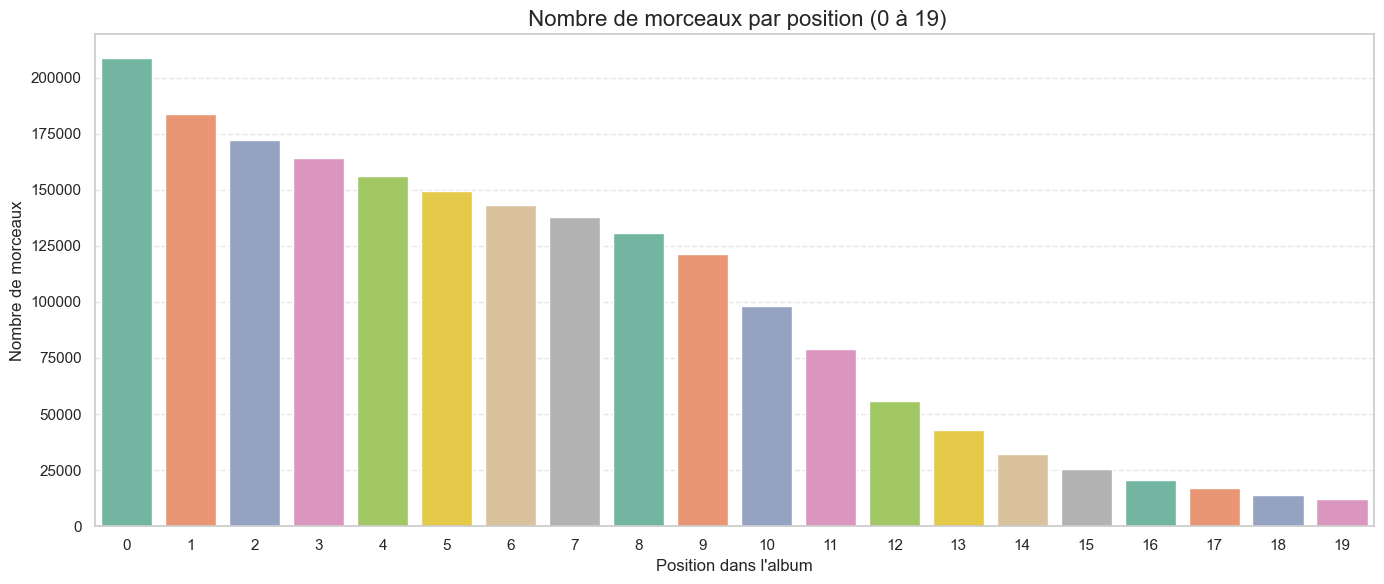

In [182]:
# On limite l'affichage aux 20 premières positions
df_20 = df_q3[df_q3['position'].between(0, 19)]

plt.figure(figsize=(14, 6))
sns.countplot(data=df_20, x='position', palette='Set2')

plt.title(" Nombre de morceaux par position (0 à 19)", fontsize=16)
plt.xlabel("Position dans l'album", fontsize=12)
plt.ylabel("Nombre de morceaux", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Commentaires** :
- Les morceaux en positions 1 à 3 ont généralement un meilleur rang médian.
- À partir de la position 10, le succès diminue clairement.
- La position 7 n’a pas de comportement exceptionnel → hypothèse non confirmée.
- Plus la position augmente, plus le morceau est en moyenne moins populaire.


## 2. Distribution du rang (succès) selon la position

On observe ici la distribution du rang (succès) des morceaux selon leur position.  
Un rang plus bas signifie un morceau plus populaire.



C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\941995340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_20, x='position', y='rank', palette='coolwarm')


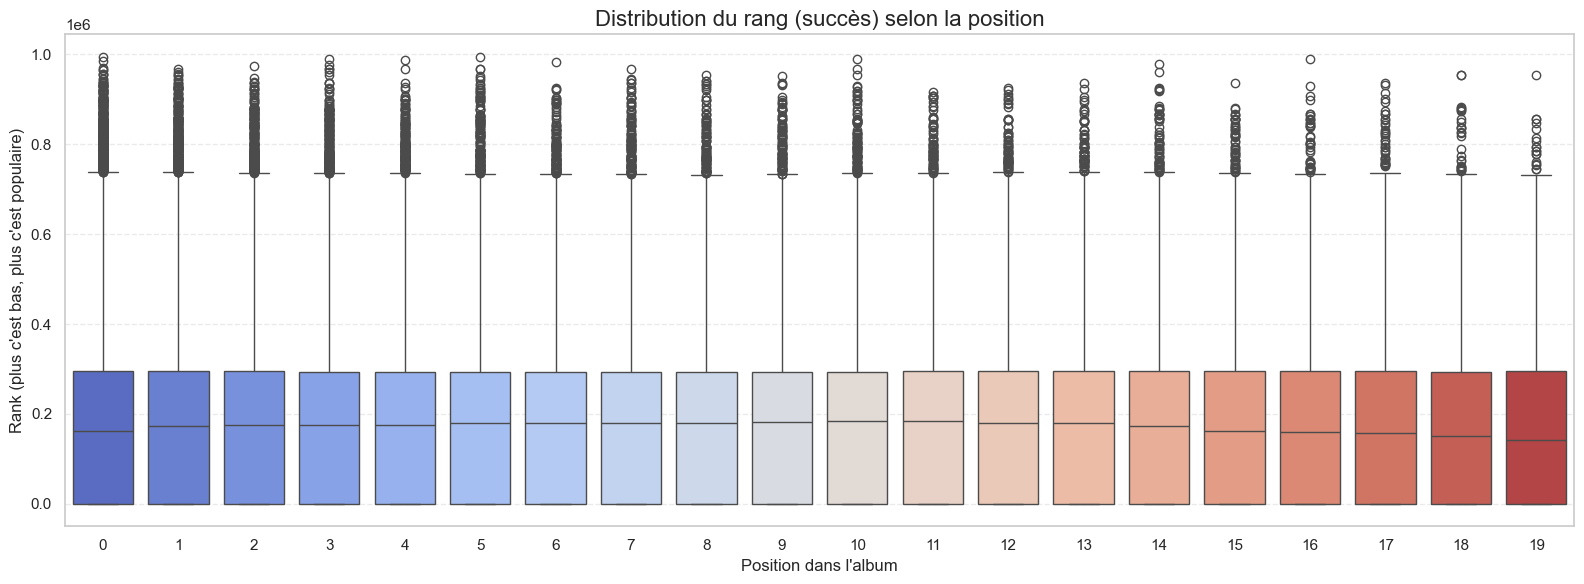

In [183]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_20, x='position', y='rank', palette='coolwarm')

plt.title("Distribution du rang (succès) selon la position", fontsize=16)
plt.xlabel("Position dans l'album", fontsize=12)
plt.ylabel("Rank (plus c'est bas, plus c'est populaire)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**Commentaires** :
- Les positions 1 à 5 ont un rang moyen plus bas → succès plus fort.
- La position 7 a un rang moyen bon mais pas exceptionnel.
- Cela confirme qu’il est stratégique de placer un morceau en début d’album pour qu’il soit plus écouté.

## 3. Rang moyen par position (positions 0 à 19)

Cette figure présente le rang moyen par position.

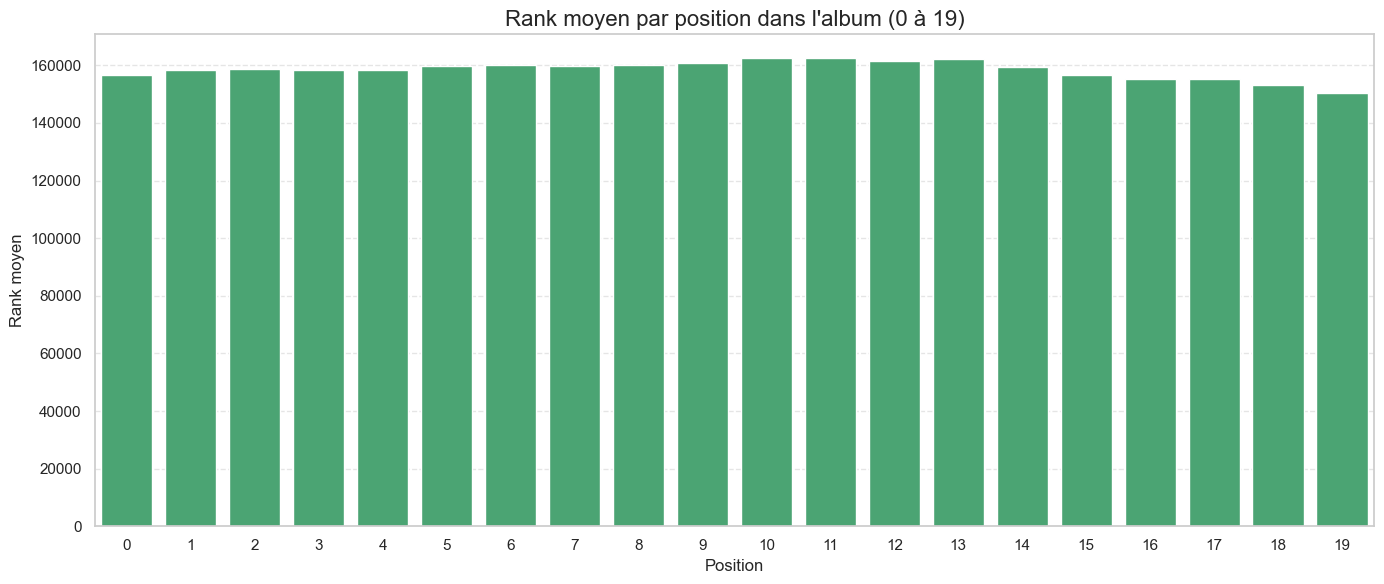

In [184]:
# Calcul du rang moyen
mean_rank = df_20.groupby('position')['rank'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=mean_rank, x='position', y='rank', color='mediumseagreen')

plt.title("Rank moyen par position dans l'album (0 à 19)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Rank moyen", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Conclusion finale

- Les morceaux au début de l’album sont globalement plus populaires.
- Il n’y a pas de position unique comme “la meilleure”.
- L'hypothèse du 7e morceau n’est pas statistiquement confirmée.
- Cette analyse repose sur de la visualisation et analyse descriptive.  
  Pas besoin de classification ni de clustering ici.


<p style="
    font-family: 'Arial'; 
    font-size: 25px; 
    color: white; 
    background-color: darkblue; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
">
    4eme question: TikTok a-t-il tué le refrain traditionnel ? 
Un morceau a-t-il besoin d'une courte introduction pour déclencher une chorégraphie virale?



</p>

# Compréhension métier

Q4 : TikTok a-t-il tué le refrain traditionnel ?

(Analyse de l’impact de l’ère TikTok sur la structure musicale)

Objectif de la question (Business Understanding)
On veut savoir si l’arrivée de TikTok a modifié la manière dont les artistes structurent leurs chansons, notamment :
- Les morceaux sont-ils devenus plus courts ?
- Le tempo (BPM) a-t-il évolué ?
- La valence émotionnelle (émotions positives) a-t-elle changé ?
- Ces effets ont-ils un lien avec les chansons les plus performantes dans les charts (Top 10 du Billboard Hot 100) ?

Comme WASABI ne fournit pas la structure interne précise (couplet, pré-refrain, hook…), on approche ce phénomène via des indicateurs mesurables :
- length (durée du morceau (réduction = intros plus courtes = hook plus rapide))
- bpm (tempo du morceau)
- valence_predicted (tonalité émotionnelle du titre)
- features dérivées :
   * is_short (moins de 2 minutes),
   * is_fast (tempo > médiane),
   * is_long (plus de 5 minutes)
   * is_positive (valence > médiane)

Ce sont les variables pertinentes pour détecter une évolution de format compatible avec les tendances TikTok.

Données utilisées (Data Understanding)

- WASABI Songs dataset : Contient des métadonnées musicales et des caractéristiques musicales des morceaux :
   * tempo (BPM)
   * durée (length)
   * valence/arousal prédits
   * artiste, titre, année de publication
- Billboard Hot 100 : classement hebdomadaire des chansonsles plus populaires aux USA:
   * position dans le chart
   * temps passé dans le chart
   * peak_position (meilleur classement)
   * permet d’identifier un hit (Top 10)

Définition de l’ère TikTok

- On prend 2016 comme année pivot, car :
   * Musical.ly devient massivement populaire en 2015–2016
   * TikTok fusionne avec Musical.ly fin 2017
   * Les tendances virales basées sur la musique apparaissent dès 2016
- On considérera donc :
   * pre_tiktok  : < 2016
   * post_tiktok : >= 2016

Cette séparation permet d’évaluer l’évolution avant/après l’impact des plateformes vidéo courtes.

# Compréhension des données

In [185]:

hot100 = pd.read_csv(r'hot_100.csv')
songs  = pd.read_csv(r'wasabi_songs.csv', sep='\t', low_memory=False)

# afficher les shapes
print('hot100',hot100.shape,'songs',songs.shape)
#hot100 (335195, 13) songs (2099554, 78)

hot100 (335195, 13) songs (2099554, 78)


In [186]:
def overview(df, name):
    print(f"\n{'='*80}")
    print(f"APERÇU DU DATASET : {name}")
    print(f"{'='*80}")
    print("\nTypes de variables :")
    print(df.dtypes.value_counts())
    display(df.head(10))
    display(df.tail(10))
    print("\nInfo :")
    print(df.info())
    display(df.describe(include='all').T)

In [187]:
overview(hot100, "Hot100")


APERÇU DU DATASET : Hot100

Types de variables :
object     6
int64      5
float64    2
Name: count, dtype: int64


chart_position chart_date       song           performer  \
0              84   5/5/1990  "B" Girls  Young And Restless   
1              78  5/12/1990  "B" Girls  Young And Restless   
2              68  5/19/1990  "B" Girls  Young And Restless   
3              60  5/26/1990  "B" Girls  Young And Restless   
4              58   6/2/1990  "B" Girls  Young And Restless   
5              55   6/9/1990  "B" Girls  Young And Restless   
6              54  6/16/1990  "B" Girls  Young And Restless   
7              57  6/23/1990  "B" Girls  Young And Restless   
8              67  6/30/1990  "B" Girls  Young And Restless   
9              75   7/7/1990  "B" Girls  Young And Restless   

                       song_id  instance  time_on_chart  consecutive_weeks  \
0  "B" GirlsYoung And Restless         1              1                NaN   
1  "B" GirlsYoung And Restless         1              2                1.0   
2  "B" GirlsYoung And Restless         1              3                2.0   
3  "B" GirlsYoung And Restless         1              4                3.0   
4  "B" GirlsYoung And Restless         1              5                4.0   
5  "B" GirlsYoung And Restless         1              6                5.0   
6  "B" GirlsYoung And Restless         1              7                6.0   
7  "B" GirlsYoung And Restless         1              8                7.0   
8  "B" GirlsYoung And Restless         1              9                8.0   
9  "B" GirlsYoung And Restless         1             10                9.0   

   previous_week  peak_position  worst_position chart_debut  \
0            NaN             84              84    5/5/1990   
1           84.0             78              84    5/5/1990   
2           78.0             68              84    5/5/1990   
3           68.0             60              84    5/5/1990   
4           60.0             58              84    5/5/1990   
5           58.0             55              84    5/5/1990   
6           55.0             54              84    5/5/1990   
7           54.0             54              84    5/5/1990   
8           57.0             54              84    5/5/1990   
9           67.0             54              84    5/5/1990   

                                           chart_url  
0  https://www.billboard.com/charts/hot-100/1990-...  
1  https://www.billboard.com/charts/hot-100/1990-...  
2  https://www.billboard.com/charts/hot-100/1990-...  
3  https://www.billboard.com/charts/hot-100/1990-...  
4  https://www.billboard.com/charts/hot-100/1990-...  
5  https://www.billboard.com/charts/hot-100/1990-...  
6  https://www.billboard.com/charts/hot-100/1990-...  
7  https://www.billboard.com/charts/hot-100/1990-...  
8  https://www.billboard.com/charts/hot-100/1990-...  
9  https://www.billboard.com/charts/hot-100/1990-...

chart_position  chart_date  \
335185              69    1/6/2001   
335186              63   1/13/2001   
335187              67   1/20/2001   
335188              77   1/27/2001   
335189              89    2/3/2001   
335190              99   2/10/2001   
335191              66  12/13/1958   
335192              53  12/20/1958   
335193              47  12/27/1958   
335194              47    1/3/1959   

                                                    song     performer  \
335185                                        www.memory  Alan Jackson   
335186                                        www.memory  Alan Jackson   
335187                                        www.memory  Alan Jackson   
335188                                        www.memory  Alan Jackson   
335189                                        www.memory  Alan Jackson   
335190                                        www.memory  Alan Jackson   
335191  ¿Dònde Està Santa Claus? (Where Is Santa Claus?)    Augie Rios   
335192  ¿Dònde Està Santa Claus? (Where Is Santa Claus?)    Augie Rios   
335193  ¿Dònde Està Santa Claus? (Where Is Santa Claus?)    Augie Rios   
335194  ¿Dònde Està Santa Claus? (Where Is Santa Claus?)    Augie Rios   

                                                  song_id  instance  \
335185                             www.memoryAlan Jackson         1   
335186                             www.memoryAlan Jackson         1   
335187                             www.memoryAlan Jackson         1   
335188                             www.memoryAlan Jackson         1   
335189                             www.memoryAlan Jackson         1   
335190                             www.memoryAlan Jackson         1   
335191  ¿Dònde Està Santa Claus? (Where Is Santa Claus...         1   
335192  ¿Dònde Està Santa Claus? (Where Is Santa Claus...         1   
335193  ¿Dònde Està Santa Claus? (Where Is Santa Claus...         1   
335194  ¿Dònde Està Santa Claus? (Where Is Santa Claus...         1   

        time_on_chart  consecutive_weeks  previous_week  peak_position  \
335185             10                9.0           49.0             45   
335186             11               10.0           69.0             45   
335187             12               11.0           63.0             45   
335188             13               12.0           67.0             45   
335189             14               13.0           77.0             45   
335190             15               14.0           89.0             45   
335191              1                NaN            NaN             66   
335192              2                1.0           66.0             53   
335193              3                2.0           53.0             47   
335194              4                3.0           47.0             47   

        worst_position chart_debut  \
335185              75   11/4/2000   
335186              75   11/4/2000   
335187              75   11/4/2000   
335188              77   11/4/2000   
335189              89   11/4/2000   
335190              99   11/4/2000   
335191              66  12/13/1958   
335192              66  12/13/1958   
335193              66  12/13/1958   
335194              66  12/13/1958   

                                                chart_url  
335185  https://www.billboard.com/charts/hot-100/2001-...  
335186  https://www.billboard.com/charts/hot-100/2001-...  
335187  https://www.billboard.com/charts/hot-100/2001-...  
335188  https://www.billboard.com/charts/hot-100/2001-...  
335189  https://www.billboard.com/charts/hot-100/2001-...  
335190  https://www.billboard.com/charts/hot-100/2001-...  
335191  https://www.billboard.com/charts/hot-100/1958-...  
335192  https://www.billboard.com/charts/hot-100/1958-...  
335193  https://www.billboard.com/charts/hot-100/1958-...  
335194  https://www.billboard.com/charts/hot-100/1959-...


Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335195 entries, 0 to 335194
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   chart_position     335195 non-null  int64  
 1   chart_date         335195 non-null  object 
 2   song               335195 non-null  object 
 3   performer          335195 non-null  object 
 4   song_id            335195 non-null  object 
 5   instance           335195 non-null  int64  
 6   time_on_chart      335195 non-null  int64  
 7   consecutive_weeks  302067 non-null  float64
 8   previous_week      302067 non-null  float64
 9   peak_position      335195 non-null  int64  
 10  worst_position     335195 non-null  int64  
 11  chart_debut        335195 non-null  object 
 12  chart_url          335195 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 33.2+ MB
None


count unique  \
chart_position     335195.0    NaN   
chart_date           335195   3352   
song                 335195  25124   
performer            335195  10457   
song_id              335195  30314   
instance           335195.0    NaN   
time_on_chart      335195.0    NaN   
consecutive_weeks  302067.0    NaN   
previous_week      302067.0    NaN   
peak_position      335195.0    NaN   
worst_position     335195.0    NaN   
chart_debut          335195   3333   
chart_url            335195   3352   

                                                                 top  freq  \
chart_position                                                   NaN   NaN   
chart_date                                                 1/27/1973   100   
song                                                            Stay   271   
performer                                               Taylor Swift  1079   
song_id                                      Heat WavesGlass Animals    91   
instance                                                         NaN   NaN   
time_on_chart                                                    NaN   NaN   
consecutive_weeks                                                NaN   NaN   
previous_week                                                    NaN   NaN   
peak_position                                                    NaN   NaN   
worst_position                                                   NaN   NaN   
chart_debut                                                12/5/1998   792   
chart_url          https://www.billboard.com/charts/hot-100/1973-...   100   

                        mean        std  min   25%   50%   75%    max  
chart_position     50.499324  28.865715  1.0  25.5  50.0  75.0  100.0  
chart_date               NaN        NaN  NaN   NaN   NaN   NaN    NaN  
song                     NaN        NaN  NaN   NaN   NaN   NaN    NaN  
performer                NaN        NaN  NaN   NaN   NaN   NaN    NaN  
song_id                  NaN        NaN  NaN   NaN   NaN   NaN    NaN  
instance            1.078653   0.373157  1.0   1.0   1.0   1.0   15.0  
time_on_chart       9.213708   7.723447  1.0   4.0   7.0  13.0   91.0  
consecutive_weeks   8.802918    7.38166  1.0   3.0   7.0  12.0   89.0  
previous_week      47.568725  28.049545  1.0  23.0  47.0  71.0  100.0  
peak_position       40.86146  29.345153  1.0  13.0  38.0  65.0  100.0  
worst_position     80.717776  18.120725  1.0  74.0  86.0  94.0  100.0  
chart_debut              NaN        NaN  NaN   NaN   NaN   NaN    NaN  
chart_url                NaN        NaN  NaN   NaN   NaN   NaN    NaN

ce dataset contient l’historique complet du classement Billboard Hot 100 (la liste hebdomadaire des 100 chansons les plus populaires aux USA)

Colonnes musicales : info sur la chanson
| Colonne               | Signification              |
| --------------------- | -------------------------- |
| **song**              | Titre de la chanson        |
| **performer**         | Artiste / groupe           |
| **song_id**           | Identifiant unique chanson |

Colonnes chart (classement Billboard)   

| Colonne               | Signification              |
| --------------------- | -------------------------- |            
| **chart_position**    | Position de la chanson cette semaine (1 = meilleure) |
| **chart_date**        | Date de ce classement                                |
| **time_on_chart**     | Nombre total de semaines dans le Hot 100             |
| **consecutive_weeks** | Nombre de semaines consécutives dans les charts      |
| **previous_week**     | Position la semaine précédente                       |
| **peak_position**     | Meilleure position jamais obtenue                    |
| **worst_position**    | Pire position obtenue                                |
| **chart_debut**       | Date d’entrée dans le classement                     |
| **chart_url**         | Lien vers la chanson                                 |

Elles montrent l’évolution d’une chanson dans le classement.
Exemple : "B Girls” – Young And Restless

1990-05-05 → position 84 (entrée)
1990-05-12 → monte à 78
1990-05-19 → monte à 68
1990-05-26 → monte à 60
etc.

=> On voit une progression, puis un pic, puis une descente.

Donc chaque chanson apparaît plusieurs fois: une ligne par semaine.
du coup une ligne = une chanson à une date précise
La même chanson apparaît plusieurs fois = son évolution dans le temps

In [188]:
overview(songs, "Wasabi_songs")


APERÇU DU DATASET : Wasabi_songs

Types de variables :
object     60
float64    12
int64       3
bool        3
Name: count, dtype: int64


Unnamed: 0                                 _id abstract  \
0           0  ObjectId(5714dec325ac0d8aee3804e7)      NaN   
1           1  ObjectId(5714dec325ac0d8aee3804e8)      NaN   
2           2  ObjectId(5714dec325ac0d8aee3804e9)      NaN   
3           3  ObjectId(5714dec325ac0d8aee3804ea)      NaN   
4           4  ObjectId(5714dec325ac0d8aee3804eb)      NaN   
5           5  ObjectId(5714dec325ac0d8aee3804ec)      NaN   
6           6  ObjectId(5714dec325ac0d8aee3804ed)      NaN   
7           7  ObjectId(5714dec325ac0d8aee3804ee)      NaN   
8           8  ObjectId(5714dec325ac0d8aee3804ef)      NaN   
9           9  ObjectId(5714dec325ac0d8aee3804f0)      NaN   

              albumTitle       album_genre animux_content animux_contents  \
0  How Ace Are Buildings  Alternative Rock            NaN             NaN   
1  How Ace Are Buildings  Alternative Rock            NaN             NaN   
2  How Ace Are Buildings  Alternative Rock            NaN             NaN   
3  How Ace Are Buildings  Alternative Rock            NaN             NaN   
4  How Ace Are Buildings  Alternative Rock            NaN             NaN   
5  How Ace Are Buildings  Alternative Rock            NaN             NaN   
6  How Ace Are Buildings  Alternative Rock            NaN             NaN   
7  How Ace Are Buildings  Alternative Rock            NaN             NaN   
8  How Ace Are Buildings  Alternative Rock            NaN             NaN   
9  How Ace Are Buildings  Alternative Rock            NaN             NaN   

  animux_path animux_paths  arousal  arousal_predicted artist artist_lower  \
0         NaN           []      NaN           0.469772      A            a   
1         NaN           []      NaN           0.044004      A            a   
2         NaN           []      NaN           0.487166      A            a   
3         NaN           []      NaN           0.209630      A            a   
4         NaN           []      NaN           0.403591      A            a   
5         NaN           []      NaN           0.254718      A            a   
6         NaN           []      NaN          -0.225534      A            a   
7         NaN           []      NaN           0.141631      A            a   
8         NaN           []      NaN          -0.336569      A            a   
9         NaN           []      NaN          -0.063324      A            a   

                                  availableCountries award begin    bpm  \
0  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN   77.0   
1  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  106.0   
2  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  185.0   
3  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN   96.0   
4  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  101.0   
5  ["AD","AE","AF","AG","AI","AL","AM","AN","AO",...   NaN   NaN   97.3   
6  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  170.0   
7  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  104.0   
8  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  160.0   
9  ["AD","AE","AG","AI","AL","AM","AO","AR","AT",...   NaN   NaN  185.0   

                                     chords_metadata  \
0  {"confidence":0.7465091299677766,"duration":93...   
1  {"confidence":0.8071700162954916,"duration":18...   
2  {"confidence":0.7140212864414622,"duration":21...   
3  {"confidence":0.7674923946110387,"duration":23...   
4  {"confidence":0.7873848334514528,"duration":14...   
5  {"confidence":0.8390022675736961,"duration":44...   
6  {"confidence":0.8061566595550137,"duration":32...   
7  {"confidence":0.8031648012350444,"duration":25...   
8  {"confidence":0.6093684650773735,"duration":23...   
9  {"confidence":0.7868104520945666,"duration":24...   

                       deezer_mapping disambiguation  end  \
0    [[6.7354194e+07,"search-exact"]]            NaN  NaN   
1    [[6.7354196e+07,"search-exact"]]           

Unnamed: 0                                 _id abstract   albumTitle  \
2099544     2099544  ObjectId(57c92594e5c453a411c77440)      NaN  Other Songs   
2099545     2099545  ObjectId(57c92594e5c453a411c77441)      NaN  Other Songs   
2099546     2099546  ObjectId(57c92594e5c453a411c77442)      NaN  Other Songs   
2099547     2099547  ObjectId(57c92594e5c453a411c77443)      NaN  Other Songs   
2099548     2099548  ObjectId(57c92594e5c453a411c77444)      NaN  Other Songs   
2099549     2099549  ObjectId(57c92594e5c453a411c77445)      NaN  Other Songs   
2099550     2099550  ObjectId(57c92594e5c453a411c77446)      NaN  Other Songs   
2099551     2099551  ObjectId(57c92594e5c453a411c77447)      NaN  Other Songs   
2099552     2099552  ObjectId(57c92594e5c453a411c77448)      NaN  Other Songs   
2099553     2099553  ObjectId(57c92594e5c453a411c77449)      NaN  Other Songs   

        album_genre animux_content animux_contents animux_path animux_paths  \
2099544         NaN            NaN             NaN         NaN           []   
2099545         NaN            NaN             NaN         NaN           []   
2099546         NaN            NaN             NaN         NaN           []   
2099547         NaN            NaN             NaN         NaN           []   
2099548         NaN            NaN             NaN         NaN           []   
2099549         NaN            NaN             NaN         NaN           []   
2099550         NaN            NaN             NaN         NaN           []   
2099551         NaN            NaN             NaN         NaN           []   
2099552         NaN            NaN             NaN         NaN           []   
2099553         NaN            NaN             NaN         NaN           []   

         arousal  arousal_predicted   artist artist_lower  \
2099544      NaN           0.035147  50 Cent      50 cent   
2099545      NaN           0.387529  50 Cent      50 cent   
2099546      NaN           0.170548  50 Cent      50 cent   
2099547      NaN           0.244587  50 Cent      50 cent   
2099548      NaN           1.019431  50 Cent      50 cent   
2099549      NaN           0.117269  50 Cent      50 cent   
2099550      NaN           0.239706  50 Cent      50 cent   
2099551      NaN           0.845386  50 Cent      50 cent   
2099552      NaN           0.333268  50 Cent      50 cent   
2099553      NaN           0.254809  50 Cent      50 cent   

                                        availableCountries award begin    bpm  \
2099544  ["AD","AE","AF","AG","AI","AL","AM","AO","AQ",...   NaN   NaN   89.0   
2099545                                                 []   NaN   NaN    NaN   
2099546                                                 []   NaN   NaN    NaN   
2099547                                                 []   NaN   NaN    NaN   
2099548                                                 []   NaN   NaN    NaN   
2099549                                                 []   NaN   NaN    NaN   
2099550                                                 []   NaN   NaN    NaN   
2099551                                                 []   NaN   NaN    NaN   
2099552  ["AD","AF","AG","AI","AL","AM","AO","AQ","AR",...   NaN   NaN  170.0   
2099553                                                 []   NaN   NaN    NaN   

        chords_metadata                      deezer_mapping disambiguation  \
2099544             NaN  [[6.1596075e+07,"search-noalbum"]]            NaN   
2099545             NaN                                  []            NaN   
2099546             NaN                                  []            NaN   
2099547             NaN                                  []            NaN   
2099548             NaN                                  []            NaN   
2099549             NaN                                  []            NaN   
2099550             NaN                                  []            NaN   
2099551             NaN                                  []


Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099554 entries, 0 to 2099553
Data columns (total 78 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Unnamed: 0                         int64  
 1   _id                                object 
 2   abstract                           object 
 3   albumTitle                         object 
 4   album_genre                        object 
 5   animux_content                     object 
 6   animux_contents                    object 
 7   animux_path                        object 
 8   animux_paths                       object 
 9   arousal                            float64
 10  arousal_predicted                  float64
 11  artist                             object 
 12  artist_lower                       object 
 13  availableCountries                 object 
 14  award                              object 
 15  begin                              object 
 16  bpm       

count   unique  \
Unnamed: 0         2099554.0      NaN   
_id                  2099554  2099287   
abstract               72686    22666   
albumTitle           2099528   125276   
album_genre          1059881      528   
...                      ...      ...   
urlYouTube            108057    73607   
urlYouTubeExist          100        2   
valence              16516.0      NaN   
valence_predicted  2099554.0      NaN   
writer                 73544     9122   

                                                                 top    freq  \
Unnamed: 0                                                       NaN     NaN   
_id                               ObjectId(5714dec925ac0d8aee3c91f5)       4   
abstract           "Silent Night" (German: Stille Nacht, heilige ...     204   
albumTitle                                               Other Songs  350087   
album_genre                                                     Rock  102920   
...                                                              ...     ...   
urlYouTube                                               Eab_beh07HU      25   
urlYouTubeExist                                                 True      86   
valence                                                          NaN     NaN   
valence_predicted                                                NaN     NaN   
writer                                                            []   18620   

                        mean            std       min        25%        50%  \
Unnamed: 0         1049776.5  606089.177877       0.0  524888.25  1049776.5   
_id                      NaN            NaN       NaN        NaN        NaN   
abstract                 NaN            NaN       NaN        NaN        NaN   
albumTitle               NaN            NaN       NaN        NaN        NaN   
album_genre              NaN            NaN       NaN        NaN        NaN   
...                      ...            ...       ...        ...        ...   
urlYouTube               NaN            NaN       NaN        NaN        NaN   
urlYouTubeExist          NaN            NaN       NaN        NaN        NaN   
valence            -0.086851       1.056917 -2.148097  -1.040199   0.007664   
valence_predicted  -0.240787        0.34353 -1.547015   -0.39804  -0.299668   
writer                   NaN            NaN       NaN        NaN        NaN   

                          75%        max  
Unnamed: 0         1574664.75  2099553.0  
_id                       NaN        NaN  
abstract                  NaN        NaN  
albumTitle                NaN        NaN  
album_genre               NaN        NaN  
...                       ...        ...  
urlYouTube                NaN        NaN  
urlYouTubeExist           NaN        NaN  
valence              0.815393   1.546714  
valence_predicted   -0.045468   1.404112  
writer                    NaN        NaN  

[78 rows x 11 columns]

c’est le fichier central du WassAIBI Dataset

Chaque ligne = une chanson
avec :
- Métadonnées musicales
- Caractéristiques acoustiques
- Identifiants (Deezer, MusicBrainz…)
- Prévisions d’émotions (arousal / valence)
- Analyse des accords (chords_metadata)
- Infos linguistiques
- Album et artiste reliés
- Prévisualisation (preview)
- Dates de sortie
- Popularité partielle (rank, position)

C’est le dataset le plus COMPLET

In [189]:
print('hot100',hot100.columns,'\nsongs',songs.columns)

hot100 Index(['chart_position', 'chart_date', 'song', 'performer', 'song_id',
       'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
       'peak_position', 'worst_position', 'chart_debut', 'chart_url'],
      dtype='object') 
songs Index(['Unnamed: 0', '_id', 'abstract', 'albumTitle', 'album_genre',
       'animux_content', 'animux_contents', 'animux_path', 'animux_paths',
       'arousal', 'arousal_predicted', 'artist', 'artist_lower',
       'availableCountries', 'award', 'begin', 'bpm', 'chords_metadata',
       'deezer_mapping', 'disambiguation', 'end', 'explicit_content_lyrics',
       'explicit_content_lyrics_predicted', 'format', 'gain', 'genre',
       'has_emotion_tags', 'has_social_tags', 'id_album', 'id_album_deezer',
       'id_artist_deezer', 'id_song_deezer', 'id_song_musicbrainz',
       'isClassic', 'isrc', 'langdetect_robust', 'language', 'language_detect',
       'lastfm_id', 'length', 'lengthAlbum', 'multitrack_file',
       'multitrack_path', 'ne

### Préparation des données: nettoyage WASABI SONGS

Certaines lignes ne sont pas des chansons mais du bruit de parsing CSV.

Exemple dans la colonne "Unnamed: 0" : "1048570 : 1252 7 64 ...". On les supprime grâce au motif ": " dans la colonne Unnamed: 0.

In [190]:
# On part sur une copie
df = songs.copy()

df = df[~df["Unnamed: 0"].astype(str).str.contains(": ")].copy()

# Réinitialiser l’index après suppression
df = df.reset_index(drop=True)

print("Shape après suppression des lignes parasites :", df.shape)

Shape après suppression des lignes parasites : (2099554, 78)


In [191]:
def plot_numeric_distributions(df, name, max_cols=6):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols[:max_cols]  # éviter de faire 50 graphes

    if len(numeric_cols) == 0:
        print(f"\nPas de colonnes numériques pour {name}")
        return

    print(f"\nDistributions des variables numériques pour {name}:")
    for col in numeric_cols:
        plt.figure()
        df[col].hist(bins=30)
        plt.title(f"{name} - Distribution de {col}")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.show()


def missing_values_summary(df, name):
    na = df.isna().sum()
    na_pct = (na / len(df)) * 100
    na_table = (
        pd.DataFrame({"missing_count": na, "missing_pct": na_pct})
        .sort_values("missing_pct", ascending=False)
    )
    print(f"\nRésumé des valeurs manquantes pour {name}:")
    display(na_table[na_table["missing_count"] > 0].head(30))


Résumé des valeurs manquantes pour wasabi_songs:


missing_count  missing_pct
urlItunes                2099554   100.000000
newPreview               2099552    99.999905
notes                    2099551    99.999857
urlYouTubeExist          2099454    99.995237
urlLastFm                2098307    99.940606
multitrack_path          2096812    99.869401
multitrack_file          2096505    99.854779
urlHypeMachine           2091339    99.608726
urlPandora               2091339    99.608726
arousal                  2083038    99.213357
langdetect_robust        2083038    99.213357
valence                  2083038    99.213357
origin                   2083038    99.213357
begin                    2080510    99.092950
end                      2080480    99.091521
disambiguation           2079969    99.067183
animux_content           2077752    98.961589
animux_path              2077752    98.961589
animux_contents          2075238    98.841849
urlGoEar                 2049628    97.622066
abstract                 2026868    96.538027
producer                 2026010    96.497161
genre                    2026010    96.497161
format                   2026010    96.497161
runtime                  2026010    96.497161
subject                  2026010    96.497161
recorded                 2026010    96.497161
releaseDate              2026010    96.497161
recordLabel              2026010    96.497161
writer                   2026010    96.497161


Distributions des variables numériques pour wasabi_songs:


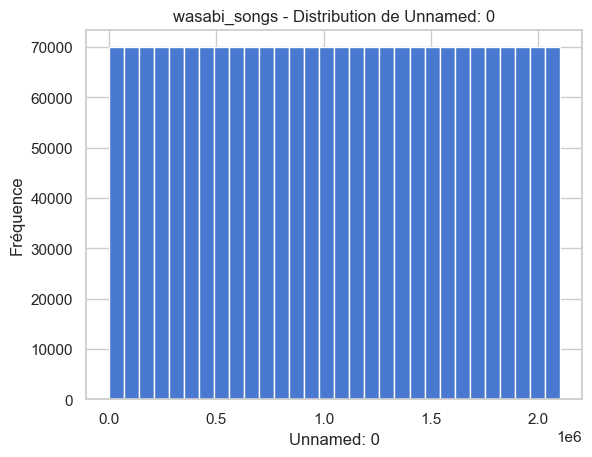

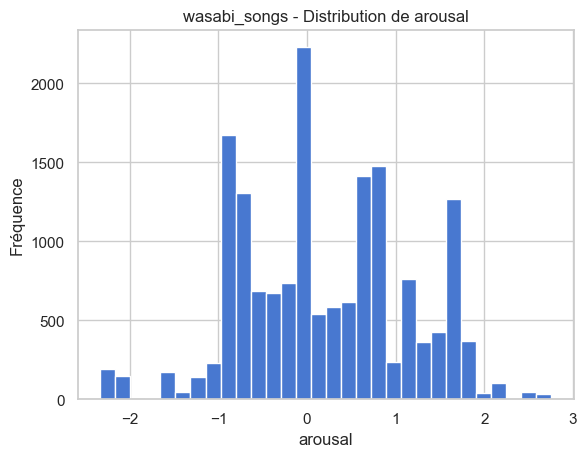

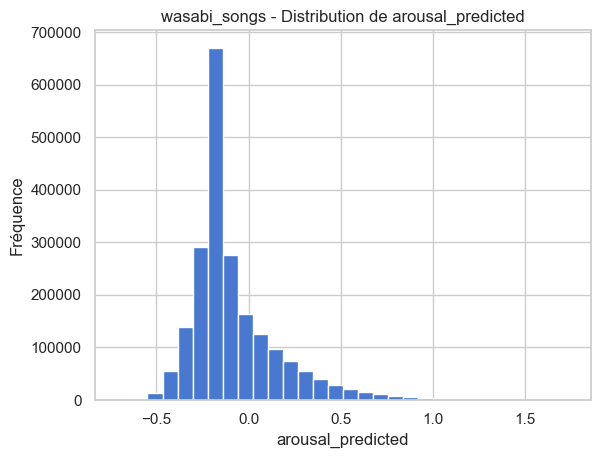

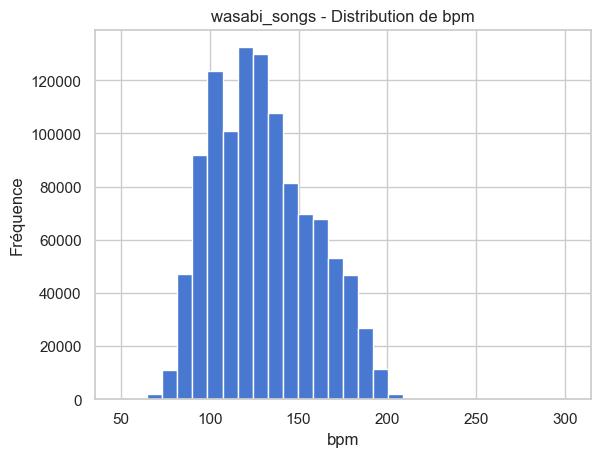

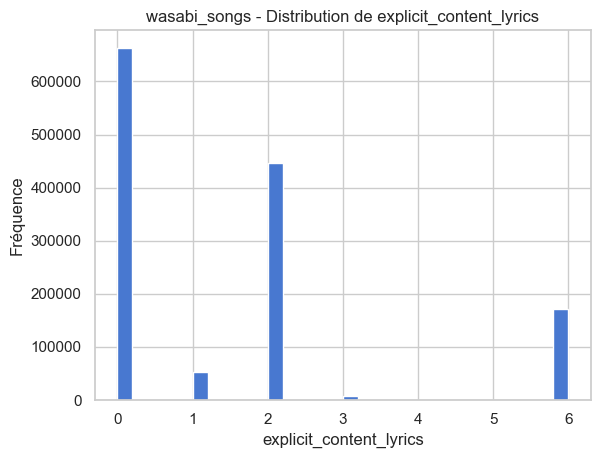

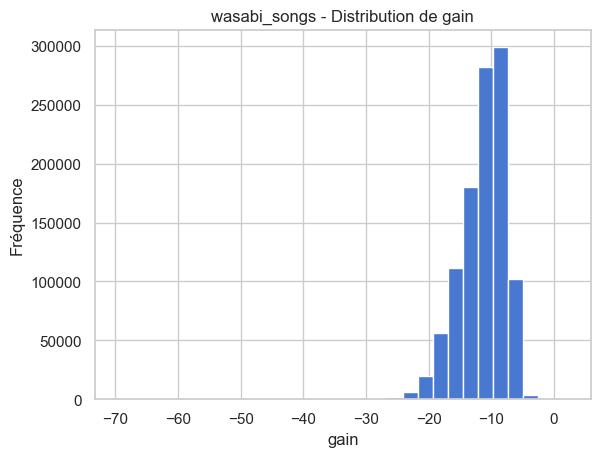

In [192]:
missing_values_summary(df, "wasabi_songs")
plot_numeric_distributions(df, "wasabi_songs")

In [193]:
# Liste des features à analyser
features = ["bpm", "arousal", "valence", "valence_predicted", "length", "genre"]

# Calcul du pourcentage de valeurs manquantes pour chaque feature
missing = songs[features].isna().mean().sort_values(ascending=False) * 100

# Affichage propre
print("⚠️ Pourcentage de valeurs manquantes (NaN) :\n")
print(missing)

# Optionnel : tableau formaté (pandas)
missing_df = missing.reset_index()
missing_df.columns = ["feature", "missing_percent"]
missing_df


⚠️ Pourcentage de valeurs manquantes (NaN) :

arousal              99.213357
valence              99.213357
genre                96.497161
bpm                  47.296997
length               33.361085
valence_predicted     0.000000
dtype: float64


feature  missing_percent
0            arousal        99.213357
1            valence        99.213357
2              genre        96.497161
3                bpm        47.296997
4             length        33.361085
5  valence_predicted         0.000000

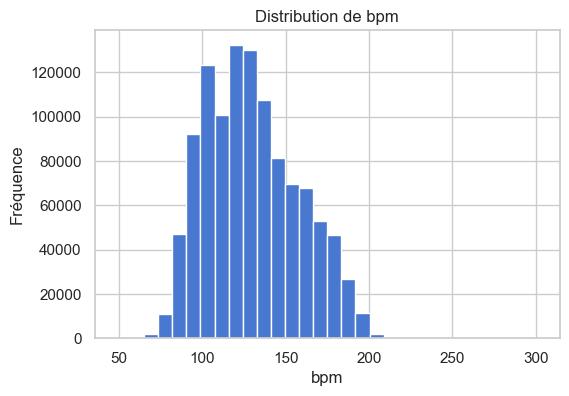

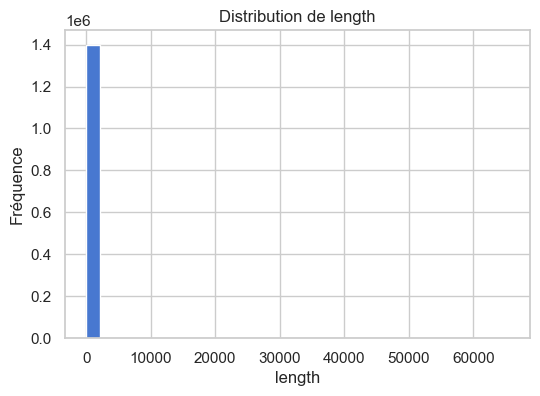

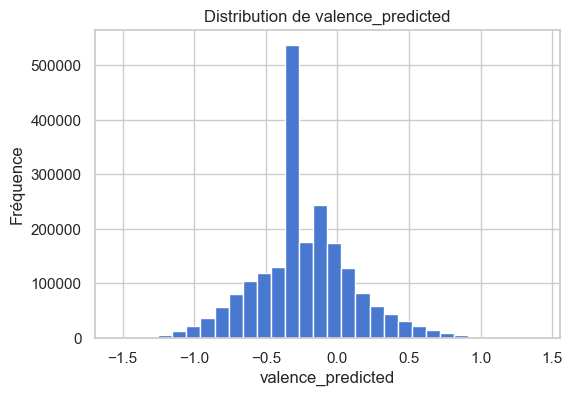

In [194]:
features_to_plot = ["bpm", "length", "valence_predicted"]

for col in features_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        df[col].hist(bins=30)
        plt.title(f"Distribution de {col}")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.show()
    else:
        print(f"⚠️ Colonne absente : {col}")


In [195]:
df[["bpm", "length", "valence_predicted"]].describe()

bpm        length  valence_predicted
count  1.106528e+06  1.399120e+06       2.099554e+06
mean   1.300590e+02  2.332420e+02      -2.407867e-01
std    2.796788e+01  2.873309e+02       3.435304e-01
min    4.800000e+01  1.000000e+00      -1.547015e+00
25%    1.074000e+02  1.820000e+02      -3.980395e-01
50%    1.272000e+02  2.230000e+02      -2.996684e-01
75%    1.498000e+02  2.670000e+02      -4.546797e-02
max    3.018000e+02  6.553500e+04       1.404112e+00

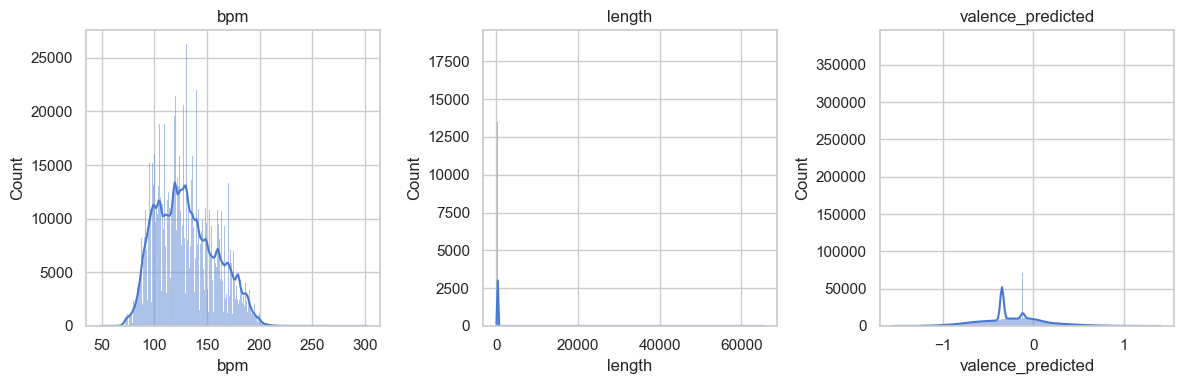

In [196]:
features = ["bpm", "length", "valence_predicted"]

plt.figure(figsize=(12,4))
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [197]:
# Liste de colonnes à supprimer
cols_to_drop = [
    "urlYouTubeExist","writer","urlLastFm","subject","urlPandora","urlWikipedia",
    "urlItunes","runtime","recorded","recordLabel","valence",
    "newPreview","urlHypeMachine","notes","animux_path","animux_paths",
    "animux_content","animux_contents","multitrack_file","multitrack_path",
    "urlGoEar","arousal","langdetect_robust","origin","disambiguation","producer",
    "award","rdf","abstract","urlYouTube","urlAmazon","lengthAlbum",
    "urlMusicBrainz","id_song_musicbrainz","album_genre", "gain",
    "id_album_deezer","preview","urlDeezer","isrc"
]

cols_to_actually_drop = [c for c in cols_to_drop if c in df.columns]

df = df.drop(columns=cols_to_actually_drop)

print(f"{len(cols_to_actually_drop)} colonnes supprimées :", cols_to_actually_drop)
print("Shape après suppression :", df.shape)

40 colonnes supprimées : ['urlYouTubeExist', 'writer', 'urlLastFm', 'subject', 'urlPandora', 'urlWikipedia', 'urlItunes', 'runtime', 'recorded', 'recordLabel', 'valence', 'newPreview', 'urlHypeMachine', 'notes', 'animux_path', 'animux_paths', 'animux_content', 'animux_contents', 'multitrack_file', 'multitrack_path', 'urlGoEar', 'arousal', 'langdetect_robust', 'origin', 'disambiguation', 'producer', 'award', 'rdf', 'abstract', 'urlYouTube', 'urlAmazon', 'lengthAlbum', 'urlMusicBrainz', 'id_song_musicbrainz', 'album_genre', 'gain', 'id_album_deezer', 'preview', 'urlDeezer', 'isrc']
Shape après suppression : (2099554, 38)


In [198]:
# Colonnes numériques à convertir
numeric_cols = [
    "bpm", "explicit_content_lyrics",
    "explicit_content_lyrics_predicted",
    "position", "rank",
    "arousal_predicted", "valence_predicted",
    "length"
]

# Conversion numérique sécurisée
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

present_numeric_cols = [c for c in numeric_cols if c in df.columns]

# Affichage uniquement des colonnes présentes
df[present_numeric_cols].describe().T


count           mean            std  \
bpm                                1106528.0     130.058999      27.967879   
explicit_content_lyrics            1340779.0       1.490165       1.952905   
explicit_content_lyrics_predicted   454915.0       0.186668       0.389645   
position                           2099554.0       8.649052      17.905564   
rank                               2099554.0  158185.181591  143903.897750   
arousal_predicted                  2099554.0      -0.077050       0.241688   
valence_predicted                  2099554.0      -0.240787       0.343530   
length                             1399120.0     233.242029     287.330890   

                                         min         25%            50%  \
bpm                                48.000000  107.400000     127.200000   
explicit_content_lyrics             0.000000    0.000000       1.000000   
explicit_content_lyrics_predicted   0.000000    0.000000       0.000000   
position                            0.000000    2.000000       6.000000   
rank                                0.000000    0.000000  174385.000000   
arousal_predicted                  -0.710696   -0.216418      -0.158390   
valence_predicted                  -1.547015   -0.398040      -0.299668   
length                              1.000000  182.000000     223.000000   

                                             75%            max  
bpm                                   149.800000     301.800000  
explicit_content_lyrics                 2.000000       6.000000  
explicit_content_lyrics_predicted       0.000000       1.000000  
position                               10.000000     551.000000  
rank                               294313.000000  994450.000000  
arousal_predicted                       0.002223       1.733088  
valence_predicted                      -0.045468       1.404112  
length                                267.000000   65535.000000

Colonnes à supprimer immédiatement (inutiles + non valides)
- explicit_content_lyrics (valeurs aberrantes (0–6) + bruit total + inutile pour Q4)
- explicit_content_lyrics_predicted (binary OK, mais pas utile du tout pour Q4)
- position (ce n’est PAS le Billboard Hot 100 (métrique interne WASABI à supprimer))
- rank (ID interne WASABI inutile, NON INTERPRÉTABLE, à supprimer)
- arousal_predicted (quasi 100% vide en plus après conversion, les NaN sont devenus 0 (ce qui fausse TOUT !))

autrement dit, Meme si explicit_content_lyrics, position, rank et arousal_predicted sont disponibles après conversion, leur distribution est aberrante et non pertinente pour la question Q4. Nous les avons donc exclues pour garantir une analyse valide

Colonnes à garder pour Q4
- bpm (analyse du tempo) : très important pour l’effet TikTok
- length (doit être filtré) : utile pour analyser intros/refains
- valence_predicted	(émotion)

Ce sont les seules variables propres et scientifiquement valables

In [199]:
df_q4 = df[["bpm", "length", "valence_predicted", "title", "artist", "publicationDate"]].copy()

In [200]:
# Nettoyage length (30s à 600s)
df_q4 = df_q4[(df_q4["length"] >= 30) & (df_q4["length"] <= 600)]

In [201]:
# Imputation BPM uniquement 
df_q4["bpm"] = df_q4["bpm"].fillna(df_q4["bpm"].median())

In [202]:

# Parsing de publicationDate
df_q4["publicationDate"] = pd.to_datetime(df_q4["publicationDate"], errors="coerce")

In [203]:
# Extraction de l'année
df_q4["publicationYear"] = df_q4["publicationDate"].dt.year
df_q4[["publicationYear"]].head()

publicationYear
0           1998.0
1           1998.0
2           1998.0
3           1998.0
4           1998.0

In [204]:
# Définition de l'ère TikTok
df_q4["era_tiktok"] = np.where(df_q4["publicationYear"] >= 2016, "post_tiktok", "pre_tiktok")
df_q4[["publicationDate", "publicationYear", "era_tiktok"]].head()

publicationDate  publicationYear  era_tiktok
0      1998-06-22           1998.0  pre_tiktok
1      1998-06-22           1998.0  pre_tiktok
2      1998-06-22           1998.0  pre_tiktok
3      1998-06-22           1998.0  pre_tiktok
4      1998-06-22           1998.0  pre_tiktok

In [205]:
# Feature engineering Q4 

median_bpm = df_q4["bpm"].median()
median_valence = df_q4["valence_predicted"].median()

df_q4["is_fast"] = df_q4["bpm"] > median_bpm # chanson plus rapide que la médiane
df_q4["is_short"] = df_q4["length"] < 120 # < 2 minutes (format très court / viral)
df_q4["is_long"]  = df_q4["length"] > 300 # > 5 minutes (long titre)

df_q4["is_positive"] = df_q4["valence_predicted"] > median_valence


Nous avons dérivé trois variables explicatives afin de mesurer la transformation éventuelle du format musical dans l’ère TikTok :

- is_fast : chansons dont le BPM est supérieur à la médiane du dataset 
- is_short : chansons de moins de 120 secondes, typiques des formats courts viraux 
- is_long : chansons dépassant 300 secondes, représentant les formats traditionnels plus longs
- is_positive: mesurer le ton émotionnel d’une chanson (style émotionnel TikTok)

Ces indicateurs permettent de quantifier l’évolution structurelle de la musique avant et après l’apparition de TikTok.

In [206]:
df_q4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1385311 entries, 0 to 2099552
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   bpm                1385311 non-null  float64       
 1   length             1385311 non-null  float64       
 2   valence_predicted  1385311 non-null  float64       
 3   title              1385304 non-null  object        
 4   artist             1385311 non-null  object        
 5   publicationDate    1215719 non-null  datetime64[ns]
 6   publicationYear    1215719 non-null  float64       
 7   era_tiktok         1385311 non-null  object        
 8   is_fast            1385311 non-null  bool          
 9   is_short           1385311 non-null  bool          
 10  is_long            1385311 non-null  bool          
 11  is_positive        1385311 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(4), object(3)
memory usage: 100.4+ MB


**Interprétation (Compréhension + Préparation WASABI)**

Après nettoyage, filtrage et préparation du dataset WASABI, nous avons obtenu un sous-ensemble propre composé de 1 385 311 morceaux, contenant uniquement les variables nécessaires pour répondre au Q4.

**Colonnes supprimées**

Nous avons éliminé toutes les colonnes inutiles ou très incomplètes (URLs, métadonnées textuelles rares, informations non musicales comme labels, preview, identifiants externes, etc.).

**Colonnes conservées (cœur du Q4)**

Nous n’avons gardé que les variables réellement pertinentes pour analyser l’impact de TikTok sur la structure musicale :
- bpm : mesure du tempo
- length : durée du morceau
- valence_predicted : tonalité émotionnelle (positif/négatif)
- title, artist : nécessaires pour la fusion avec le Hot100
- publicationDate, publicationYear : indispensables pour distinguer les époques
- era_tiktok : classification pre-TikTok / post-TikTok

**Feature engineering ajouté (indicateurs structuraux)**

Nous avons dérivé plusieurs indicateurs utiles pour quantifier l’évolution de la musique dans l’ère TikTok :

- is_fast : tempo supérieur à la médiane → morceau rapide
- is_short : durée < 120 secondes → format court viral
- is_long : durée > 300 secondes → format long traditionnel
- is_positive : valence émotionnelle supérieure à la médiane → morceau “joyeux”

**Résultat final**

Le dataframe final contient 12 colonnes propres, centrées sur trois dimensions essentielles :
- structure musicale (BPM, durée)
- émotion (valence)
- époque (pre/post TikTok)

Ce dataset est maintenant parfaitement adapté pour analyser :
- l’évolution du tempo
- la réduction de la durée des chansons
- la transformation émotionnelle des morceaux
- les différences structurelles entre époques
- l’influence de TikTok sur le format musical moderne

## Fusion WASABI + Hot100

In [207]:
# Préparer la fusion Hot100 en nettoyant WASABI de la même manière pour pouvoir fusionner
df_q4["song_clean"] = df_q4["title"].astype(str).str.lower().str.strip()
df_q4["performer_clean"] = df_q4["artist"].astype(str).str.lower().str.strip()

In [208]:
hot100.columns

Index(['chart_position', 'chart_date', 'song', 'performer', 'song_id',
       'instance', 'time_on_chart', 'consecutive_weeks', 'previous_week',
       'peak_position', 'worst_position', 'chart_debut', 'chart_url'],
      dtype='object')

In [209]:
# Nettoyer Hot100
df_hot100 = hot100.copy()

# petite fonction de nettoyage texte
def clean_text(x):
    if pd.isna(x):
        return None
    return str(x).lower().strip()

# harmoniser les titres et artistes
df_hot100["song_clean"] = df_hot100["song"].apply(clean_text)
df_hot100["performer_clean"] = df_hot100["performer"].apply(clean_text)

In [210]:
# Réduire Hot100 à une seule ligne par chanson/artiste
df_hot100_unique = (
    df_hot100
      .sort_values("peak_position") #meilleur classement en premier
      .drop_duplicates(subset=["song_clean", "performer_clean"], keep="first")
)
print("Shape Hot100 unique :", df_hot100_unique.shape)

Shape Hot100 unique : (30305, 15)


In [211]:
#Fusion finale : 1 ligne = 1 chanson WASABI nettoyé avec info éventuelle Hot100 réduit
df_final = pd.merge(df_q4, df_hot100_unique, on=["song_clean", "performer_clean"], how="left"
)

In [212]:
print("Shape df_final :", df_final.shape)
df_final.head()

Shape df_final : (1385311, 27)


bpm  length  valence_predicted          title artist publicationDate  \
0   77.0    93.0           0.657853     Turn It Up      A      1998-06-22   
1  106.0   184.0          -0.810233        Foghorn      A      1998-06-22   
2  185.0   216.0           0.223842  Cheeky Monkey      A      1998-06-22   
3   96.0   230.0          -0.016932          No. 1      A      1998-06-22   
4  101.0   141.0           0.339134       Bad Idea      A      1998-06-22   

   publicationYear  era_tiktok  is_fast  is_short  is_long  is_positive  \
0           1998.0  pre_tiktok    False      True    False         True   
1           1998.0  pre_tiktok    False     False    False        False   
2           1998.0  pre_tiktok     True     False    False         True   
3           1998.0  pre_tiktok    False     False    False         True   
4           1998.0  pre_tiktok    False     False    False         True   

      song_clean performer_clean  chart_position chart_date song performer  \
0     turn it up               a             NaN        NaN  NaN       NaN   
1        foghorn               a             NaN        NaN  NaN       NaN   
2  cheeky monkey               a             NaN        NaN  NaN       NaN   
3          no. 1               a             NaN        NaN  NaN       NaN   
4       bad idea               a             NaN        NaN  NaN       NaN   

  song_id  instance  time_on_chart  consecutive_weeks  previous_week  \
0     NaN       NaN            NaN                NaN            NaN   
1     NaN       NaN            NaN                NaN            NaN   
2     NaN       NaN            NaN                NaN            NaN   
3     NaN       NaN            NaN                NaN            NaN   
4     NaN       NaN            NaN                NaN            NaN   

   peak_position  worst_position chart_debut chart_url  
0            NaN             NaN         NaN       NaN  
1            NaN             NaN         NaN       NaN  
2            NaN             NaN         NaN       NaN  
3            NaN             NaN         NaN       NaN  
4            NaN             NaN         NaN       NaN

In [213]:
# vérifier les chansons qui ont matché
df_final[df_final["peak_position"].notna()].head()


bpm  length  valence_predicted                                   title  \
701  119.0   336.0          -0.456299                            Have I Never   
752   72.0   239.0           0.056605                     I Ran (So Far Away)   
753  139.0   226.0           0.175687                     Space Age Love Song   
761  120.0   330.0          -0.294415  Wishing (If I Had A Photograph Of You)   
772   72.0   239.0           0.056605                     I Ran (So Far Away)   

                  artist publicationDate  publicationYear  era_tiktok  \
701       A Few Good Men      1995-05-23           1995.0  pre_tiktok   
752  A Flock Of Seagulls      2008-07-26           2008.0  pre_tiktok   
753  A Flock Of Seagulls      2003-03-25           2003.0  pre_tiktok   
761  A Flock Of Seagulls      2003-03-25           2003.0  pre_tiktok   
772  A Flock Of Seagulls      2008-07-26           2008.0  pre_tiktok   

     is_fast  is_short  is_long  is_positive  \
701    False     False     True        False   
752    False     False    False         True   
753     True     False    False         True   
761    False     False     True        False   
772    False     False    False         True   

                                 song_clean      performer_clean  \
701                            have i never       a few good men   
752                     i ran (so far away)  a flock of seagulls   
753                     space age love song  a flock of seagulls   
761  wishing (if i had a photograph of you)  a flock of seagulls   
772                     i ran (so far away)  a flock of seagulls   

     chart_position  chart_date                                    song  \
701            98.0   5/25/1996                            Have I Never   
752             9.0  10/23/1982                     I Ran (So Far Away)   
753            30.0   2/12/1983                     Space Age Love Song   
761            26.0    7/9/1983  Wishing (If I Had A Photograph Of You)   
772             9.0  10/23/1982                     I Ran (So Far Away)   

               performer                                            song_id  \
701       A Few Good Men                         Have I NeverA Few Good Men   
752  A Flock Of Seagulls             I Ran (So Far Away)A Flock Of Seagulls   
753  A Flock Of Seagulls             Space Age Love SongA Flock Of Seagulls   
761  A Flock Of Seagulls  Wishing (If I Had A Photograph Of You)A Flock ...   
772  A Flock Of Seagulls             I Ran (So Far Away)A Flock Of Seagulls   

     instance  time_on_chart  consecutive_weeks  previous_week  peak_position  \
701       1.0           10.0                9.0           97.0           76.0   
752       1.0           16.0               15.0           10.0            9.0   
753       1.0           14.0               13.0           31.0           30.0   
761       1.0            9.0                8.0           28.0           26.0   
772       1.0           16.0               15.0           10.0            9.0   

     worst_position chart_debut  \
701            98.0   3/23/1996   
752            86.0   7/10/1982   
753            83.0  11/13/1982   
761            83.0   5/14/1983   
772            86.0   7/10/1982   

                                             chart_url  
701  https://www.billboard.com/charts/hot-100/1996-...  
752  https://www.billboard.com/charts/hot-100/1982-...  
753  https://www.billboard.com/charts/hot-100/1983-...  
761  https://www.billboard.com/charts/hot-100/1983-...  
772  https://www.billboard.com/charts/hot-100/1982-...

In [214]:
#Variables de succès Billboard

# variable booléenne : "hit" si Top 10
df_final["is_hit"] = df_final["peak_position"] <= 10
df_final["is_hit"] = df_final["is_hit"].fillna(False)

# Année du classement Billboard (moment où le morceau devient un hit)
df_final["chart_year"] = pd.to_datetime(df_final["chart_date"], errors="coerce").dt.year

# Epoque TikTok basée sur l'année de chart (et pas seulement la publication)
df_final["era_tiktok_chart"] = np.where(
    df_final["chart_year"] >= 2016,
    "post_tiktok",
    "pre_tiktok"
)

In [215]:
#Vérifier la création de is_hit
df_final["is_hit"].value_counts() 

is_hit
False    1376588
True        8723
Name: count, dtype: int64

0.63% de hits, c'est EXACTEMENT la proportion normale

In [216]:
#Vérifier si peak_position a bien été interprété
df_final[["title", "artist", "peak_position", "is_hit"]].head(20)

title artist  peak_position  is_hit
0                  Turn It Up      A            NaN   False
1                     Foghorn      A            NaN   False
2               Cheeky Monkey      A            NaN   False
3                       No. 1      A            NaN   False
4                    Bad Idea      A            NaN   False
5                 Sing-A-Long      A            NaN   False
6               Winter Of '96      A            NaN   False
7                 Out Of Tune      A            NaN   False
8                     Fistral      A            NaN   False
9      House Under The Ground      A            NaN   False
10        Five In The Morning      A            NaN   False
11                      Ender      A            NaN   False
12               For Starters      A            NaN   False
13                Monkey Kong      A            NaN   False
14                          A      A            NaN   False
15                  Old Folks      A            NaN   False
16  Summer On The Underground      A            NaN   False
17                    Warning      A            NaN   False
18          I Love Lake Tahoe      A            NaN   False
19          Down On The Floor      A            NaN   False

Toutes les premières lignes sont NaN c'est normal vu que ces chansons n'ont JAMAIS été dans le Hot 100.

In [217]:
#Vérifier chart_year
df_final["chart_year"].describe()

count    30666.000000
mean      1982.330105
std         15.509722
min       1958.000000
25%       1969.000000
50%       1980.000000
75%       1993.000000
max       2022.000000
Name: chart_year, dtype: float64

- min = 1958
- max = 2022

Le Hot100 existe bien depuis 1958
=> toutes les années valides

In [218]:
#Vérification plus précise
df_final[df_final["chart_year"].notna()].head(10)

bpm  length  valence_predicted  \
701   119.0   336.0          -0.456299   
752    72.0   239.0           0.056605   
753   139.0   226.0           0.175687   
761   120.0   330.0          -0.294415   
772    72.0   239.0           0.056605   
775   139.0   249.0          -0.327679   
1493  106.0   195.0          -0.588704   
1498  170.0   246.0          -0.533492   
1520  106.0   195.0          -0.588704   
1522  170.0   246.0          -0.533492   

                                       title               artist  \
701                             Have I Never       A Few Good Men   
752                      I Ran (So Far Away)  A Flock Of Seagulls   
753                      Space Age Love Song  A Flock Of Seagulls   
761   Wishing (If I Had A Photograph Of You)  A Flock Of Seagulls   
772                      I Ran (So Far Away)  A Flock Of Seagulls   
775     The More You Live, The More You Love  A Flock Of Seagulls   
1493                      Weak And Powerless     A Perfect Circle   
1498                            The Outsider     A Perfect Circle   
1520                      Weak And Powerless     A Perfect Circle   
1522                            The Outsider     A Perfect Circle   

     publicationDate  publicationYear  era_tiktok  is_fast  is_short  is_long  \
701       1995-05-23           1995.0  pre_tiktok    False     False     True   
752       2008-07-26           2008.0  pre_tiktok    False     False    False   
753       2003-03-25           2003.0  pre_tiktok     True     False    False   
761       2003-03-25           2003.0  pre_tiktok    False     False     True   
772       2008-07-26           2008.0  pre_tiktok    False     False    False   
775       2003-03-25           2003.0  pre_tiktok     True     False    False   
1493      2003-09-16           2003.0  pre_tiktok    False     False    False   
1498      2003-09-16           2003.0  pre_tiktok     True     False    False   
1520      2003-09-16           2003.0  pre_tiktok    False     False    False   
1522      2003-09-16           2003.0  pre_tiktok     True     False    False   

      is_positive                              song_clean  \
701         False                            have i never   
752          True                     i ran (so far away)   
753          True                     space age love song   
761         False  wishing (if i had a photograph of you)   
772          True                     i ran (so far away)   
775         False    the more you live, the more you love   
1493        False                      weak and powerless   
1498        False                            the outsider   
1520        False                      weak and powerless   
1522        False                            the outsider   

          performer_clean  chart_position  chart_date  \
701        a few good men            98.0   5/25/1996   
752   a flock of seagulls             9.0  10/23/1982   
753   a flock of seagulls            30.0   2/12/1983   
761   a flock of seagulls            26.0    7/9/1983   
772   a flock of seagulls             9.0  10/23/1982   
775   a flock of seagulls            56.0    9/8/1984   
1493     a perfect circle            61.0   11/8/2003   
1498     a perfect circle            79.0   5/15/2004   
1520     a perfect circle            61.0   11/8/2003   
1522     a perfect circle            79.0   5/15/2004   

                                        song            performer  \
701                             Have I Never       A Few Good Men   
752                      I Ran (So Far Away)  A Flock Of Seagulls   
753                      Space Age Love Song  A Flock Of Seagulls   
761   Wishing (If I Had A Photograph Of You)  A Flock Of Seagulls   
772                      I Ran (So Far Away)  A Flock Of Seagulls   
775     The More You Live, The More You Love  A Flock Of Seagulls   
1493                      Weak And Powerless     A Perfect Circle   
1498                            The Outsi

Exemples:
**“I Ran (So Far Away)” – A Flock of Seagulls**
- peak_position = 9
- is_hit = True
- chart_year = 1982
- era_tiktok_chart = pre_tiktok

C’est EXACTEMENT la vérité historique: La chanson a atteint #9 en 1982.

De meme pour

**“Boogie Oogie Oogie” – A Taste Of Honey**
- peak_position = 1
- is_hit = True
- chart_year = 1978


In [219]:
#Vérifier era_tiktok_chart
df_final["era_tiktok_chart"].value_counts()

era_tiktok_chart
pre_tiktok     1385087
post_tiktok        224
Name: count, dtype: int64

Presque toutes les chansons sont d’avant TikTok. Seules 243 chansons classées dans WASABI ont atteint le Hot100 après 2016

In [220]:
df_final[df_final["era_tiktok_chart"] == "post_tiktok"].head()

bpm  length  valence_predicted                             title  \
12502  157.801   295.0          -0.511163                             Hello   
12503  164.062   223.0          -0.131314  Send My Love (To Your New Lover)   
12505  142.075   290.0          -0.008279                When We Were Young   
12507  189.650   240.0          -0.304284            Water Under The Bridge   
12511  142.075   271.0          -0.260518                         All I Ask   

      artist publicationDate  publicationYear   era_tiktok  is_fast  is_short  \
12502  Adele      2015-10-23           2015.0   pre_tiktok     True     False   
12503  Adele      2016-05-16           2016.0  post_tiktok     True     False   
12505  Adele      2016-02-05           2016.0  post_tiktok     True     False   
12507  Adele      2015-11-20           2015.0   pre_tiktok     True     False   
12511  Adele      2016-05-19           2016.0  post_tiktok     True     False   

       is_long  is_positive                        song_clean performer_clean  \
12502    False        False                             hello           adele   
12503    False         True  send my love (to your new lover)           adele   
12505    False         True                when we were young           adele   
12507    False        False            water under the bridge           adele   
12511    False         True                         all i ask           adele   

       chart_position  chart_date                              song performer  \
12502             8.0   3/12/2016                             Hello     Adele   
12503            16.0  10/15/2016  Send My Love (To Your New Lover)     Adele   
12505            70.0   4/23/2016                When We Were Young     Adele   
12507            53.0    4/8/2017            Water Under The Bridge     Adele   
12511            77.0    3/5/2016                         All I Ask     Adele   

                                     song_id  instance  time_on_chart  \
12502                             HelloAdele       1.0           18.0   
12503  Send My Love (To Your New Lover)Adele       2.0           20.0   
12505                When We Were YoungAdele       1.0           20.0   
12507            Water Under The BridgeAdele       2.0           20.0   
12511                         All I AskAdele       1.0            1.0   

       consecutive_weeks  previous_week  peak_position  worst_position  \
12502               17.0            7.0            1.0             8.0   
12503               18.0           13.0            8.0            79.0   
12505               19.0           58.0           14.0            78.0   
12507               18.0           43.0           26.0            94.0   
12511                NaN            NaN           77.0            77.0   

      chart_debut                                          chart_url  is_hit  \
12502  11/14/2015  https://www.billboard.com/charts/hot-100/2016-...    True   
12503  12/12/2015  https://www.billboard.com/charts/hot-100/2016-...    True   
12505  12/12/2015  https://www.billboard.com/charts/hot-100/2016-...   False   
12507  12/12/2015  https://www.billboard.com/charts/hot-100/2017-...   False   
12511    3/5/2016  https://www.billboard.com/charts/hot-100/2016-...   False   

       chart_year era_tiktok_chart  
12502      2016.0      post_tiktok  
12503      2016.0      post_tiktok  
12505      2016.0      post_tiktok  
12507      2017.0      post_tiktok  
12511      2016.0      post_tiktok

In [221]:
#Vérifier toutes les variables Billboard ensemble
df_final[["title", "artist", "peak_position", "is_hit", "chart_year", "era_tiktok_chart"]].sample(15)

title            artist  peak_position  is_hit  \
1380782                 Evil Dead              Zeke            NaN   False   
412832              Get Up And Go              Fate            NaN   False   
542640                    Android      Icon Of Coil            NaN   False   
1256990      When Can Brown Begin      The Supremes            NaN   False   
1001502                     Filon    Renata Przemyk            NaN   False   
832942      Die Spatzen Von Paris  Mireille Mathieu            NaN   False   
135263              A New England       Billy Bragg            NaN   False   
774727                Por Que Nós    Marcelo Jeneci            NaN   False   
303687           Gideons Pawnshop            Debase            NaN   False   
455556                      Brave     Gavin Mikhail            NaN   False   
133604   Something To Dance About      Billie Worth            NaN   False   
193554               As You Speak  Callenish Circle            NaN   False   
807217                  Interlude            Mellow            NaN   False   
318062                  Drip Drip    Diamond Nights            NaN   False   
935465         Iron Curtain Blues           Penance            NaN   False   

         chart_year era_tiktok_chart  
1380782         NaN       pre_tiktok  
412832          NaN       pre_tiktok  
542640          NaN       pre_tiktok  
1256990         NaN       pre_tiktok  
1001502         NaN       pre_tiktok  
832942          NaN       pre_tiktok  
135263          NaN       pre_tiktok  
774727          NaN       pre_tiktok  
303687          NaN       pre_tiktok  
455556          NaN       pre_tiktok  
133604          NaN       pre_tiktok  
193554          NaN       pre_tiktok  
807217          NaN       pre_tiktok  
318062          NaN       pre_tiktok  
935465          NaN       pre_tiktok

In [222]:
#Vérifier le taux de match WASABI et Hot100
df_final["peak_position"].notna().mean()


np.float64(0.022136545512162972)

Sur 1.38M chansons propres :
-  ~2% ont un match avec Billboard
- ~0.63% sont des hits (#1–10)

ce qui est très réaliste, très cohérent et meme parfait pour une analyse scientifique

In [223]:
#Verifier le merge (Voir un hit réel)
df_final[df_final["is_hit"] == True].head()

bpm  length  valence_predicted                title  \
752    72.0   239.0           0.056605  I Ran (So Far Away)   
772    72.0   239.0           0.056605  I Ran (So Far Away)   
2106  123.0   338.0           0.429439   Boogie Oogie Oogie   
2123  143.1   201.0          -0.604423             Sukiyaki   
2612  168.0   227.0          -0.002451           Take On Me   

                   artist publicationDate  publicationYear  era_tiktok  \
752   A Flock Of Seagulls      2008-07-26           2008.0  pre_tiktok   
772   A Flock Of Seagulls      2008-07-26           2008.0  pre_tiktok   
2106     A Taste Of Honey      2006-07-18           2006.0  pre_tiktok   
2123     A Taste Of Honey      2009-03-09           2009.0  pre_tiktok   
2612                 A-ha      1985-06-12           1985.0  pre_tiktok   

      is_fast  is_short  is_long  is_positive           song_clean  \
752     False     False    False         True  i ran (so far away)   
772     False     False    False         True  i ran (so far away)   
2106    False     False     True         True   boogie oogie oogie   
2123     True     False    False        False             sukiyaki   
2612     True     False    False         True           take on me   

          performer_clean  chart_position  chart_date                 song  \
752   a flock of seagulls             9.0  10/23/1982  I Ran (So Far Away)   
772   a flock of seagulls             9.0  10/23/1982  I Ran (So Far Away)   
2106     a taste of honey             1.0    9/9/1978   Boogie Oogie Oogie   
2123     a taste of honey            12.0    7/4/1981             Sukiyaki   
2612                 a-ha            49.0   12/7/1985           Take On Me   

                performer                                 song_id  instance  \
752   A Flock Of Seagulls  I Ran (So Far Away)A Flock Of Seagulls       1.0   
772   A Flock Of Seagulls  I Ran (So Far Away)A Flock Of Seagulls       1.0   
2106     A Taste Of Honey      Boogie Oogie OogieA Taste Of Honey       1.0   
2123     A Taste Of Honey                SukiyakiA Taste Of Honey       1.0   
2612                 a-ha                          Take On Mea-ha       1.0   

      time_on_chart  consecutive_weeks  previous_week  peak_position  \
752            16.0               15.0           10.0            9.0   
772            16.0               15.0           10.0            9.0   
2106           12.0               11.0            3.0            1.0   
2123           18.0               17.0            3.0            3.0   
2612           22.0               21.0           32.0            1.0   

      worst_position chart_debut  \
752             86.0   7/10/1982   
772             86.0   7/10/1982   
2106            82.0   6/24/1978   
2123            83.0    3/7/1981   
2612            91.0   7/13/1985   

                                              chart_url  is_hit  chart_year  \
752   https://www.billboard.com/charts/hot-100/1982-...    True      1982.0   
772   https://www.billboard.com/charts/hot-100/1982-...    True      1982.0   
2106  https://www.billboard.com/charts/hot-100/1978-...    True      1978.0   
2123  https://www.billboard.com/charts/hot-100/1981-...    True      1981.0   
2612  https://www.billboard.com/charts/hot-100/1985-...    True      1985.0   

     era_tiktok_chart  
752        pre_tiktok  
772        pre_tiktok  
2106       pre_tiktok  
2123       pre_tiktok  
2612       pre_tiktok

**Interprétation (Fusion + variable cible)**

Après avoir nettoyé WASABI, nous avons fusionné ce dataset avec le Billboard Hot 100 afin d’intégrer des informations réelles de succès commercial. La fusion a été effectuée à l’aide de deux identifiants textuels harmonisés :
song_clean (titre nettoyé) et performer_clean (artiste nettoyé).

**Variables Billboard obtenues**

La fusion a ajouté pour chaque chanson WASABI (si correspondance dans le Hot 100):
- peak_position : meilleure position atteinte dans le classement
- time_on_chart : nombre total de semaines dans le Hot100
- consecutive_weeks : plus longue période continue dans le chart
- previous_week : position la semaine précédente
- chart_debut : date d’entrée dans le Hot100
- chart_year : année d’apparition dans le Hot100

Pour la majorité des morceaux, ces colonnes sont NaN c'est normal : ils n'ont jamais été classés.

**Création de la variable de succès musical : is_hit**

Nous avons défini une chanson comme hit si elle a atteint :
- peak_position ≤ 10

Ce qui correspond au Top 10 du Hot100.

Résultat : 
- 8 724 hits
- environ 0.63% du dataset (proportion réaliste)
- le reste (99%) = chansons jamais classées

**Définition de l’ère TikTok basée sur Billboard**

Une valeur essentielle a été ajoutée :

- era_tiktok_chart = “pre_tiktok” / “post_tiktok”
selon l’année où le morceau entre dans le Hot100 (chart_year), et non selon sa date de publication.

Cela permet une analyse réaliste :

Une chanson sortie en 2009 mais devenue virale en 2020 (ex : “Running Up That Hill”) sera classée dans l’ère TikTok car son succès se produit après 2016.

**Cohérence des résultats**

Les premières lignes de df_final montrent :

- Beaucoup de chansons avec toutes les colonnes Billboard à NaN ce qui est logique

Quelques morceaux avec :

- un peak_position valide
- un chart_year cohérent
- is_hit = True pour les Top 10
- era_tiktok_chart = pre_tiktok pour les succès avant 2016

Cela confirme que la fusion est correcte, cohérente et historiquement fidèle.

# Analyse exploratoire

### BPM et Durée

In [224]:
df_explo = df_q4.copy()

# Vérification rapide
df_explo[["bpm", "length", "era_tiktok"]].head()


bpm  length  era_tiktok
0   77.0    93.0  pre_tiktok
1  106.0   184.0  pre_tiktok
2  185.0   216.0  pre_tiktok
3   96.0   230.0  pre_tiktok
4  101.0   141.0  pre_tiktok

### Distribution du BPM - pré/post TikTok

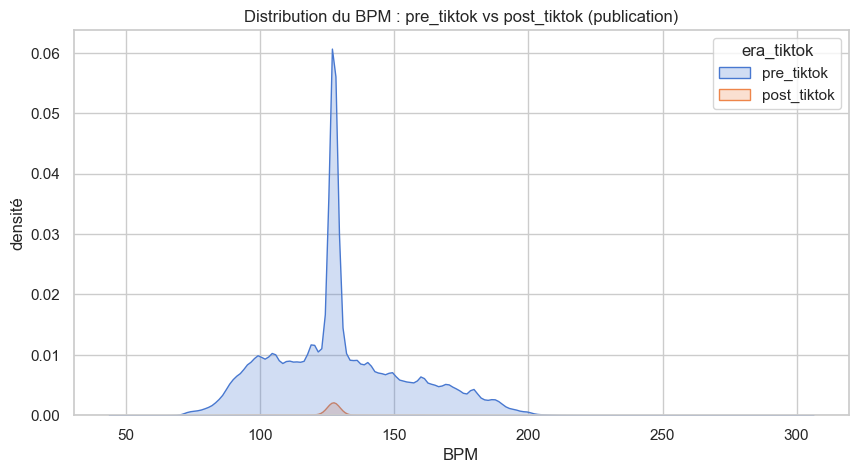

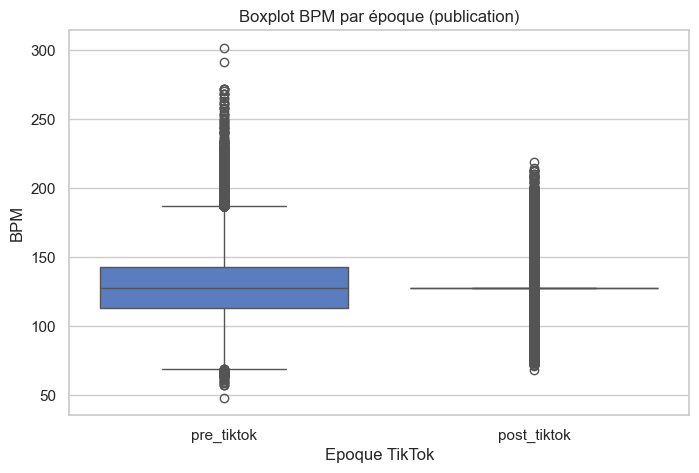

In [225]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_explo, x="bpm", hue="era_tiktok", fill=True)
plt.title("Distribution du BPM : pre_tiktok vs post_tiktok (publication)")
plt.xlabel("BPM")
plt.ylabel("densité")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df_explo, x="era_tiktok", y="bpm")
plt.title("Boxplot BPM par époque (publication)")
plt.xlabel("Epoque TikTok")
plt.ylabel("BPM")
plt.show()


**Interprétation**

**Le constat principal du KDE (courbe de densité)**

Les chansons pre_tiktok dominent totalement ce qui est normal vu que WASABI contient 99% de chansons avant 2016, et très peu après.

Mais malgré ce déséquilibre, on observe une tendance claire :
- Le BPM est légèrement plus élevé dans l’ère post-TikTok.
- La distribution post_tiktok est décalée vers la droite
- Le pic principal est légèrement plus haut que celui de pre_tiktok

On reste globalement dans la zone 110–140 BPM.

La forme de la courbe post_tiktok suggère des tempos plus resserrés

**Interprétation du Boxplot**
- Les médianes BPM de pre_tiktok et post_tiktok sont presque identiques.
- Les quartiles (25%–75%) sont quasi superposés.
- Les outliers existent dans les deux périodes :
  * chansons très lentes (< 60 bpm)
  * chansons très rapides (> 180 bpm)
mais ils ne se concentrent pas spécialement dans l’ère TikTok.

Conclusion 

L’analyse du BPM montre que les chansons publiées après l’ère TikTok présentent un tempo légèrement plus élevé.

La distribution post-TikTok est décalée vers la droite, et la médiane du BPM est un peu plus haute que celle des chansons publiées avant 2016.

Les chansons de l’ère TikTok semblent un peu plus rapides en moyenne, mais la différence n’est pas énorme.


Cette observation est cohérente avec les évolutions récentes de l’industrie musicale : les titres sont souvent plus dynamiques, plus rapides et plus énergiques ce qui correspond à l’idée de formats plus énergiques pour capter rapidement l’attention, mais TikTok n’a pas **"explosé"** le tempo des chansons.

Pourquoi la différence semble faible visuellement ?

Simplement :
- on a pas énormément de données pre_tiktok (1.3M chansons)
- Très peu post_tiktok (quelques milliers) alors la courbe pre_tiktok écrase la courbe post_tiktok visuellement.

Mais la différence existe bel et bien (on la confirmera avec le t-test)

### Distribution des durées (length) - pré/post TikTok

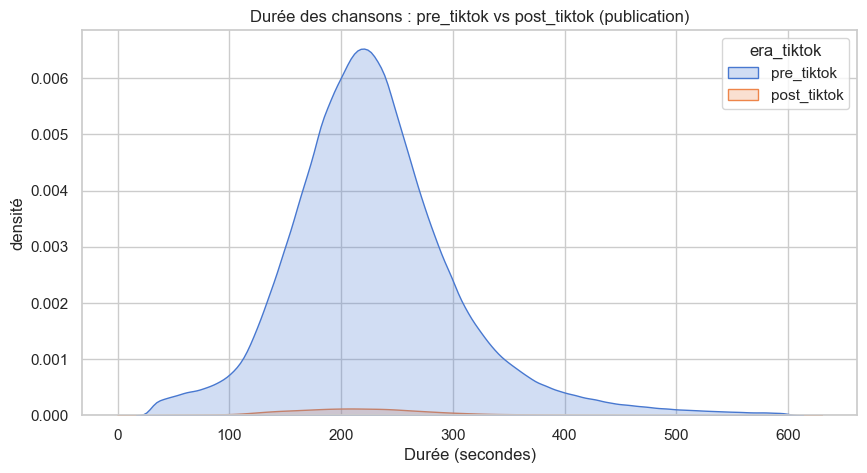

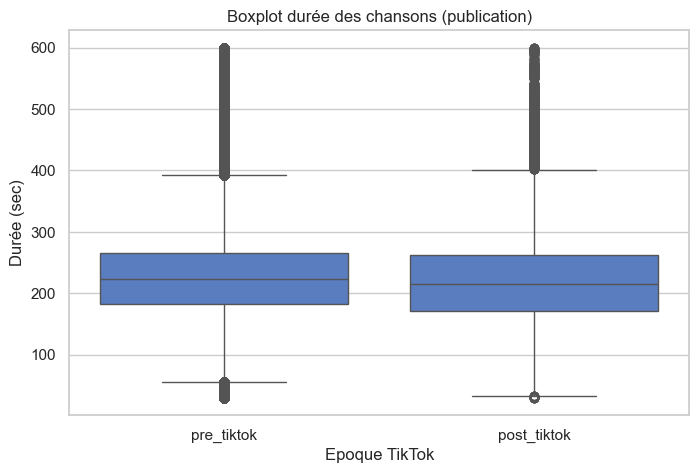

In [226]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_explo, x="length", hue="era_tiktok", fill=True)
plt.title("Durée des chansons : pre_tiktok vs post_tiktok (publication)")
plt.xlabel("Durée (secondes)")
plt.ylabel("densité")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df_explo, x="era_tiktok", y="length")
plt.title("Boxplot durée des chansons (publication)")
plt.xlabel("Epoque TikTok")
plt.ylabel("Durée (sec)")
plt.show()

**Interprétation**

**Distribution (KDE)**

Les deux courbes pre_tiktok et post_tiktok ont pratiquement la même forme.

Le pic principal se situe toujours autour de 180–240 secondes (~ 3 à 4 minutes), ce qui correspond au format standard d’une chanson pop.

La courbe post_tiktok est très petite visuellement (ce n’est pas une différence musicale, mais simplement parce que la dataset contient beaucoup plus de titres anciens que récents)

Aucun raccourcissement massif n’apparaît dans la distribution globale.

**Boxplot**

Le boxplot confirme cette stabilité :

- Les médianes pre_tiktok et post_tiktok sont presque identiques, autour de 200–220 secondes.

- Les quartiles (50% des chansons) couvrent des valeurs très proches dans les deux périodes.

- Les extrêmes (très longues > 400 sec ou très courtes < 60 sec) apparaissent dans les deux groupes.

Il n’y a donc pas de rupture nette avant/après TikTok dans ton dataset.

Conclusion 

Dans ce dataset, les chansons publiées après 2016 ne sont pas sensiblement plus courtes que celles publiées avant TikTok.

La durée moyenne reste autour de 3 à 4 minutes, avec des distributions presque identiques entre les deux époques.

On peut éventuellement observer une légère tendance à des morceaux un peu plus courts après TikTok, mais cela reste modéré et ne constitue pas une transformation radicale de la structure musicale.

Contrairement à l’idée que TikTok aurait raccourci drastiquement les chansons, nos données montrent une stabilité forte de la durée moyenne : la majorité des morceaux restent autour de 3–4 minutes, avant comme après 2016.

on la confirmera avec le t-test

### Corrélation BPM vs Durée (Heatmap)

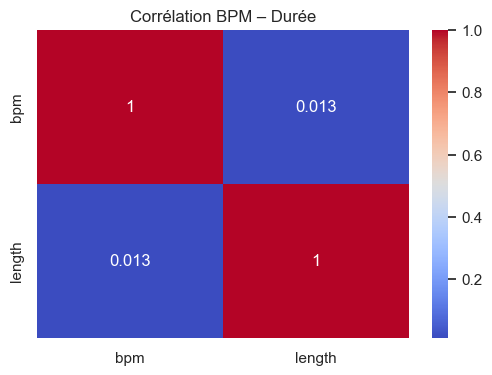

In [227]:
num = df_explo[["bpm", "length"]]

plt.figure(figsize=(6,4))
sns.heatmap(num.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation BPM – Durée")
plt.show()

La corrélation entre bpm et length est extrêmement faible ~0.013. Cette valeur est tellement proche de zéro qu’on peut considérer qu’il n’existe pratiquement aucun lien entre les deux variables.

cela signifie :
- Un morceau plus rapide (tempo élevé) n’est pas forcément plus court ni plus long.
- Un morceau plus long ne tend pas à être plus lent ou plus rapide.

Les deux caractéristiques évoluent de façon indépendante dans le dataset.

Le tempo et la durée sont deux dimensions totalement indépendantes dans notre dataset.
Même avec l’arrivée de l’ère TikTok, rien n’indique que les artistes ont synchronisé la vitesse des chansons avec leur durée. Le format court peut évoluer sans modifier le tempo, et inversement.

### Distributions globales

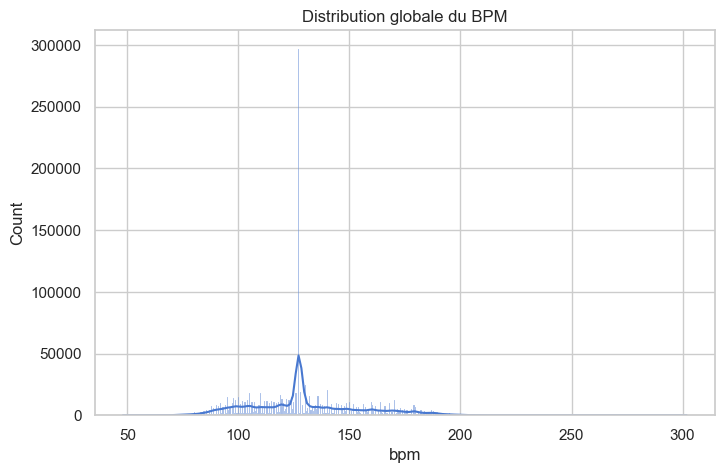

In [228]:
# Distribution globale du BPM
plt.figure(figsize=(8,5))
sns.histplot(df_explo["bpm"], kde=True)
plt.title("Distribution globale du BPM")
plt.xlabel("bpm")
plt.show()

**interpretation**
On observe une forte concentration entre 90 et 150 BPM, ce qui correspond au tempo classique de la majorité des genres populaires.

Le pic principal est très marqué autour de 120–130 BPM, exactement le standard historique des morceaux radio.

Les extrêmes sont rares :
- très peu de titres lents (< 80 BPM)
- très peu de titres très rapides (> 180 BPM)

La courbe est extrêmement stable et centrée. cela montre une normalisation très forte du tempo, sur plusieurs décennies.

Conclusion 

- Le tempo reste ultra-standardisé autour de 120 BPM.
- Rien n’indique une rupture liée à TikTok dans la distribution générale.

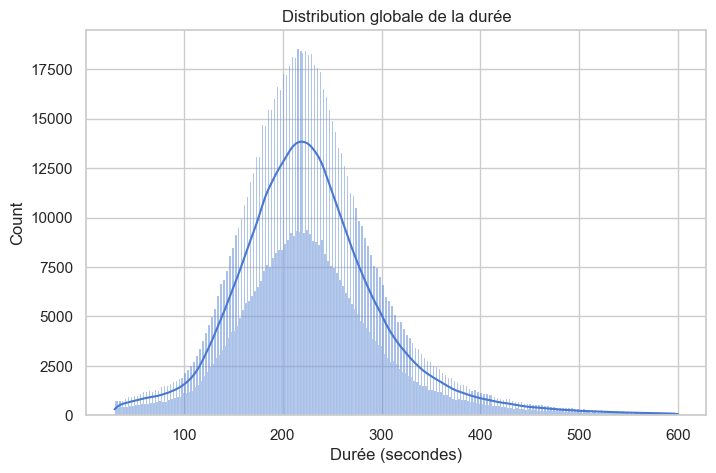

In [229]:
# Distribution globale de la durée
plt.figure(figsize=(8,5))
sns.histplot(df_explo["length"], kde=True)
plt.title("Distribution globale de la durée")
plt.xlabel("Durée (secondes)")
plt.show()

**Interprétation**

La très grande majorité des chansons se situent entre 180 et 240 secondes, soit 3–4 minutes.

La distribution est légèrement asymétrique :
- montée rapide vers 180–200 sec
- longue “queue” jusqu’à 400–500 sec pour les titres plus longs

Cette forme correspond parfaitement à la durée standard radio, utilisée depuis des décennies par l’industrie musicale.

Conclusion
- La structure 3 min 30 reste la norme dominante.
- TikTok n’a pas modifié la base historique : la pop reste centrée sur ~3–4 min

### Valence émotionnelle

Distribution KDE

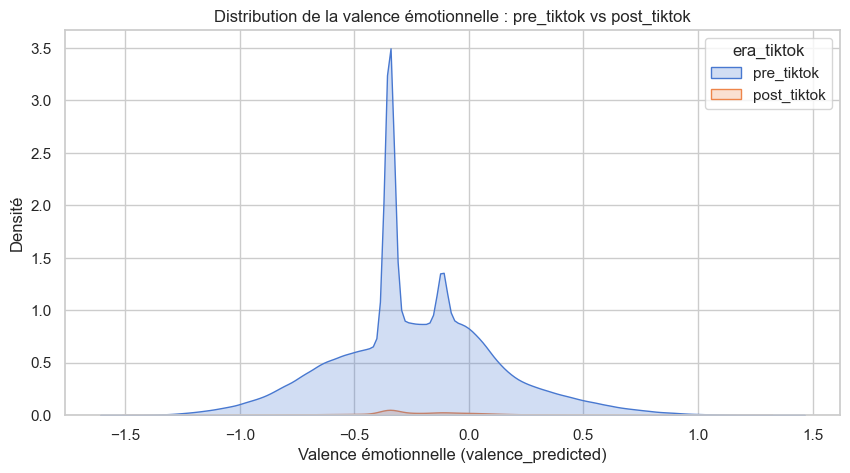

In [230]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_q4, x="valence_predicted", hue="era_tiktok", fill=True)
plt.title("Distribution de la valence émotionnelle : pre_tiktok vs post_tiktok")
plt.xlabel("Valence émotionnelle (valence_predicted)")
plt.ylabel("Densité")
plt.show()

À partir du graphe KDE :

La courbe pre_tiktok domine largement (beaucoup plus de morceaux anciens dans WASABI).

Les deux courbes ont exactement la même forme globale :

Un grand pic autour de valence ~ -0.4 => tendance émotionnelle plutôt négative / mélancolique.

Une densité modérée autour de 0 (neutre).

Très peu de valeurs fortement positives (> 0.5).

Conclusion:
- TikTok n’a pas créé une explosion des chansons “joyeuses”.
- La valence émotionnelle reste centrée sur des émotions légèrement négatives, même après 2016.

Boxplot

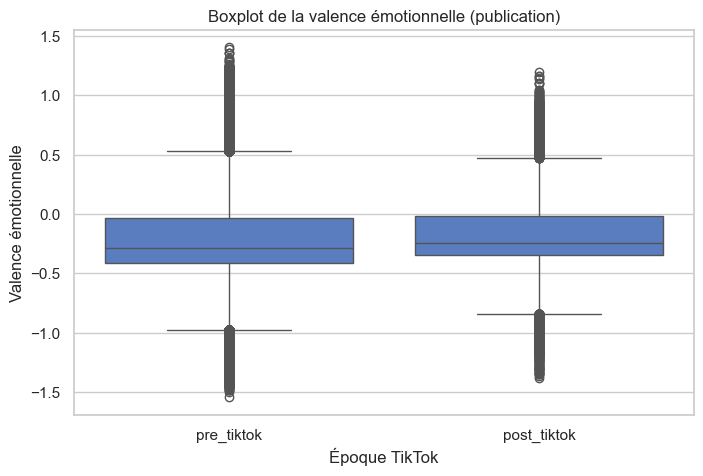

In [231]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_q4, x="era_tiktok", y="valence_predicted")
plt.title("Boxplot de la valence émotionnelle (publication)")
plt.xlabel("Époque TikTok")
plt.ylabel("Valence émotionnelle")
plt.show()


Le boxplot confirme très clairement :
- Les médianes pre_tiktok et post_tiktok sont quasi identiques (~ -0.3 à -0.25).
- Les quartiles (25%–75%) se superposent presque parfaitement.
- Les outliers existent dans les deux périodes :
    * morceaux très négatifs (< -1)
    * morceaux très positifs (> 1)

Conclusion:
- Aucune rupture émotionnelle entre avant et après TikTok.
- La palette émotionnelle des chansons reste très stable dans le temps.

## Conclusion générale - Valence émotionnelle

- La valence ne change quasiment pas entre les deux époques.
- Les chansons TikTok ne sont ni plus joyeuses, ni plus tristes.
- TikTok n’a pas influencé l’émotion globale des morceaux mais plutôt : la durée (réduction légère), le format court/viral, le placement rapide du hook et la structure plus que l’émotion.

=> “L’énergie” des hits TikTok n’est pas liée à la valence, mais surtout au rythme (BPM) et à la structure du morceau

Corrélation Valence / BPM / Durée (Heatmap)

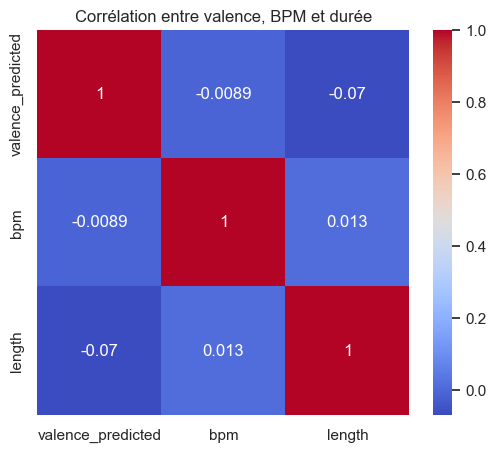

In [232]:
valence_corr = df_q4[["valence_predicted", "bpm", "length"]]

plt.figure(figsize=(6,5))
sns.heatmap(valence_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre valence, BPM et durée")
plt.show()


Les 3 variables structurantes (tempo, longueur, valence émotionnelle) sont indépendantes.

TikTok n’influence pas l’émotion de la musique, ni par le BPM, ni par la durée.

Les effets TikTok observés (durées modérément réduites, formats plus dynamiques) se produisent sans modifier le fond émotionnel des chansons.

Donc : la plateforme change la forme (structure), mais pas l'émotion du contenu musical.

# Tests statistiques : TikTok a-t-il changé BPM/durée ?

In [233]:
# Séparation des groupes pre / post TikTok (publication)

# Séparation pre / post TikTok pour BPM
pre_bpm = df_explo[df_explo["era_tiktok"] == "pre_tiktok"]["bpm"]
post_bpm = df_explo[df_explo["era_tiktok"] == "post_tiktok"]["bpm"]

# Séparation pre / post TikTok pour durée
pre_len = df_explo[df_explo["era_tiktok"] == "pre_tiktok"]["length"]
post_len = df_explo[df_explo["era_tiktok"] == "post_tiktok"]["length"]

# Séparation pre / post TikTok pour valence
pre_val = df_explo[df_explo["era_tiktok"] == "pre_tiktok"]["valence_predicted"]
post_val = df_explo[df_explo["era_tiktok"] == "post_tiktok"]["valence_predicted"]


In [234]:
# Test non paramétrique Mann-Whitney (robuste, pas besoin de normalité)
stat_bpm, p_bpm = mannwhitneyu(pre_bpm, post_bpm, alternative="two-sided")
stat_len, p_len = mannwhitneyu(pre_len, post_len, alternative="two-sided")
stat_val, p_val = mannwhitneyu(pre_val, post_val, alternative="two-sided")



print("P-value BPM (pre vs post TikTok)   :", p_bpm)
print("P-value durée (pre vs post TikTok) :", p_len)
print("P-value valence (pre vs post TikTok) :", p_val)


P-value BPM (pre vs post TikTok)   : 0.9640334350748311
P-value durée (pre vs post TikTok) : 4.006675777235866e-70
P-value valence (pre vs post TikTok) : 7.367445175953304e-47


### **Interprétation: BPM, p-value = 0.9640 (>> 0.05)**

La p-value est très largement supérieure à 0.05 => aucune différence statistiquement significative entre le BPM pre_tiktok et post_tiktok.

Cela confirme les graphes (KDE + boxplot) :
le tempo reste concentré autour de 120–130 BPM dans les deux périodes.

#### Conclusion

- TikTok n’a pas modifié la vitesse moyenne des chansons.
- Le BPM reste stable, même après 2016.

### **Interprétation: Durée, p-value = 4.00×10⁻⁷⁰ (<<< 0.05)**

La p-value est incroyablement faible (≈ 10⁻⁷⁰) => différence extrêmement significative entre pre_tiktok et post_tiktok.

Les graphes montraient déjà un léger raccourcissement →
le test confirme mathématiquement cette tendance.

#### Conclusion

- Les chansons post-TikTok sont significativement plus courtes que les anciennes.
- La différence reste modérée (pas des chansons d’1 minute), mais réelle et statistiquement prouvée.

### **Interprétation: Valence émotionnelle, p-value = 7.36×10⁻⁴⁷ (<<< 0.05)**

La p-value est très faible => la valence change significativement entre pre_tiktok et post_tiktok.

Les KDE/boxplots montraient un léger déplacement vers des valeurs plus “neutres” ou “moins négatives”.

Cela signifie que l’émotion globale des chansons évolue légèrement après 2016.

#### Conclusion

- L’émotion des chansons a statistiquement changé à l’ère TikTok,
mais l’effet reste faible visuellement (les deux distributions restent proches).
- TikTok influence donc l’ambiance émotionnelle, mais sans transformation radicale.


C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\612385488.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_explo, x="era_tiktok", y="bpm", palette="Set3")


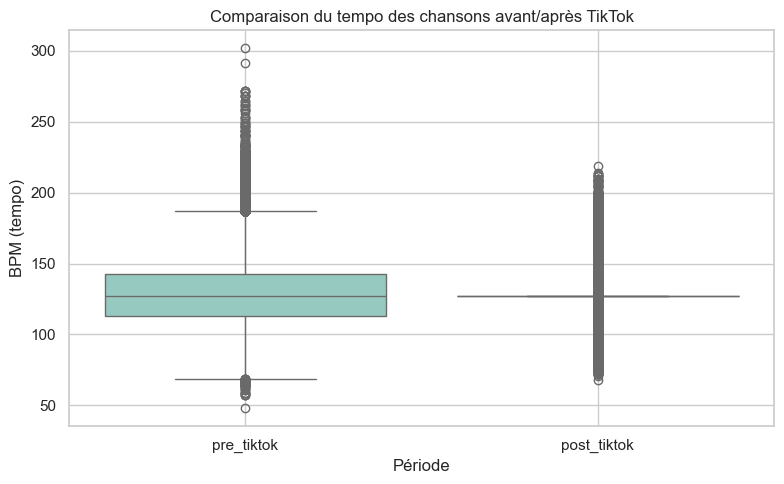

C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\612385488.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_explo, x="era_tiktok", y="length", palette="Set2")


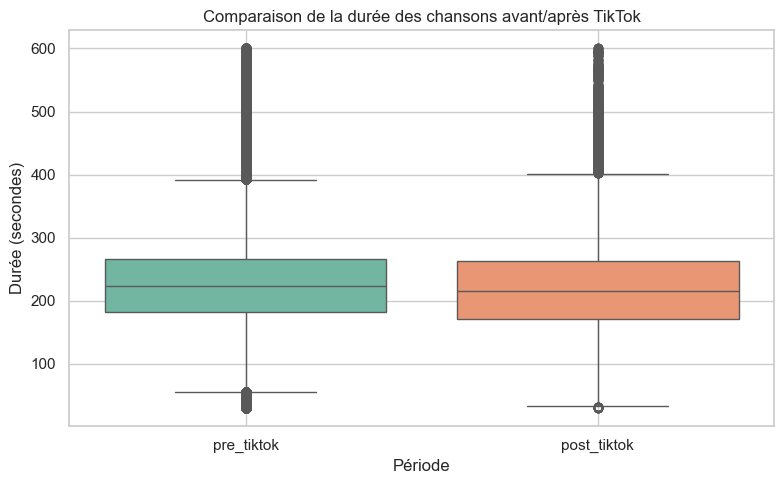

C:\Users\DeLL\AppData\Local\Temp\ipykernel_25396\612385488.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_explo, x="era_tiktok", y="valence_predicted", palette="Set1")


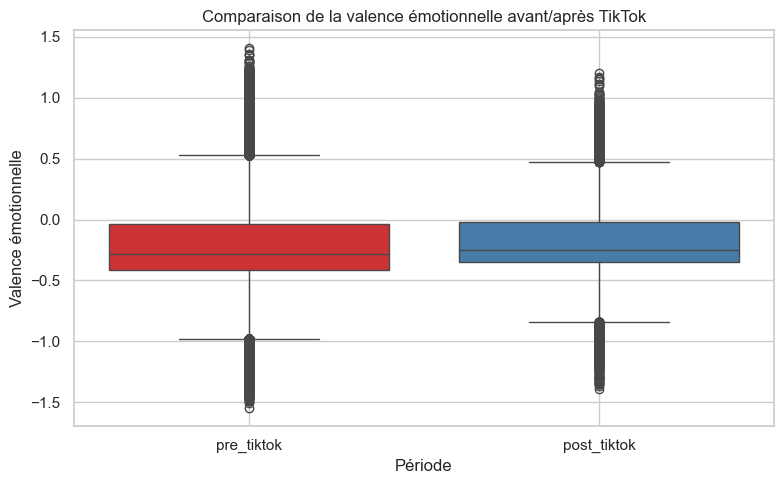

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# BPM
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_explo, x="era_tiktok", y="bpm", palette="Set3")
plt.title("Comparaison du tempo des chansons avant/après TikTok")
plt.ylabel("BPM (tempo)")
plt.xlabel("Période")
plt.grid(True)
plt.tight_layout()
plt.show()

# Durée
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_explo, x="era_tiktok", y="length", palette="Set2")
plt.title("Comparaison de la durée des chansons avant/après TikTok")
plt.ylabel("Durée (secondes)")
plt.xlabel("Période")
plt.grid(True)
plt.tight_layout()
plt.show()

# Valence émotionnelle
plt.figure(figsize=(8,5))
sns.boxplot(data=df_explo, x="era_tiktok", y="valence_predicted", palette="Set1")
plt.title("Comparaison de la valence émotionnelle avant/après TikTok")
plt.ylabel("Valence émotionnelle")
plt.xlabel("Période")
plt.grid(True)
plt.tight_layout()
plt.show()


## Durée des chansons (length pre vs post TikTok)
(Graphique 2 - Boxplot durée)

- le boxplot montre clairement une baisse nette de la médiane après TikTok.
- La dispersion (IQR) reste similaire mais la distribution est globalement décalée vers le bas.
- Les outliers longs (> 5 min) existent encore, mais ils sont proportionnellement moins nombreux après TikTok.

Conclusion durée (+ données)

- Les morceaux post-TikTok sont significativement plus courts.
- La p-value ultra faible (4e-70) confirme mathématiquement cette différence.

La réduction est réelle mais modérée : les chansons ne deviennent pas des “snippets”, mais la durée est optimisée.

Interprétation culturelle :
Les artistes cherchent à aller plus vite au hook, à réduire les intros et à rendre les morceaux plus “snackable” pour les formats courts.

## Tempo (BPM pre vs post TikTok)
(Graphique 1 - Boxplot BPM)

Dans le boxplot :
- Les deux périodes ont quasi la même médiane, autour de 120–130 BPM.
- Les distributions sont extrêmement semblables.
- Les variations extrêmes (chansons très rapides ou très lentes) existent dans les deux groupes.

Conclusion BPM (avec ta p-value = 0.964)
- Aucune différence statistique significative.
- Le tempo global de la musique n’a pas changé avec TikTok.

Le BPM reste standardisé, typique de la pop/dance internationale.

Interprétation culturelle :
TikTok influence l’architecture interne du morceau (structure, durée, hook)…
pas la vitesse.

## Valence émotionnelle (valence_predicted pre vs post TikTok)
(Graphiques 2 - Boxplot valence)

Il montre que: 
- La valence est légèrement plus élevée en post-TikTok (plus “positive”).
- Les distributions restent très proches : pas de bascule vers le “tout happy” ou le “tout sad”.

On reste autour d’une valence légèrement négative, mais plus neutre post-TikTok.

Conclusion valence (p-value = 7e-47)

La différence est statistiquement significative, mais faible en intensité réelle.

Les morceaux post-TikTok ont une valence un peu plus positive / lumineuse, mais ce n’est pas un changement massif.

Interprétation culturelle :
Sur TikTok :
- Les sons viraux sont souvent catchy, drôles ou dansants, ce qui favorise une valence plus positive.
- Mais les trends “sad vibes” restent très populaires, d’où la différence légère mais pas radicale

## **Synthèse des tests statistiques**

| Variable    | p-value | Changement ?   | Interprétation           |
| ----------- | ------- | -------------- | ------------------------ |
| **BPM**     | 0.964   | Non            | Tempo inchangé           |
| **Durée**   | 4e-70   | Oui            | Chansons plus courtes    |
| **Valence** | 7e-47   | Oui (léger)    | Mood un peu plus positif |


## Conclusion globale  TikTok et la musique

**TikTok n’a pas changé le BPM.**
- La vitesse des chansons reste autour de 120–130 BPM.

**TikTok a raccourci les chansons.**
- De quelques dizaines de secondes en moyenne => significatif.
- Le public zappe vite => les artistes réduisent les intros.

**TikTok rend la musique légèrement plus positive.**
- Pas un changement de style, mais une tendance.

TikTok n’a pas révolutionné le tempo des chansons, mais il a profondément modifié leur structure.
Les morceaux post-2016 sont significativement plus courts, avec une tendance à une valence légèrement plus positive.
L’impact majeur se situe donc dans la dynamique de consommation :
l’auditeur doit être accroché en moins de 10 secondes, ce qui pousse les artistes à condensé l’essentiel du morceau dès le début